In [2]:
# -*- coding: utf-8 -*-

# 导入一些库, 没有的话需要安装
# 即把下一句注释掉再运行
# !pip install matplotlib tqdm numpy

from networks import SentimentAnalysis
import re
from matplotlib import pyplot as plt
from tqdm import tqdm, trange
import numpy as np


SA = SentimentAnalysis()

# 评分函数
def predict(sent):
    """
    1: positif
    0: neutral
    -1: negatif
    """
    score1, score0 = SA.normalization_score(sent)
    if score1 == score0:
        result = 0
    elif score1 > score0:
        result = 1
    elif score1 < score0:
        result = -1
    return score1 - score0 #result

# 版本为python3，如果为python2需要在字符串前面加上u


# 分句函数
def cut_sent(para):
    para = re.sub('([。！？\?])([^”’])', r"\1\n\2", para)  # 单字符断句符
    para = re.sub('(\.{6})([^”’])', r"\1\n\2", para)  # 英文省略号
    para = re.sub('(\…{2})([^”’])', r"\1\n\2", para)  # 中文省略号
    para = re.sub('([。！？\?][”’])([^，。！？\?])', r'\1\n\2', para)
    # 如果双引号前有终止符，那么双引号才是句子的终点，把分句符\n放到双引号后，注意前面的几句都小心保留了双引号
    para = para.rstrip()  # 段尾如果有多余的\n就去掉它
    # 很多规则中会考虑分号;，但是这里我把它忽略不计，破折号、英文双引号等同样忽略，需要的再做些简单调整即可。
    return para.split("\n")

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lenovo\AppData\Local\Temp\jieba.cache


Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\not.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\positive.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\negative.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\most.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\very.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\more.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\ish.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\insufficiently.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\over.txt) finished !
Load data from file (e:\大学课件\挑战杯\网文分析\sentiment_analysis_dict\dict\inverse.txt) finished !


Loading model cost 0.787 seconds.
Prefix dict has been built successfully.


In [17]:
def get_sentiment_score(filename):
    """
    获取全文情感分数
    """
    s = []
    # 把此处的文件位置改成要分析的文件位置
    with open(filename, 'r', encoding='utf-8') as f:
        text = f.read()
        text = cut_sent(text)
        text = list(filter(None, text))
    for w in text:
        s.append(predict(w))
    return s, len(s)


In [61]:
def getarc_deprecated(filename, outdir='../outputs/2003', nmax=2000):
    try:
        s, length = get_sentiment_score(filename)
    except:
        print('error',filename)
    n = min(length//8, nmax+1)
    l = []
    sc = 0
    for i in trange(1, len(s)):
        sc += s[i-1]
        if i >= n:
            sc -= s[i-n]
            l.append(sc/(n-1))

    plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.figure(figsize=(40, 20))
    plt.plot(l)
    plt.ylabel("Sentiment Score")
    plt.title(filename.split('/')[-1][:-4] + "({})".format(n-1))
    # plt.savefig(os.path.join(outdir, filename.split('/')[-1][:-4]) + ".png")
    plt.close()
    # plt.show()


778 10 10 0.015765236297626207 -0.06169023203364471


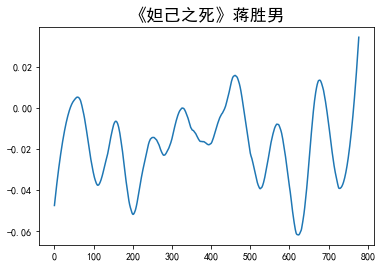

In [75]:
def getarc(file_path, outdir='../output/2003'):
    from scipy.signal import savgol_filter
    # import os
    # if not os.path.exists(outdir):
    #     os.makedirs(outdir)
    try:
        s,slen=get_sentiment_score(file_path)
    except:
        print("error",file_path)
    window_length = slen//15*2+1
    title=file_path.split('/')[-1][:-4]
    # plt.figure(figsize=(60,40))
    s=savgol_filter(s,  window_length, 2)
    # plt.plot(s, 'r-', lw=2)
    s=savgol_filter(s,  window_length, 2)
    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.rcParams['font.sans-serif'] = ['SimHei'] 
    plt.rcParams['axes.unicode_minus'] = False
    plt.plot(s)
    plt.title( title,fontsize='xx-large')
    top_list=[]
    bot_list=[]
    for i in range(1,slen-1):
        if s[i]>s[i-1] and s[i]>s[i+1]:
            top_list.append(s[i])
        if s[i]<s[i-1] and s[i]<s[i+1]:
            bot_list.append(s[i])
    print(slen,len(top_list),len(bot_list),max(top_list),min(bot_list))
    # plt.show()
    plt.savefig(os.path.join(outdir, file_path.split('/')[-1][:-4]) + ".png")
getarc('../晋江2003~2021文包/2003-30本/《妲己之死》蒋胜男.txt')

   x列0  x列1
0    0    3
1    1    4
2    2    5
   y列0  y列1  y列2  y列3
0    2    3    4    5
1    3    4    5    6
2    2    3    4    5


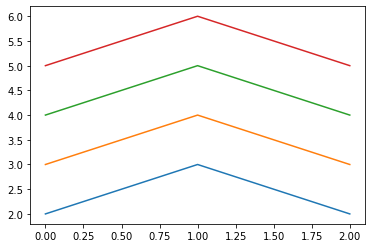

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dic1={'x列0':[0,1,2],'x列1':[3,4,5]}
x=pd.DataFrame(dic1)
dic2={'y列0':[2,3,2],'y列1':[3,4,3],'y列2':[4,5,4],'y列3':[5,6,5]}
y=pd.DataFrame(dic2)
print(x)
print(y)
plt.plot(y)
# plt.show()

<ipython-input-65-be1cad51b040>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.plot(s)
<ipython-input-65-be1cad51b040>:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(60,40))


FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: '../output/2003'

<Figure size 4320x2880 with 0 Axes>

<Figure size 4320x2880 with 0 Axes>

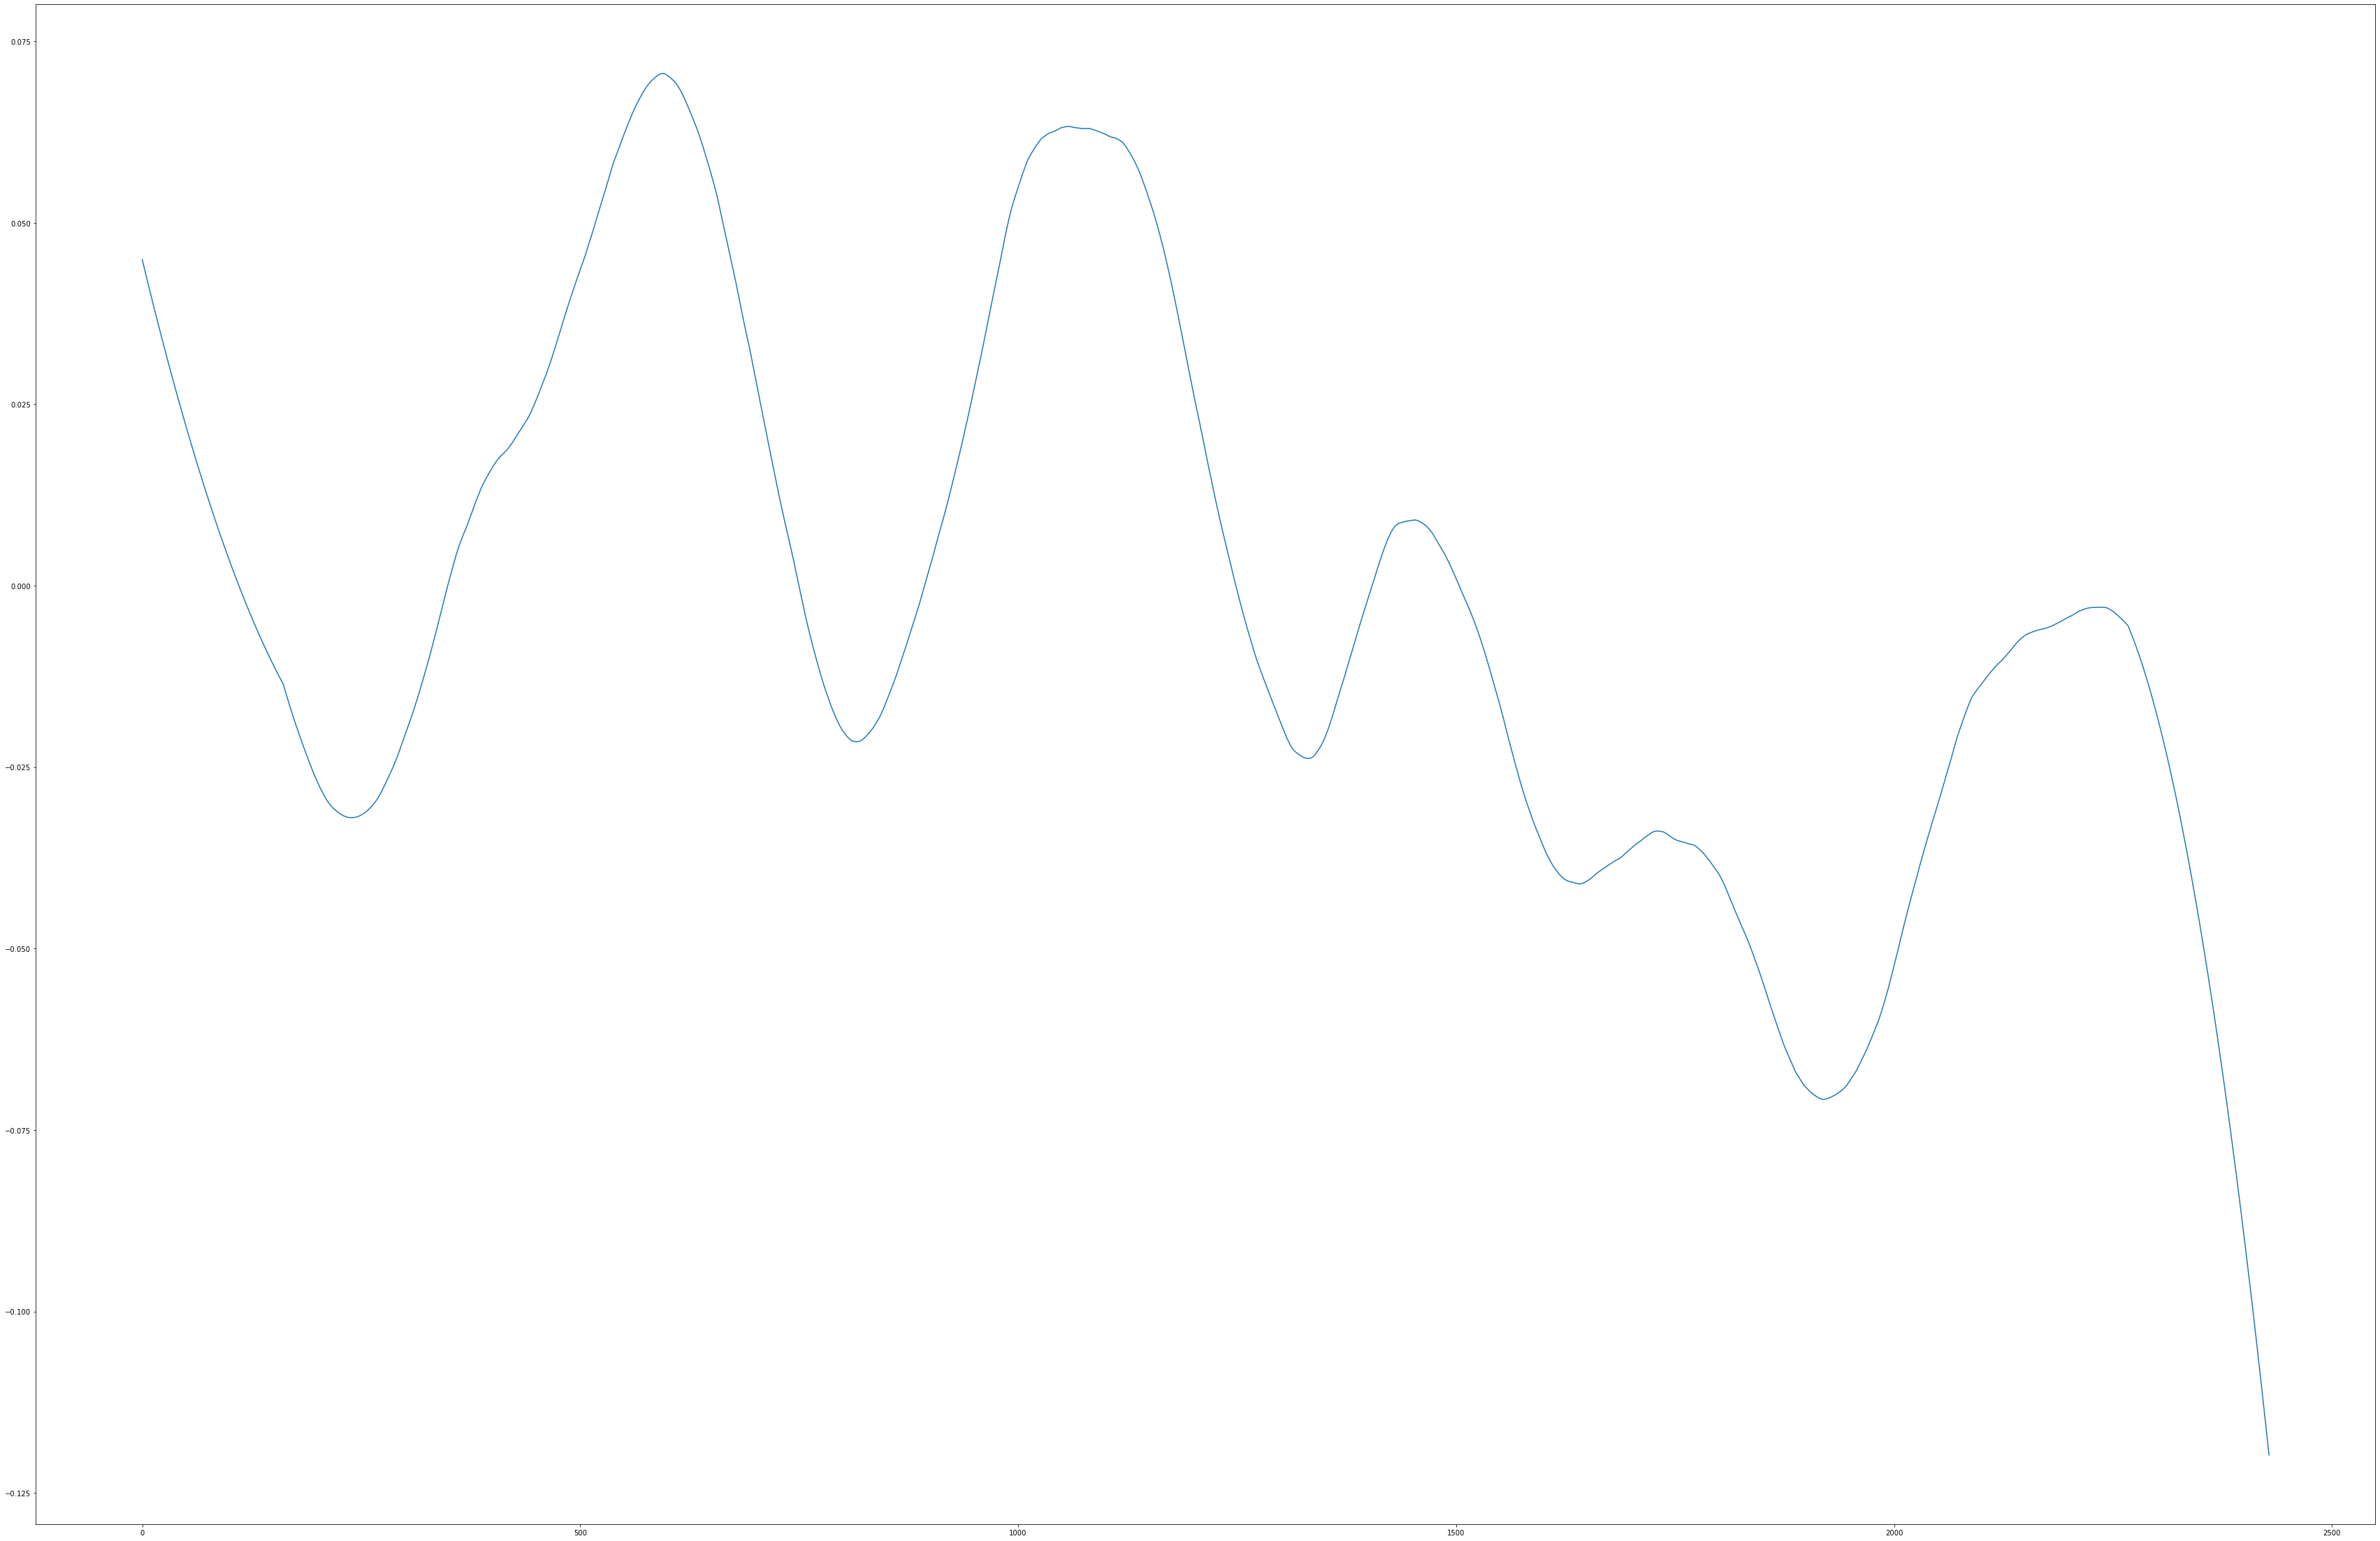

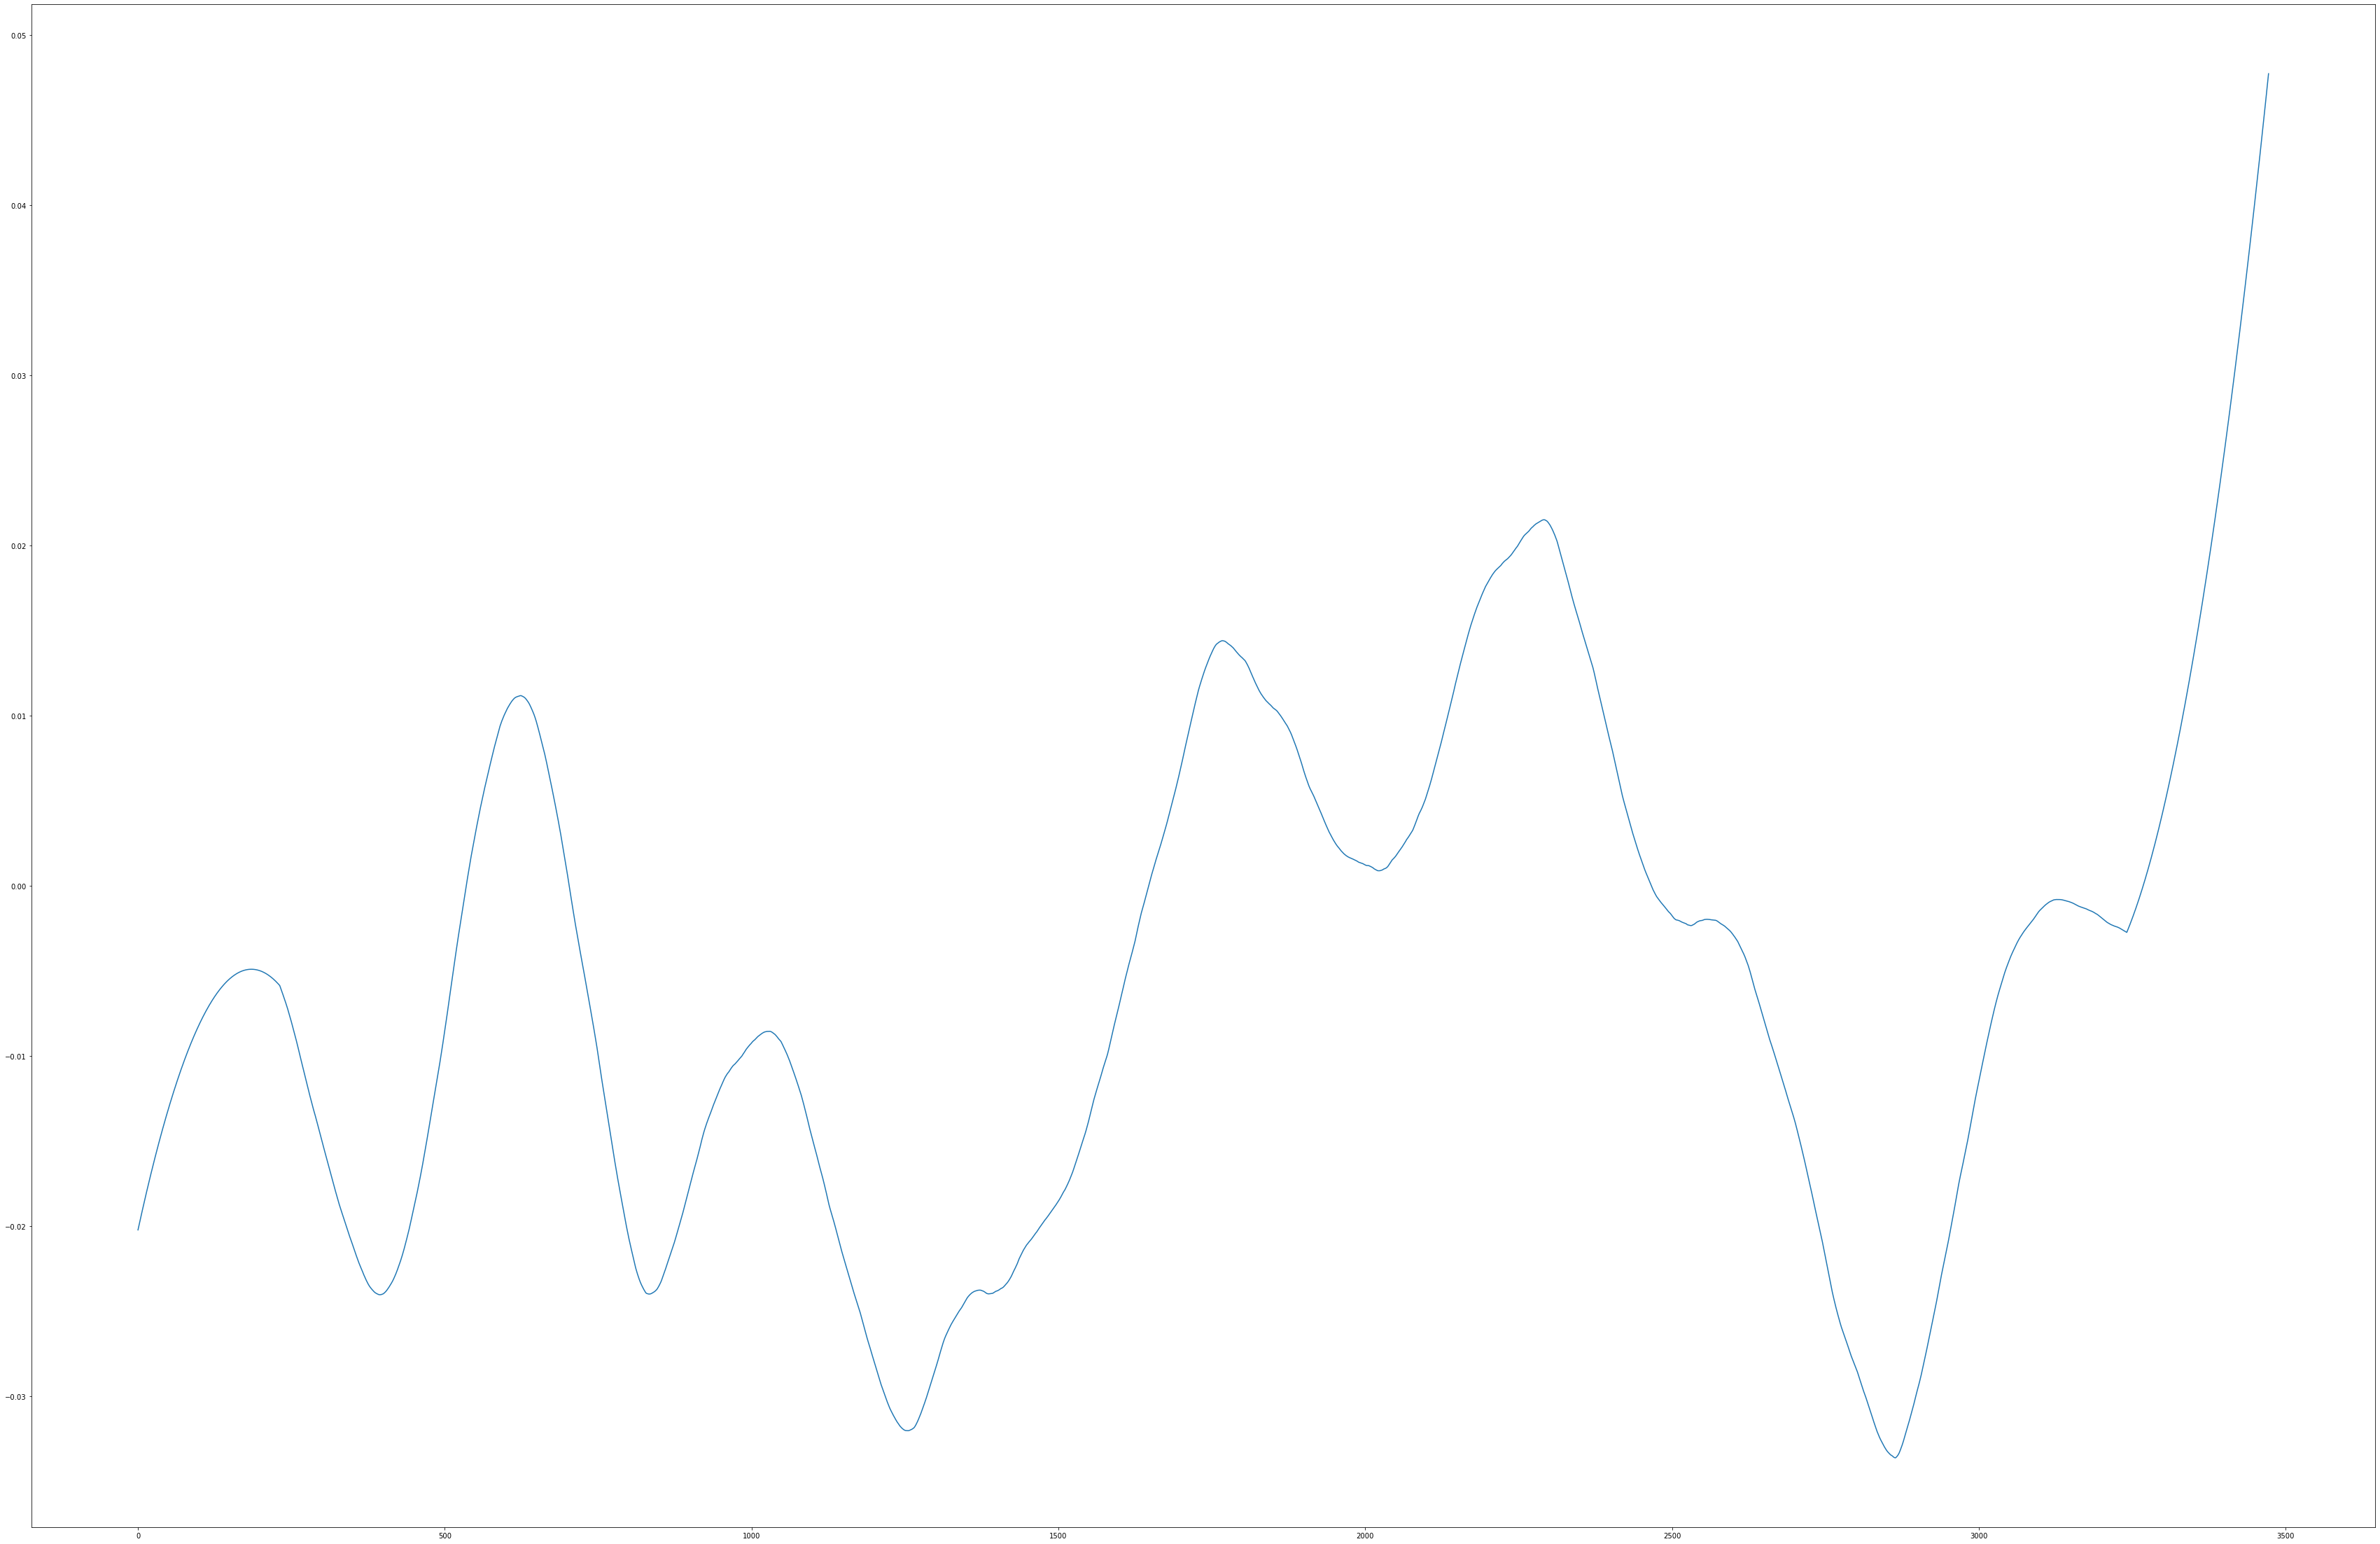

<Figure size 4320x2880 with 0 Axes>

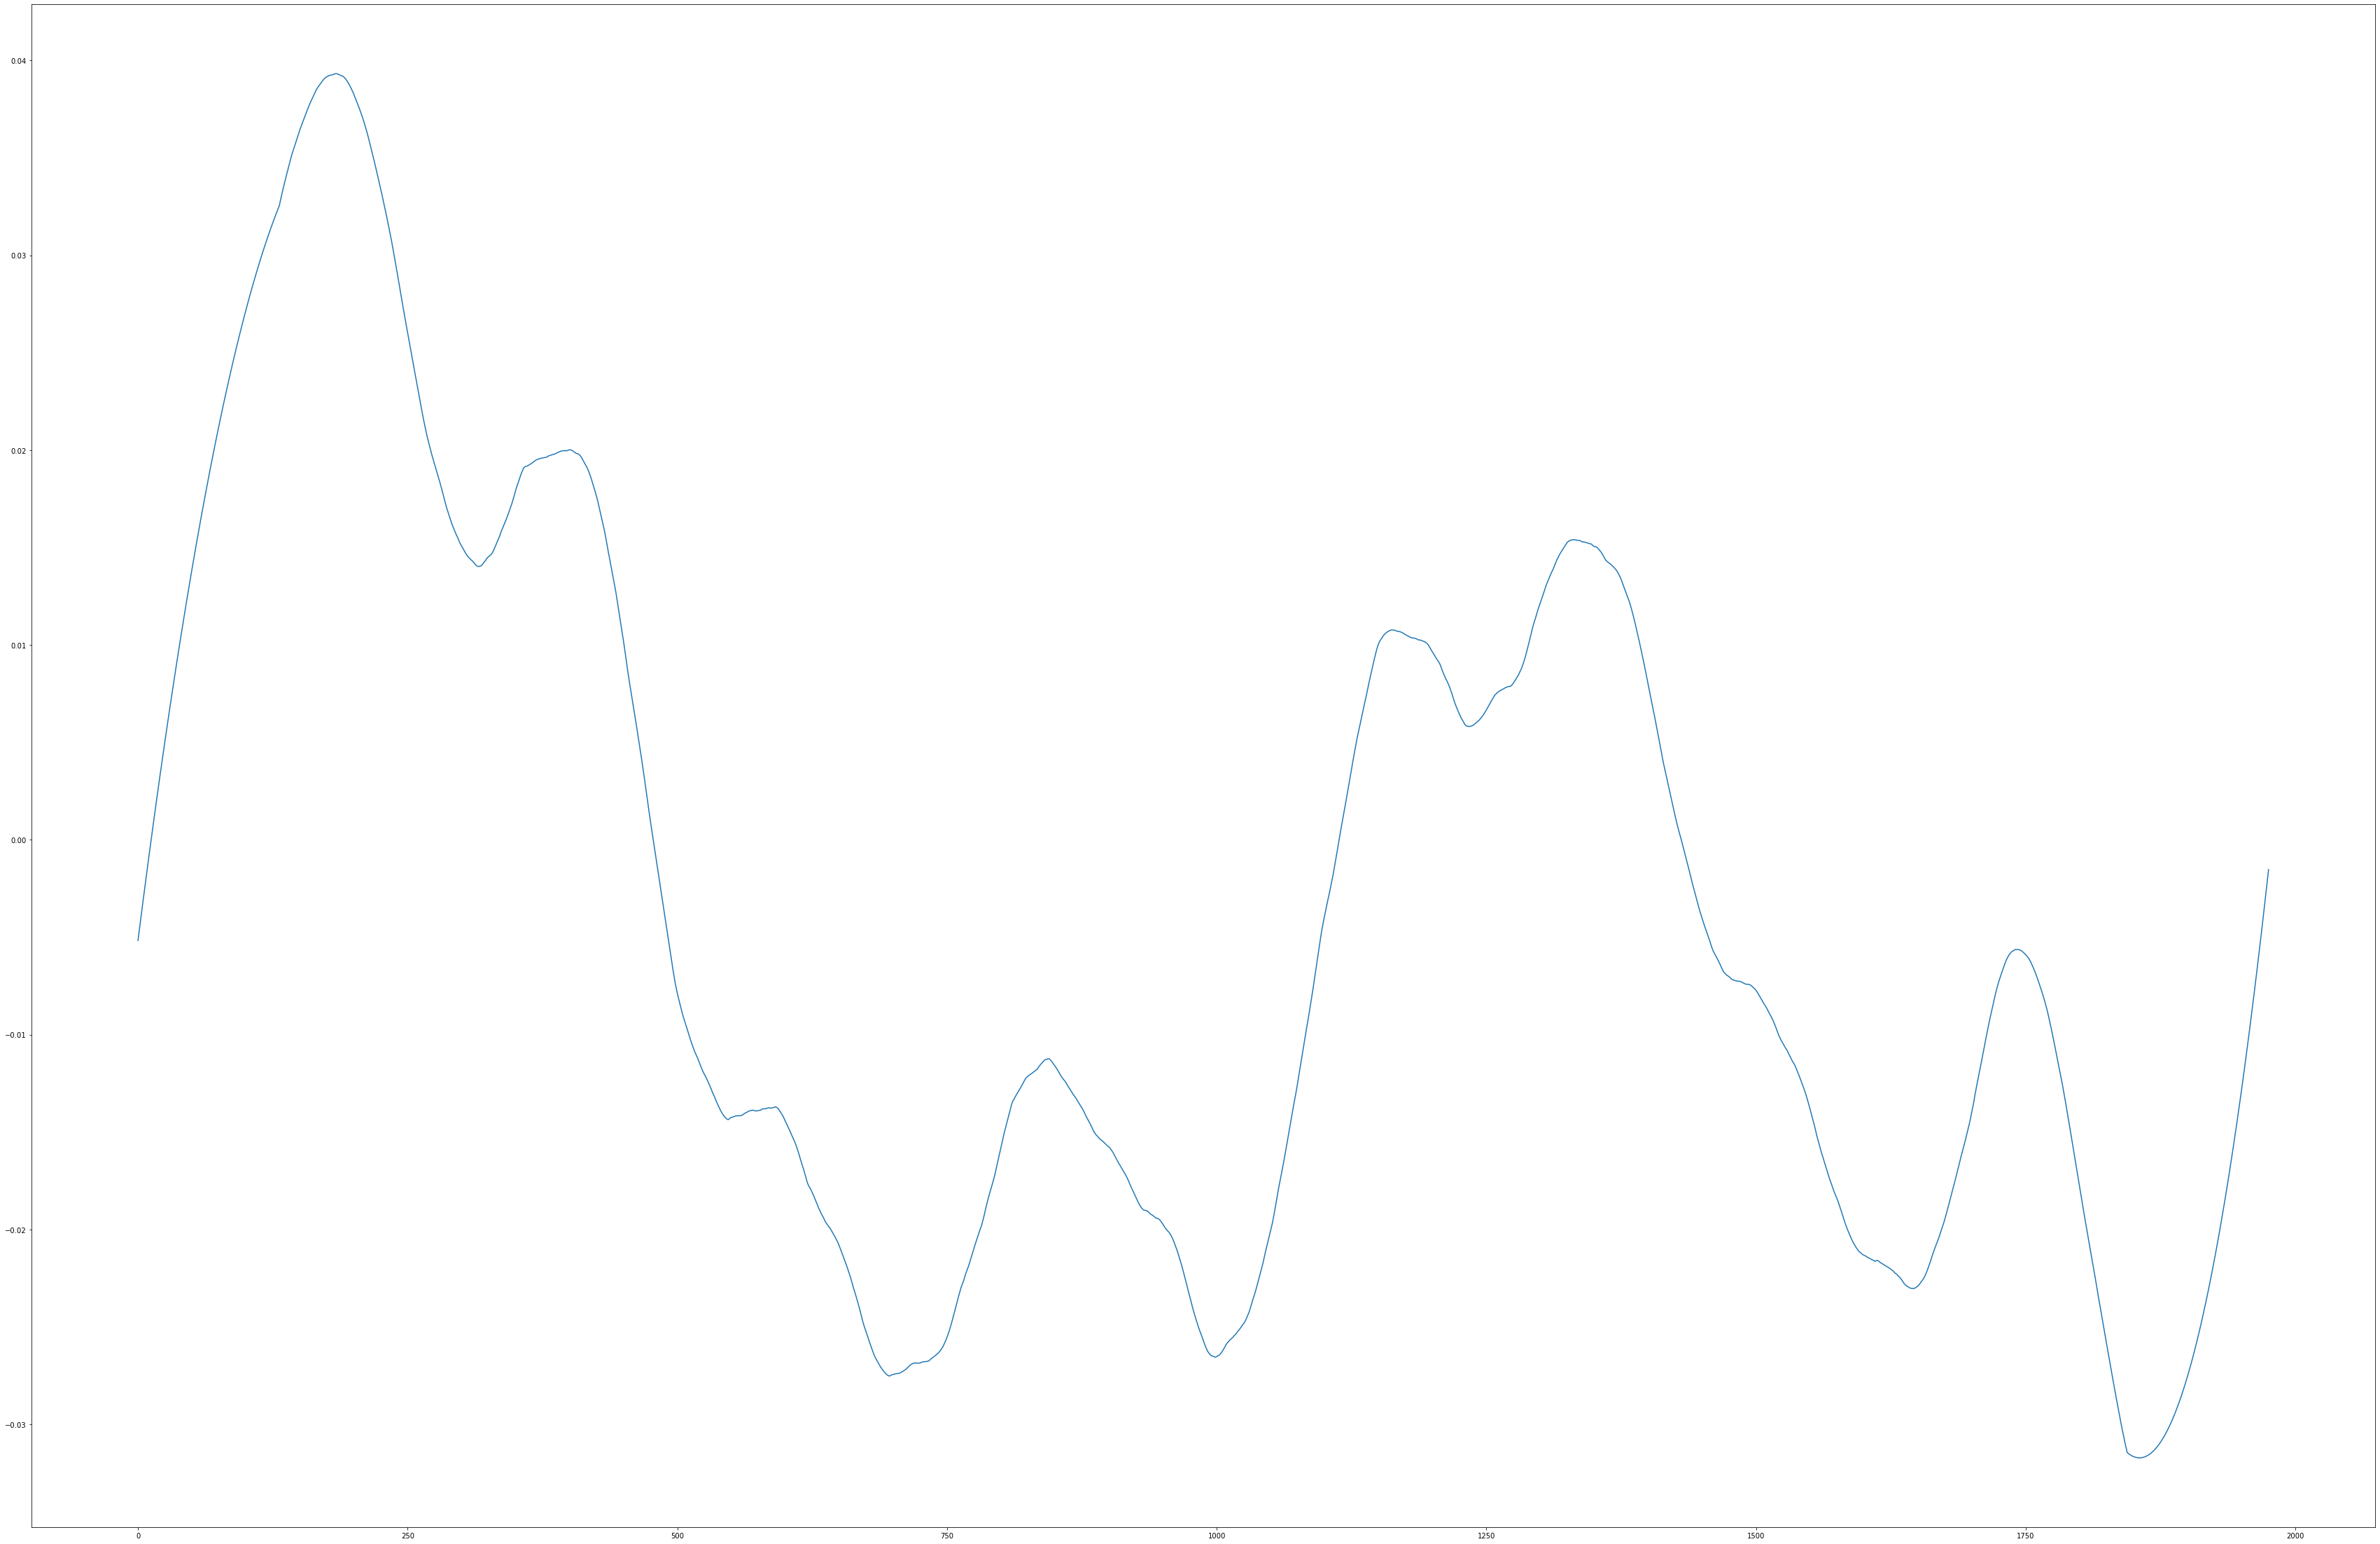

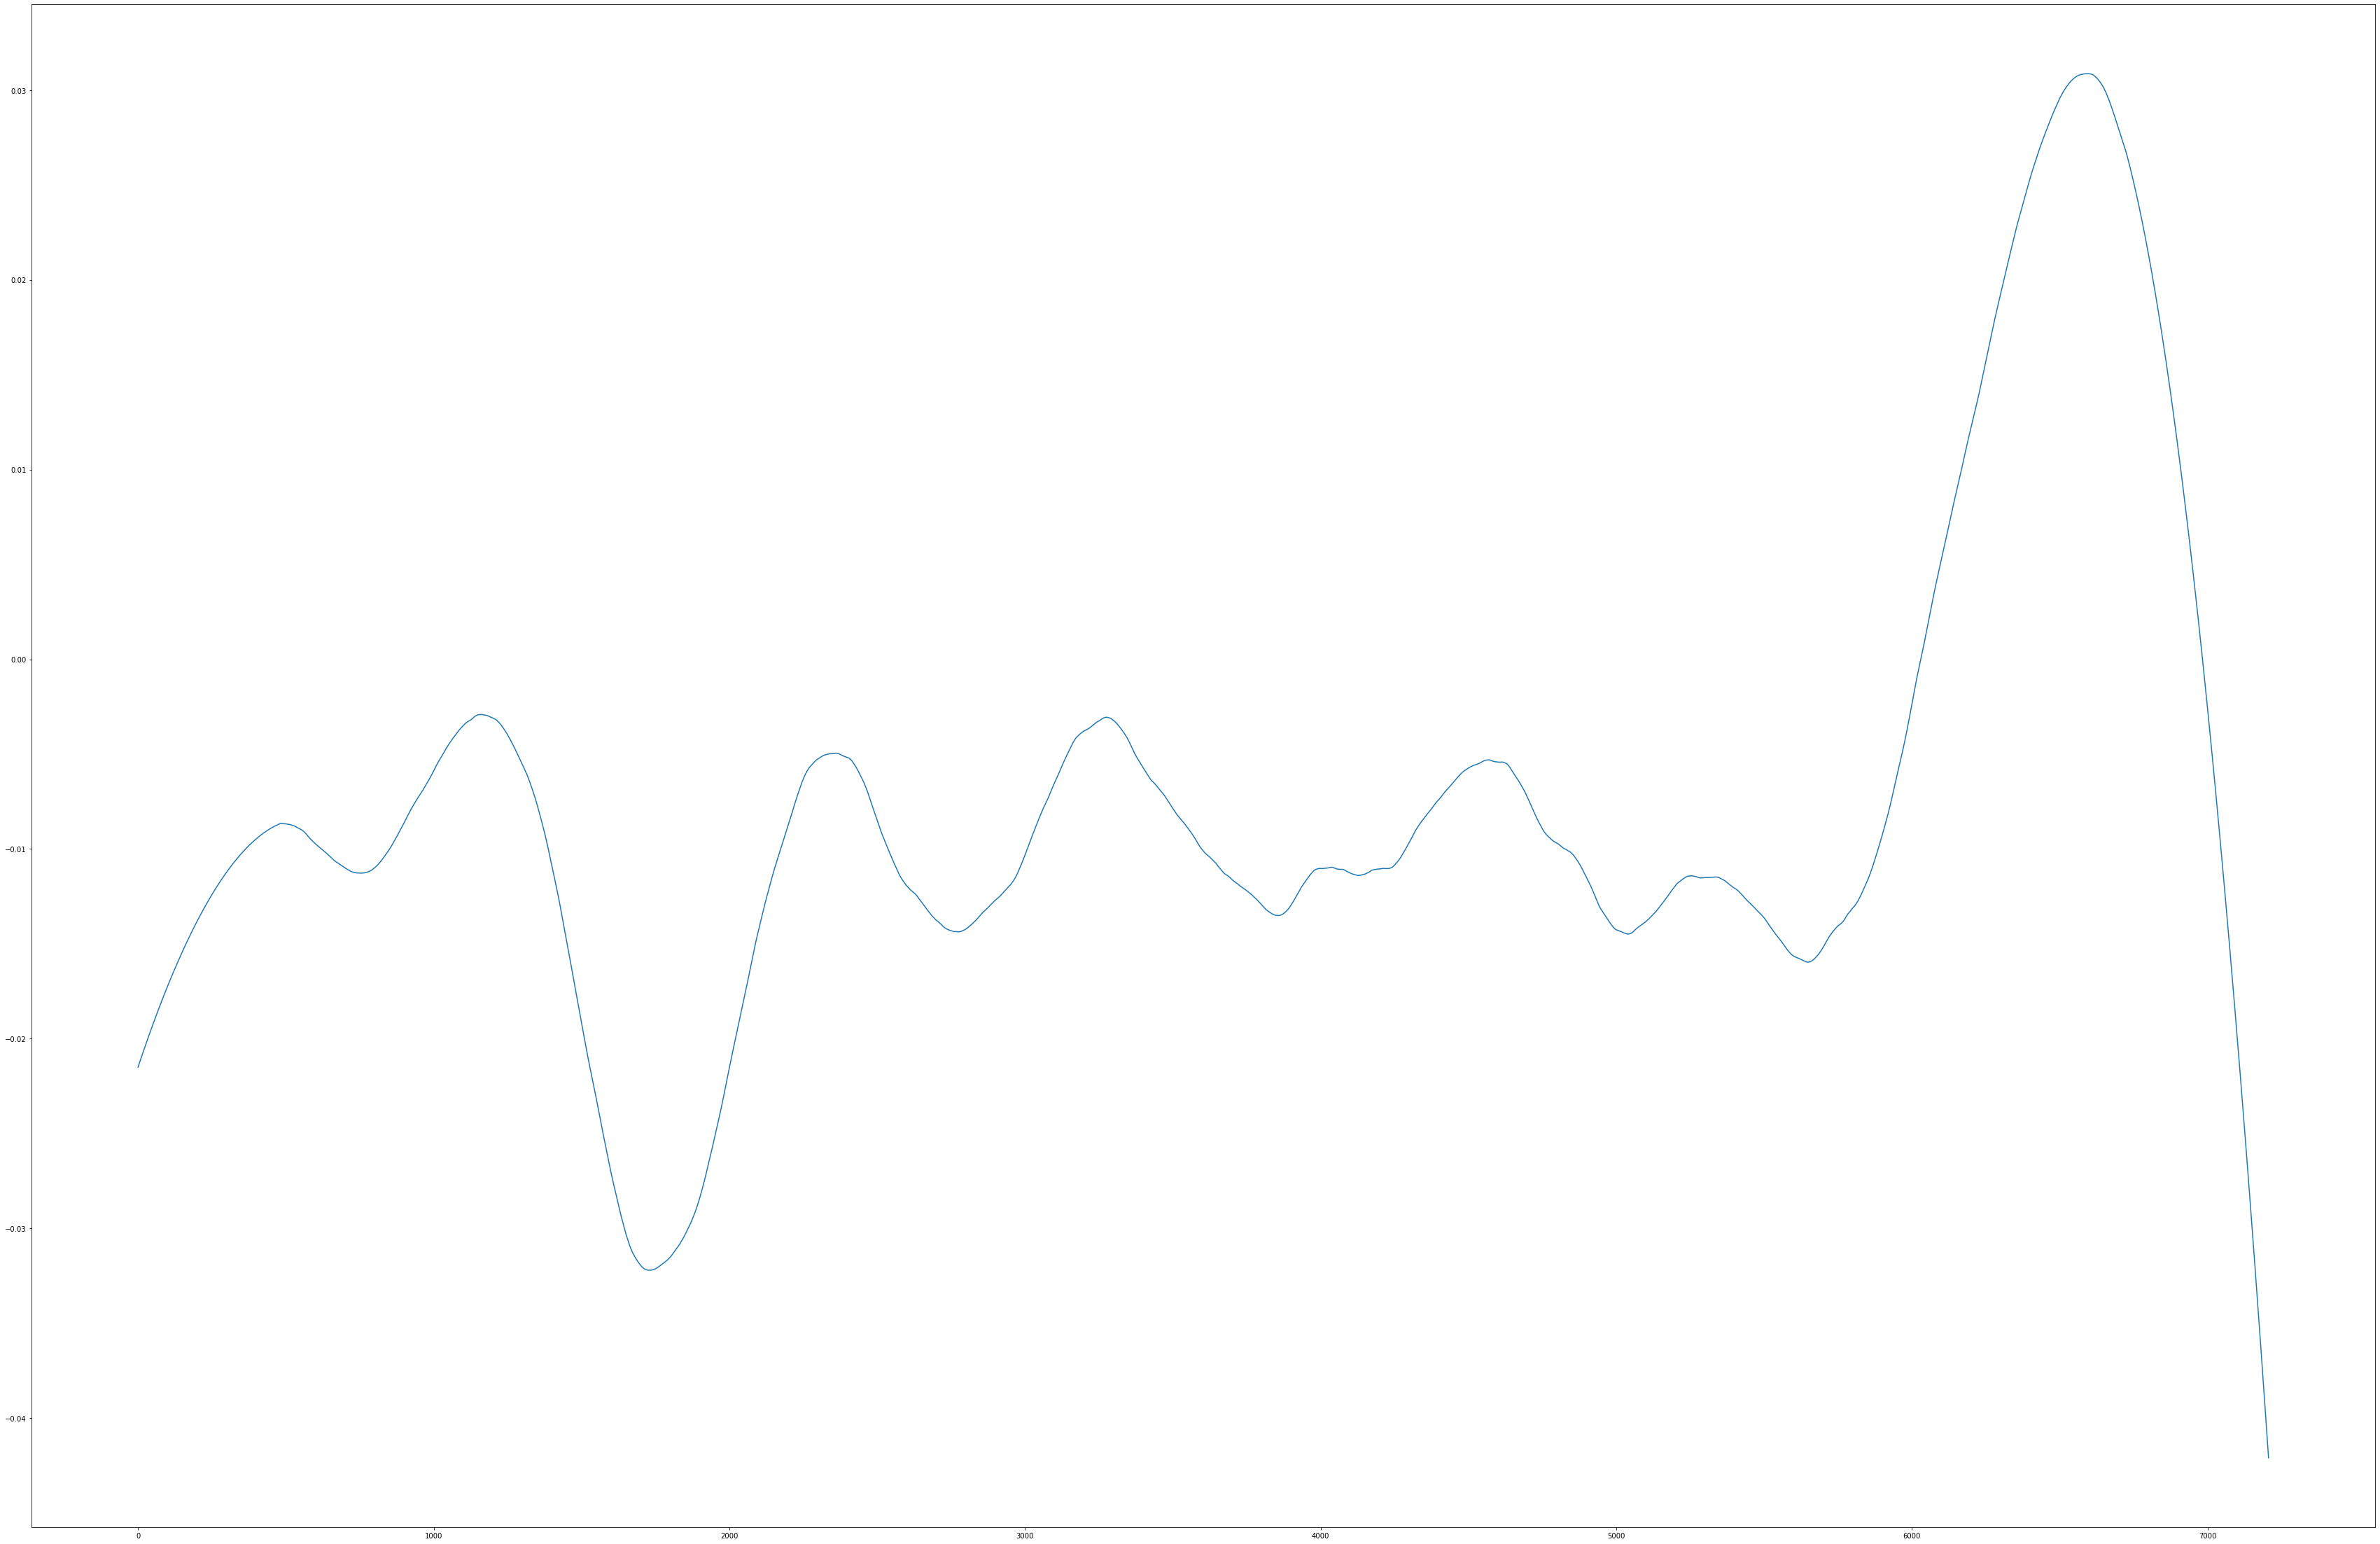

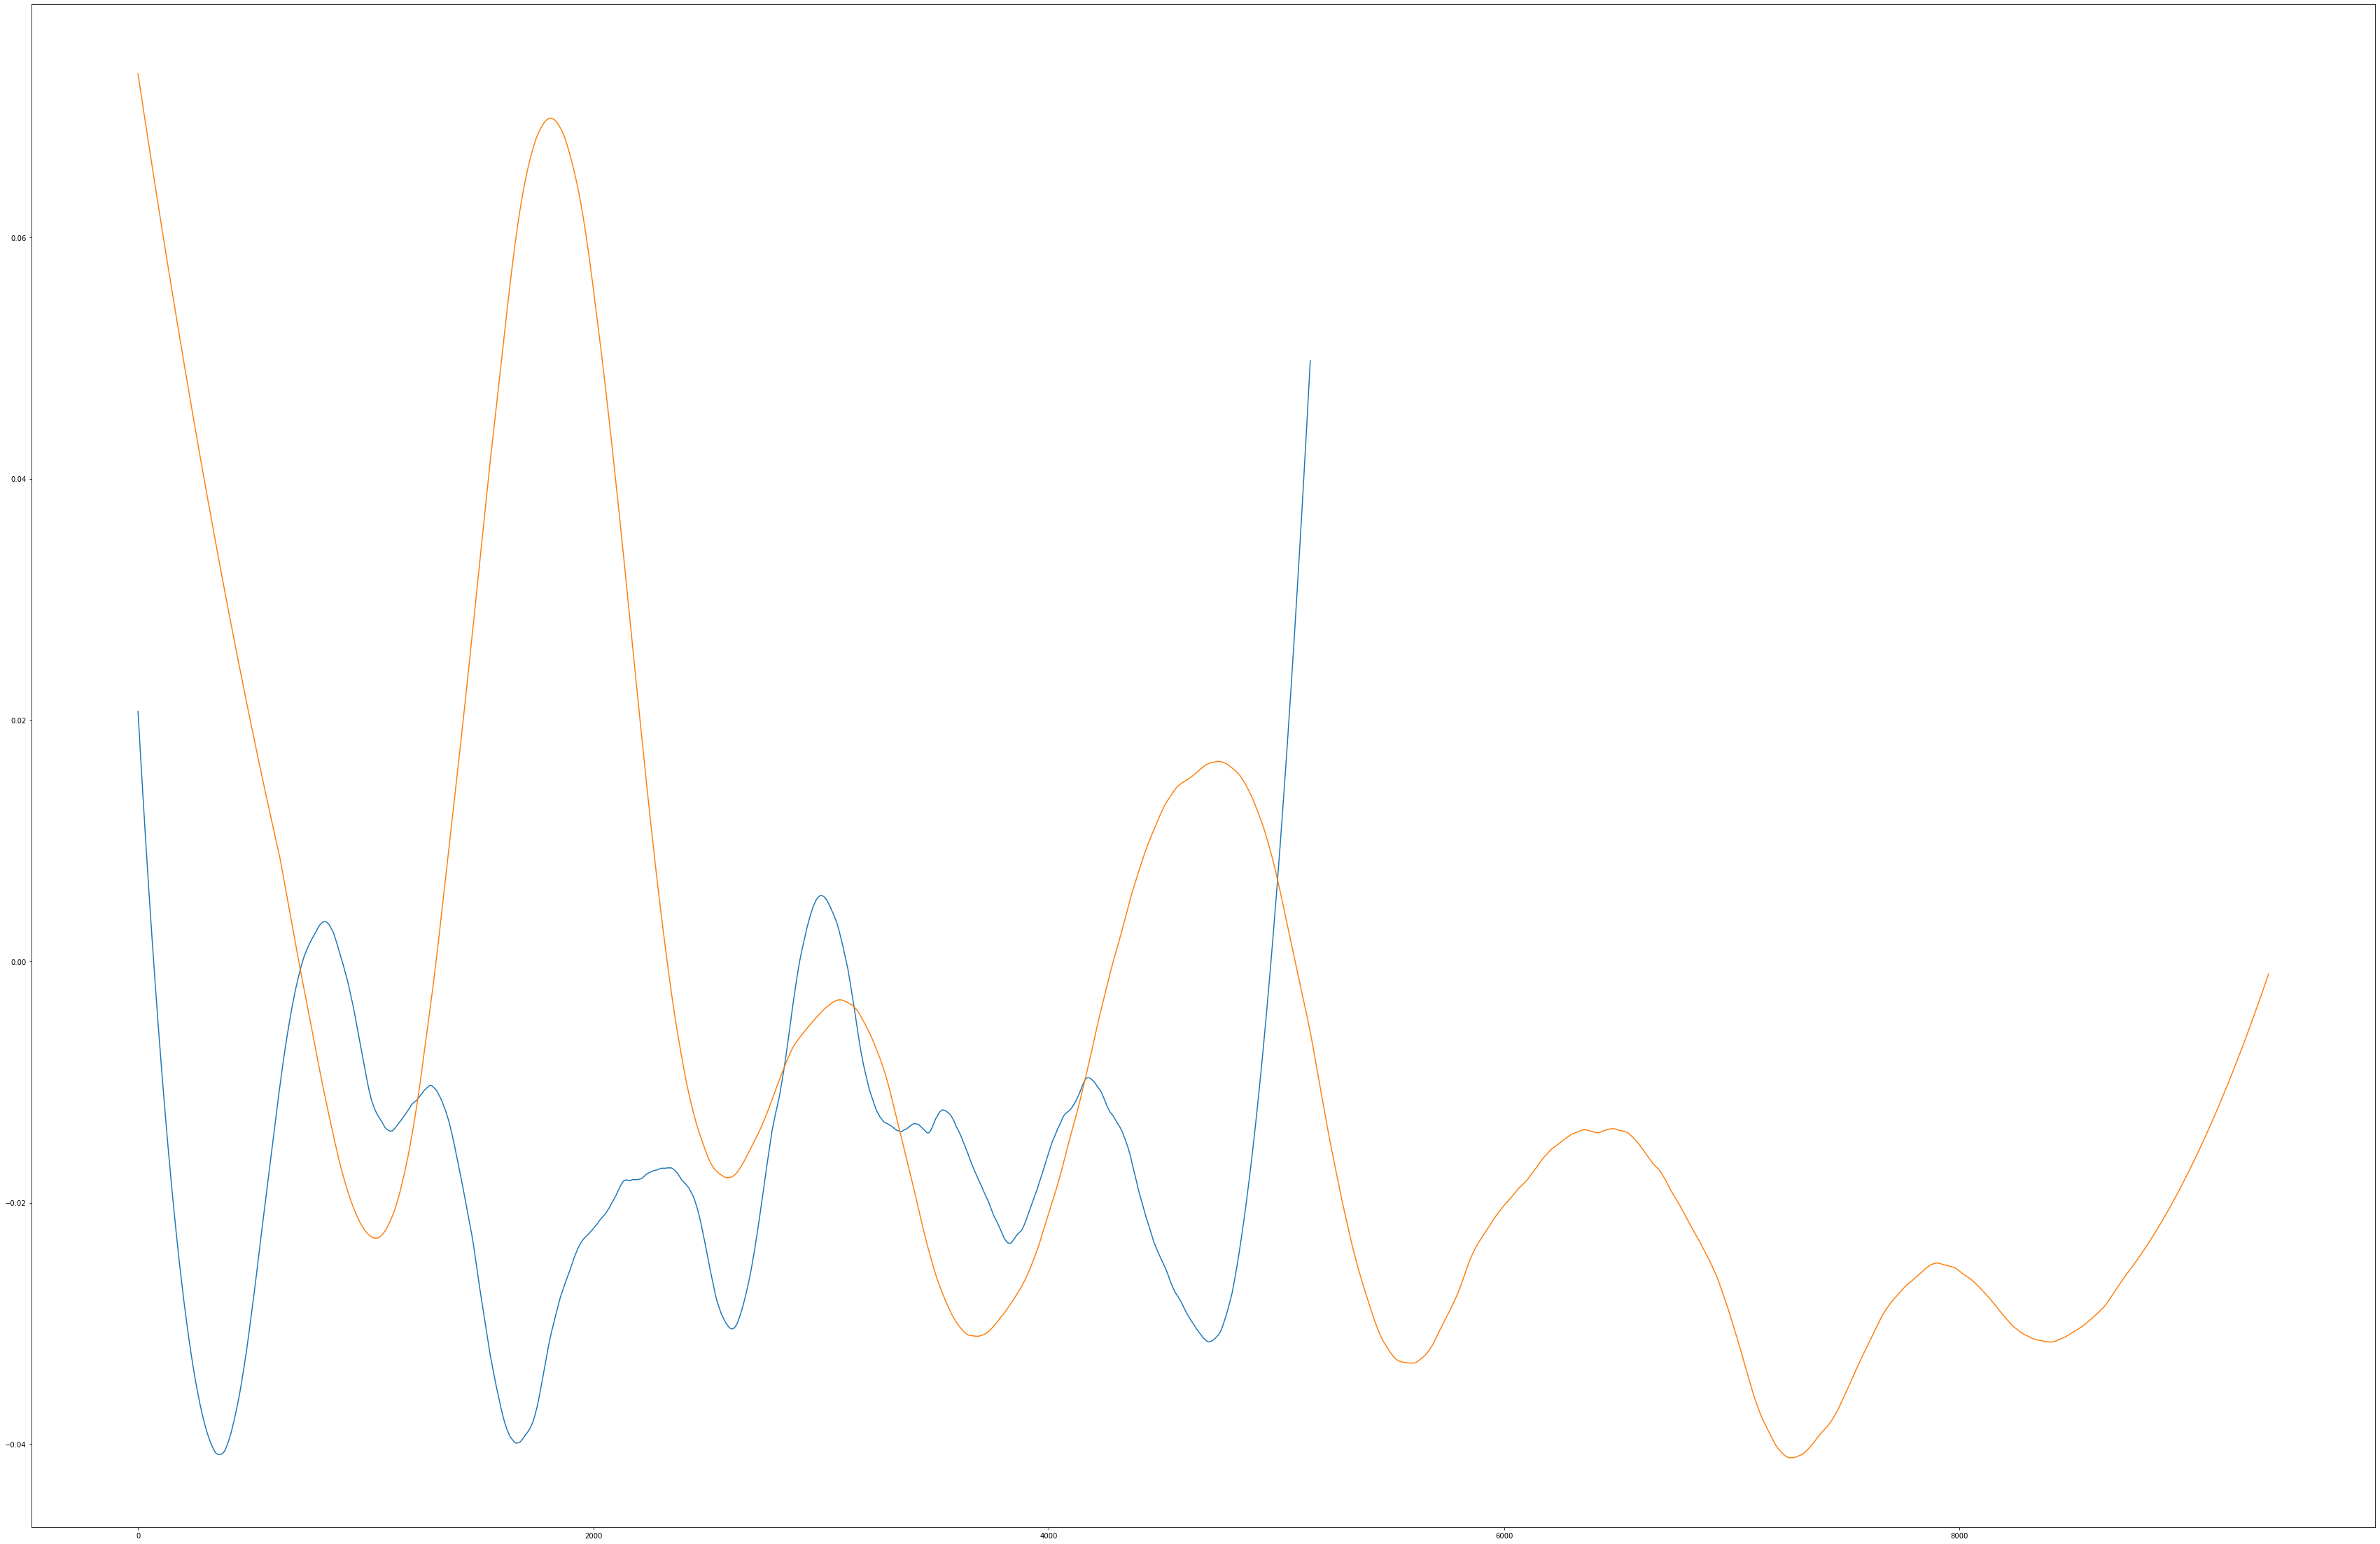

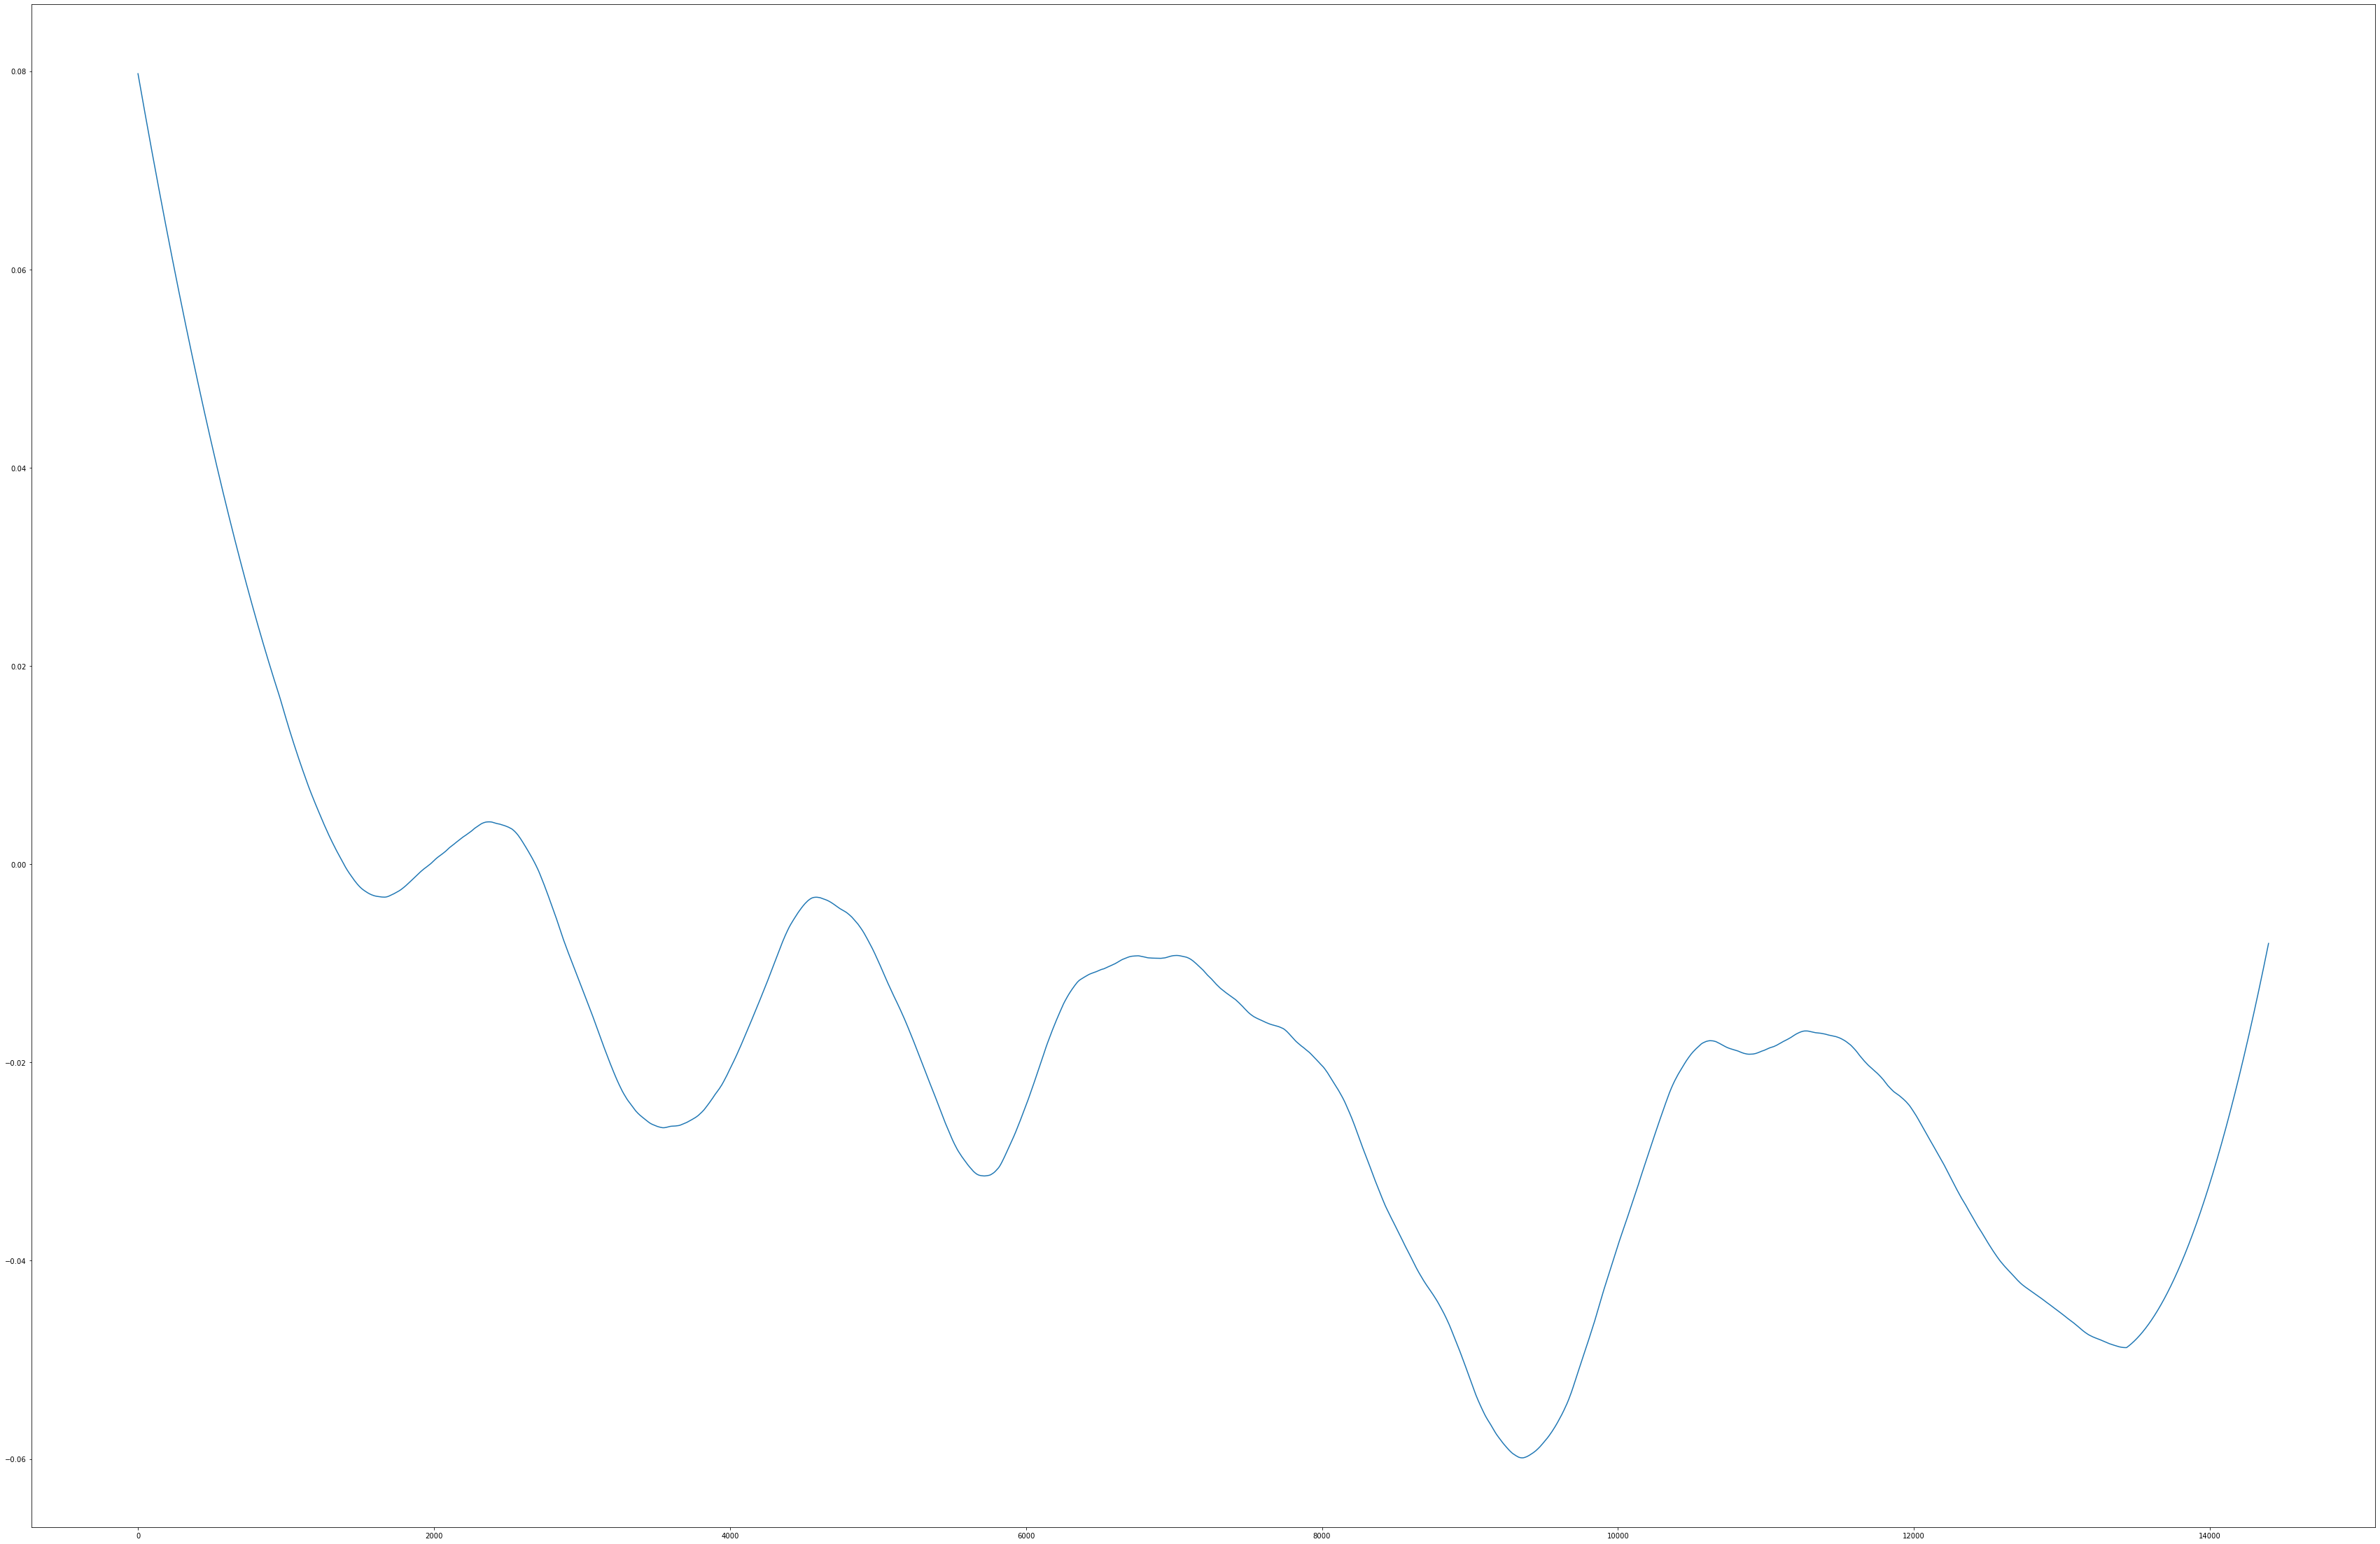

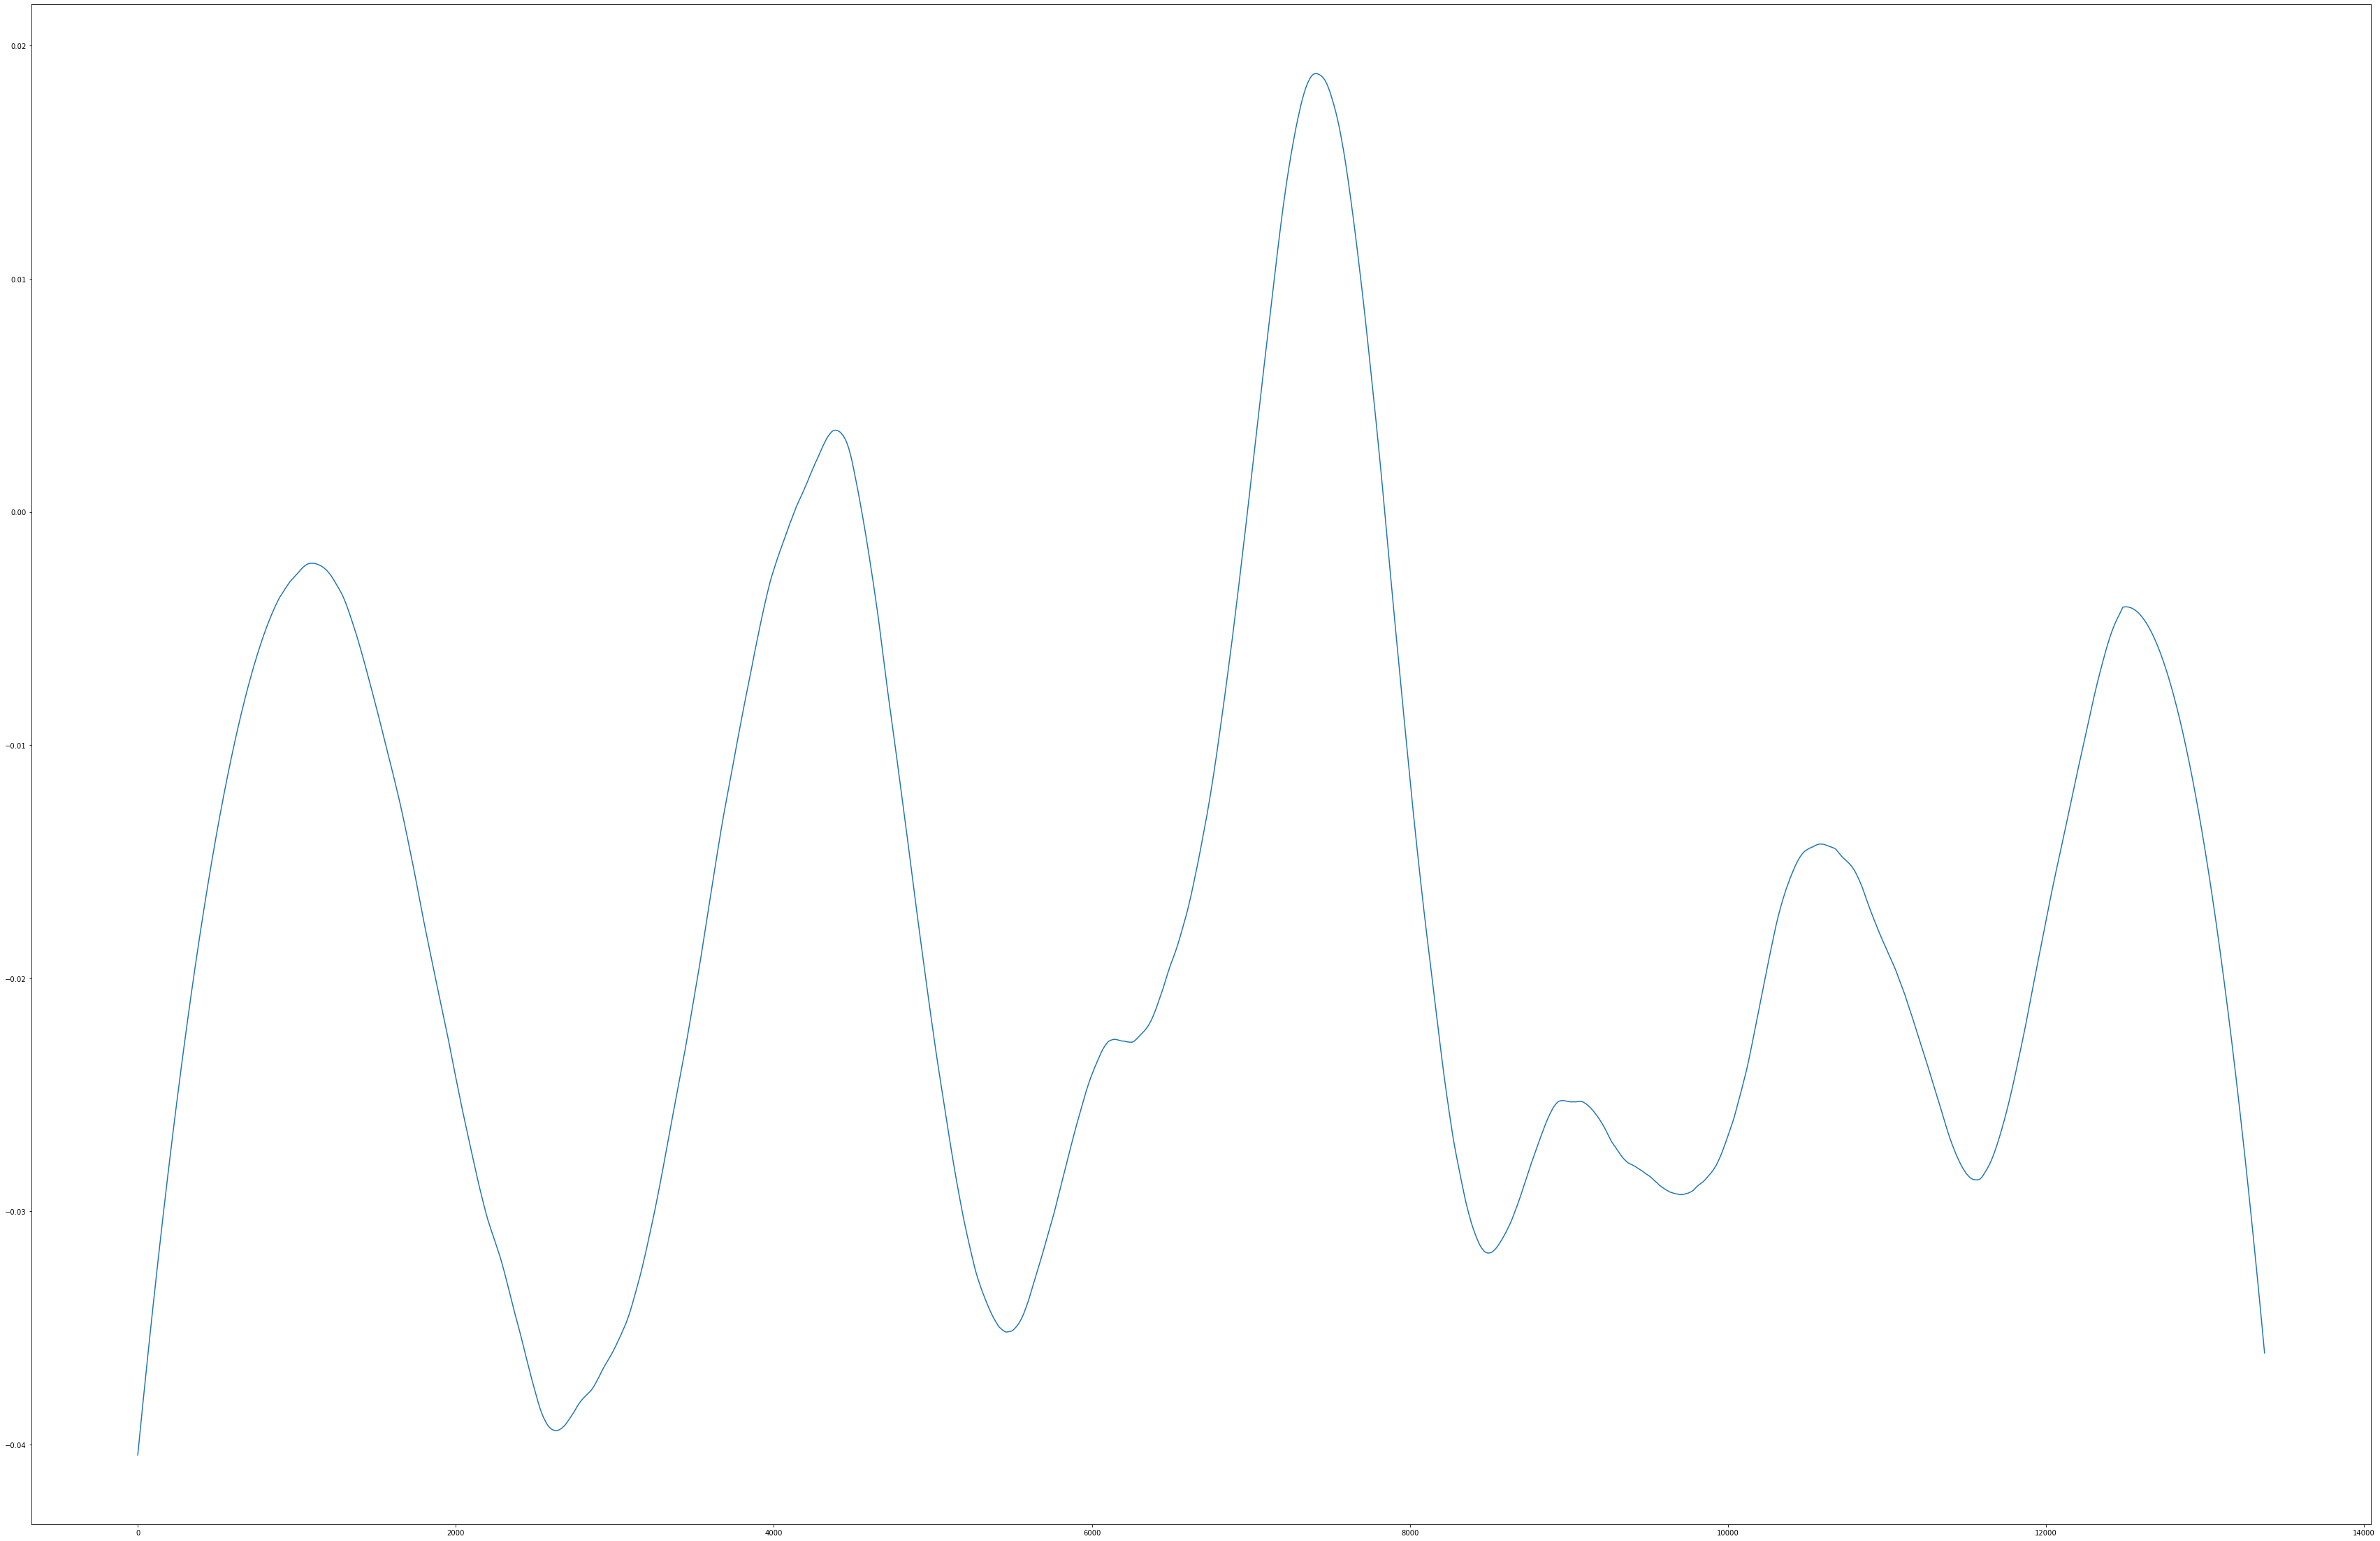

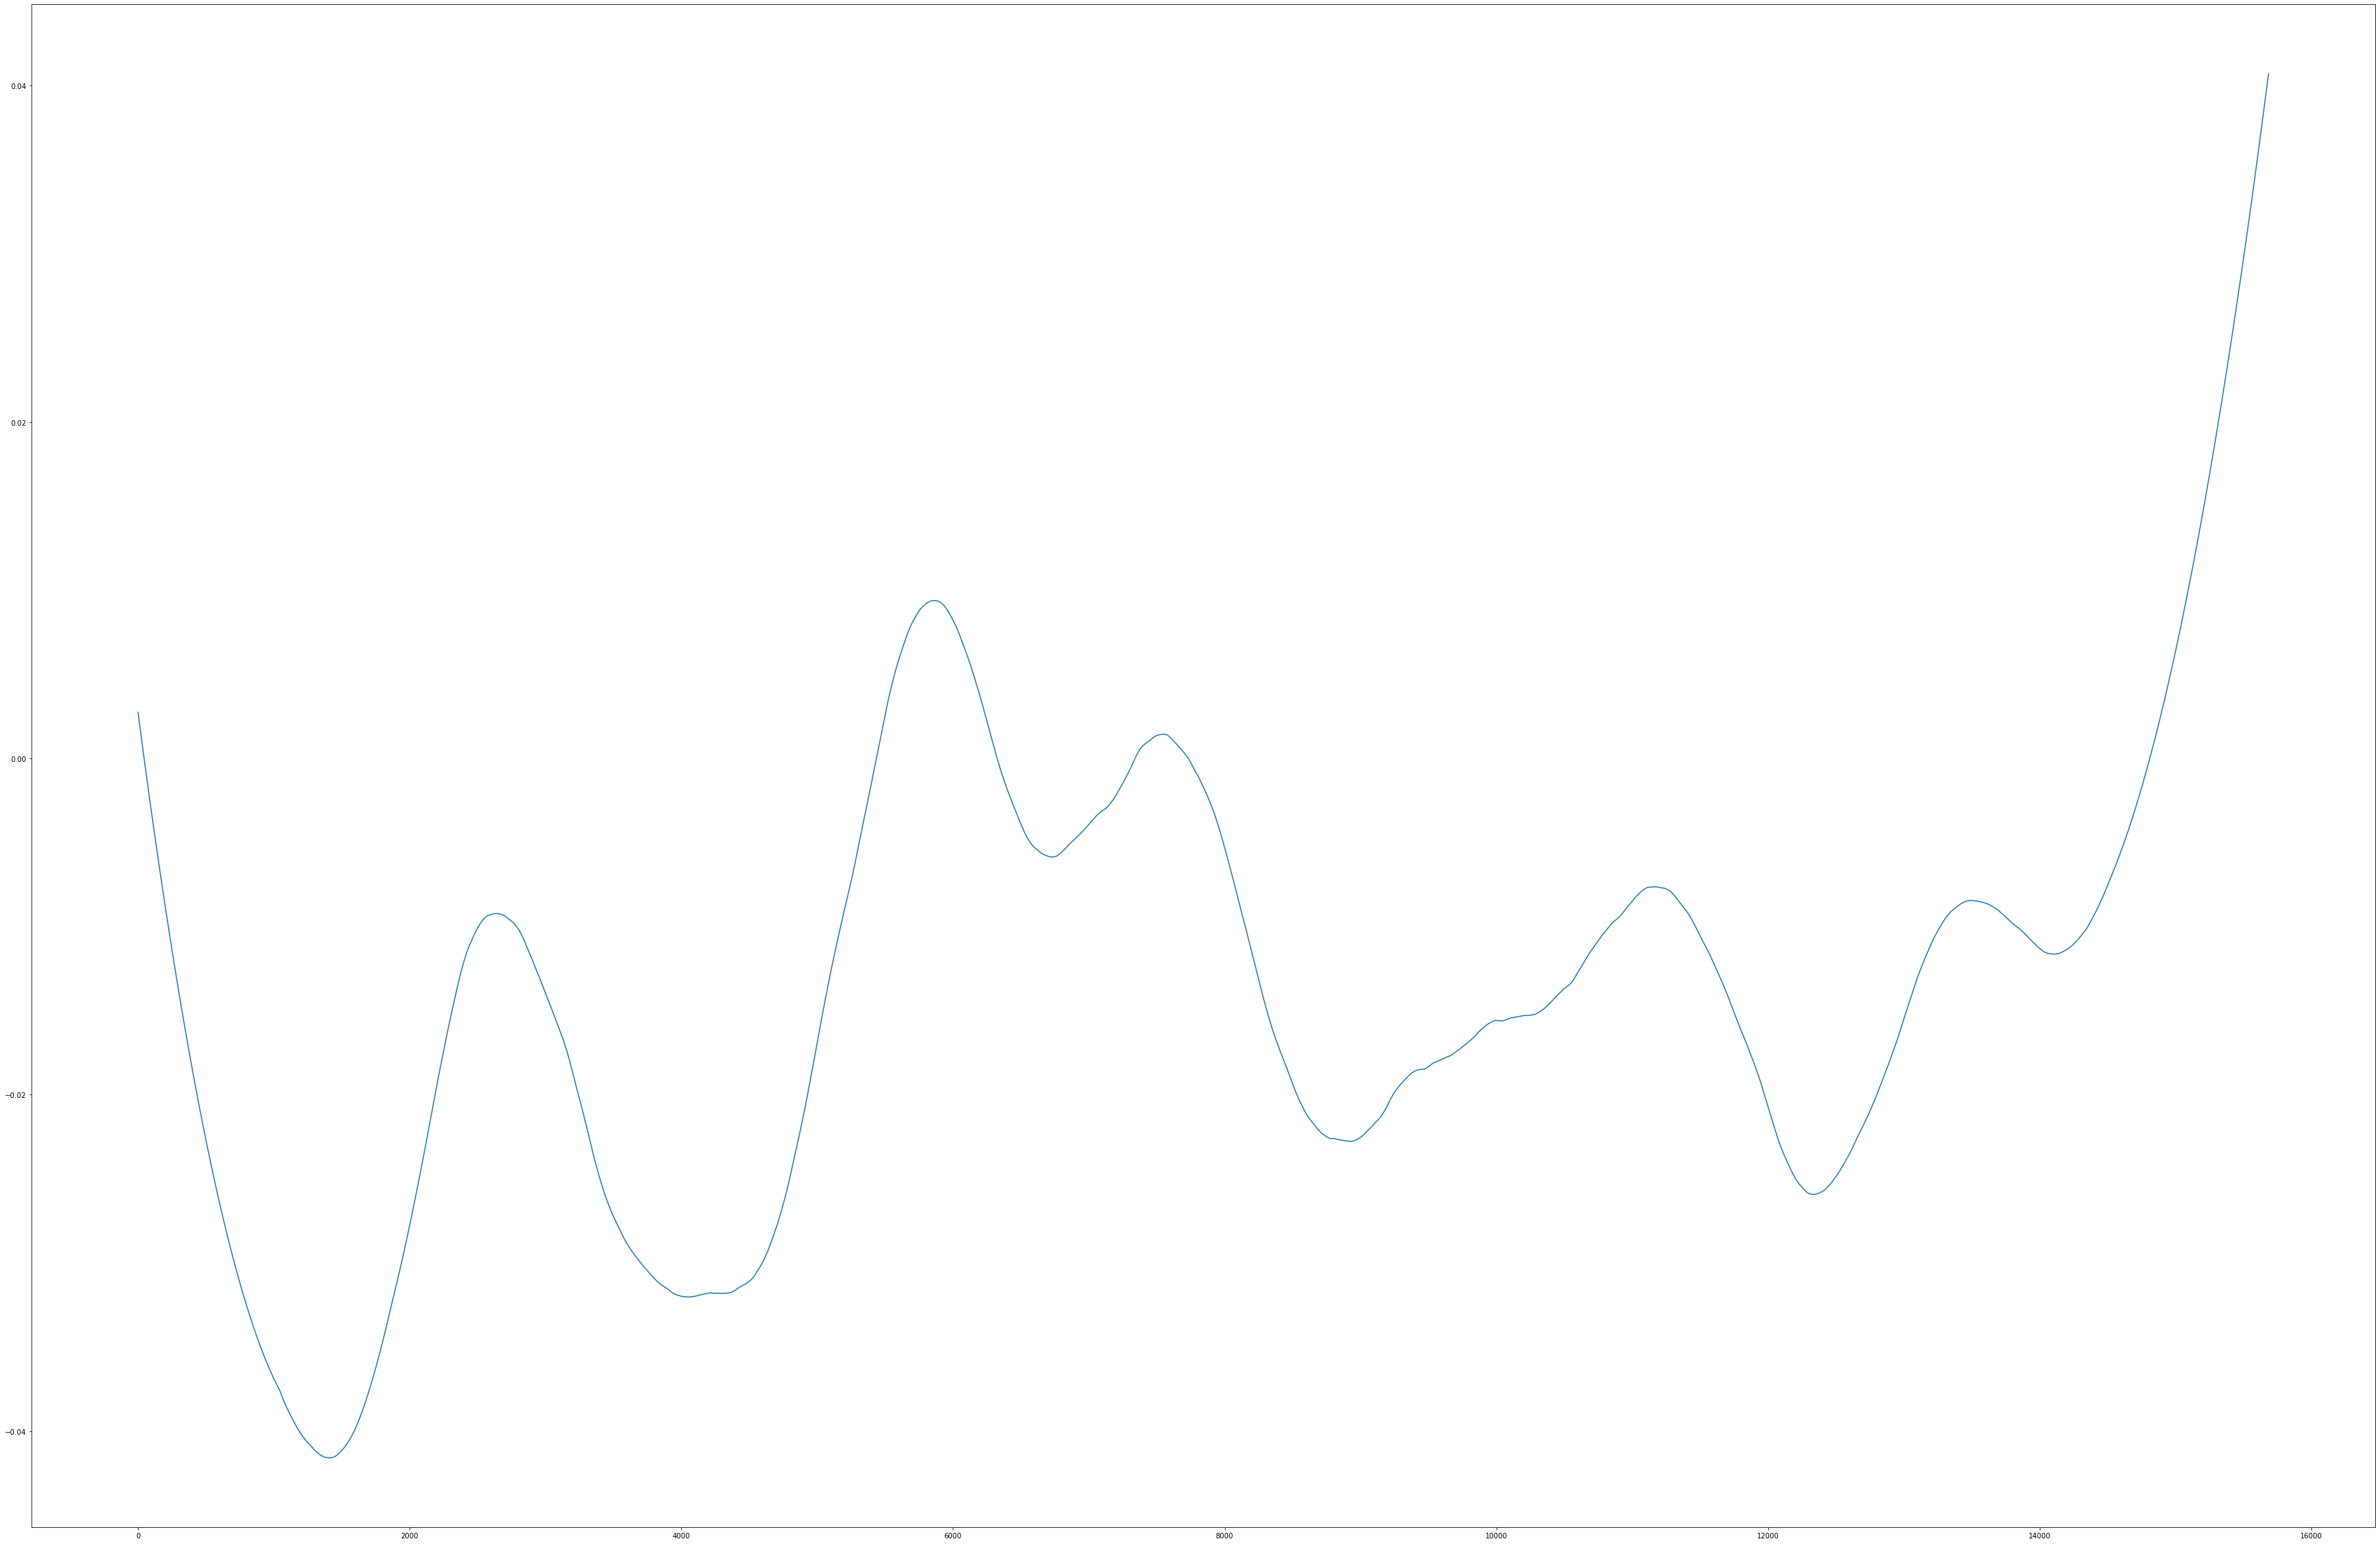

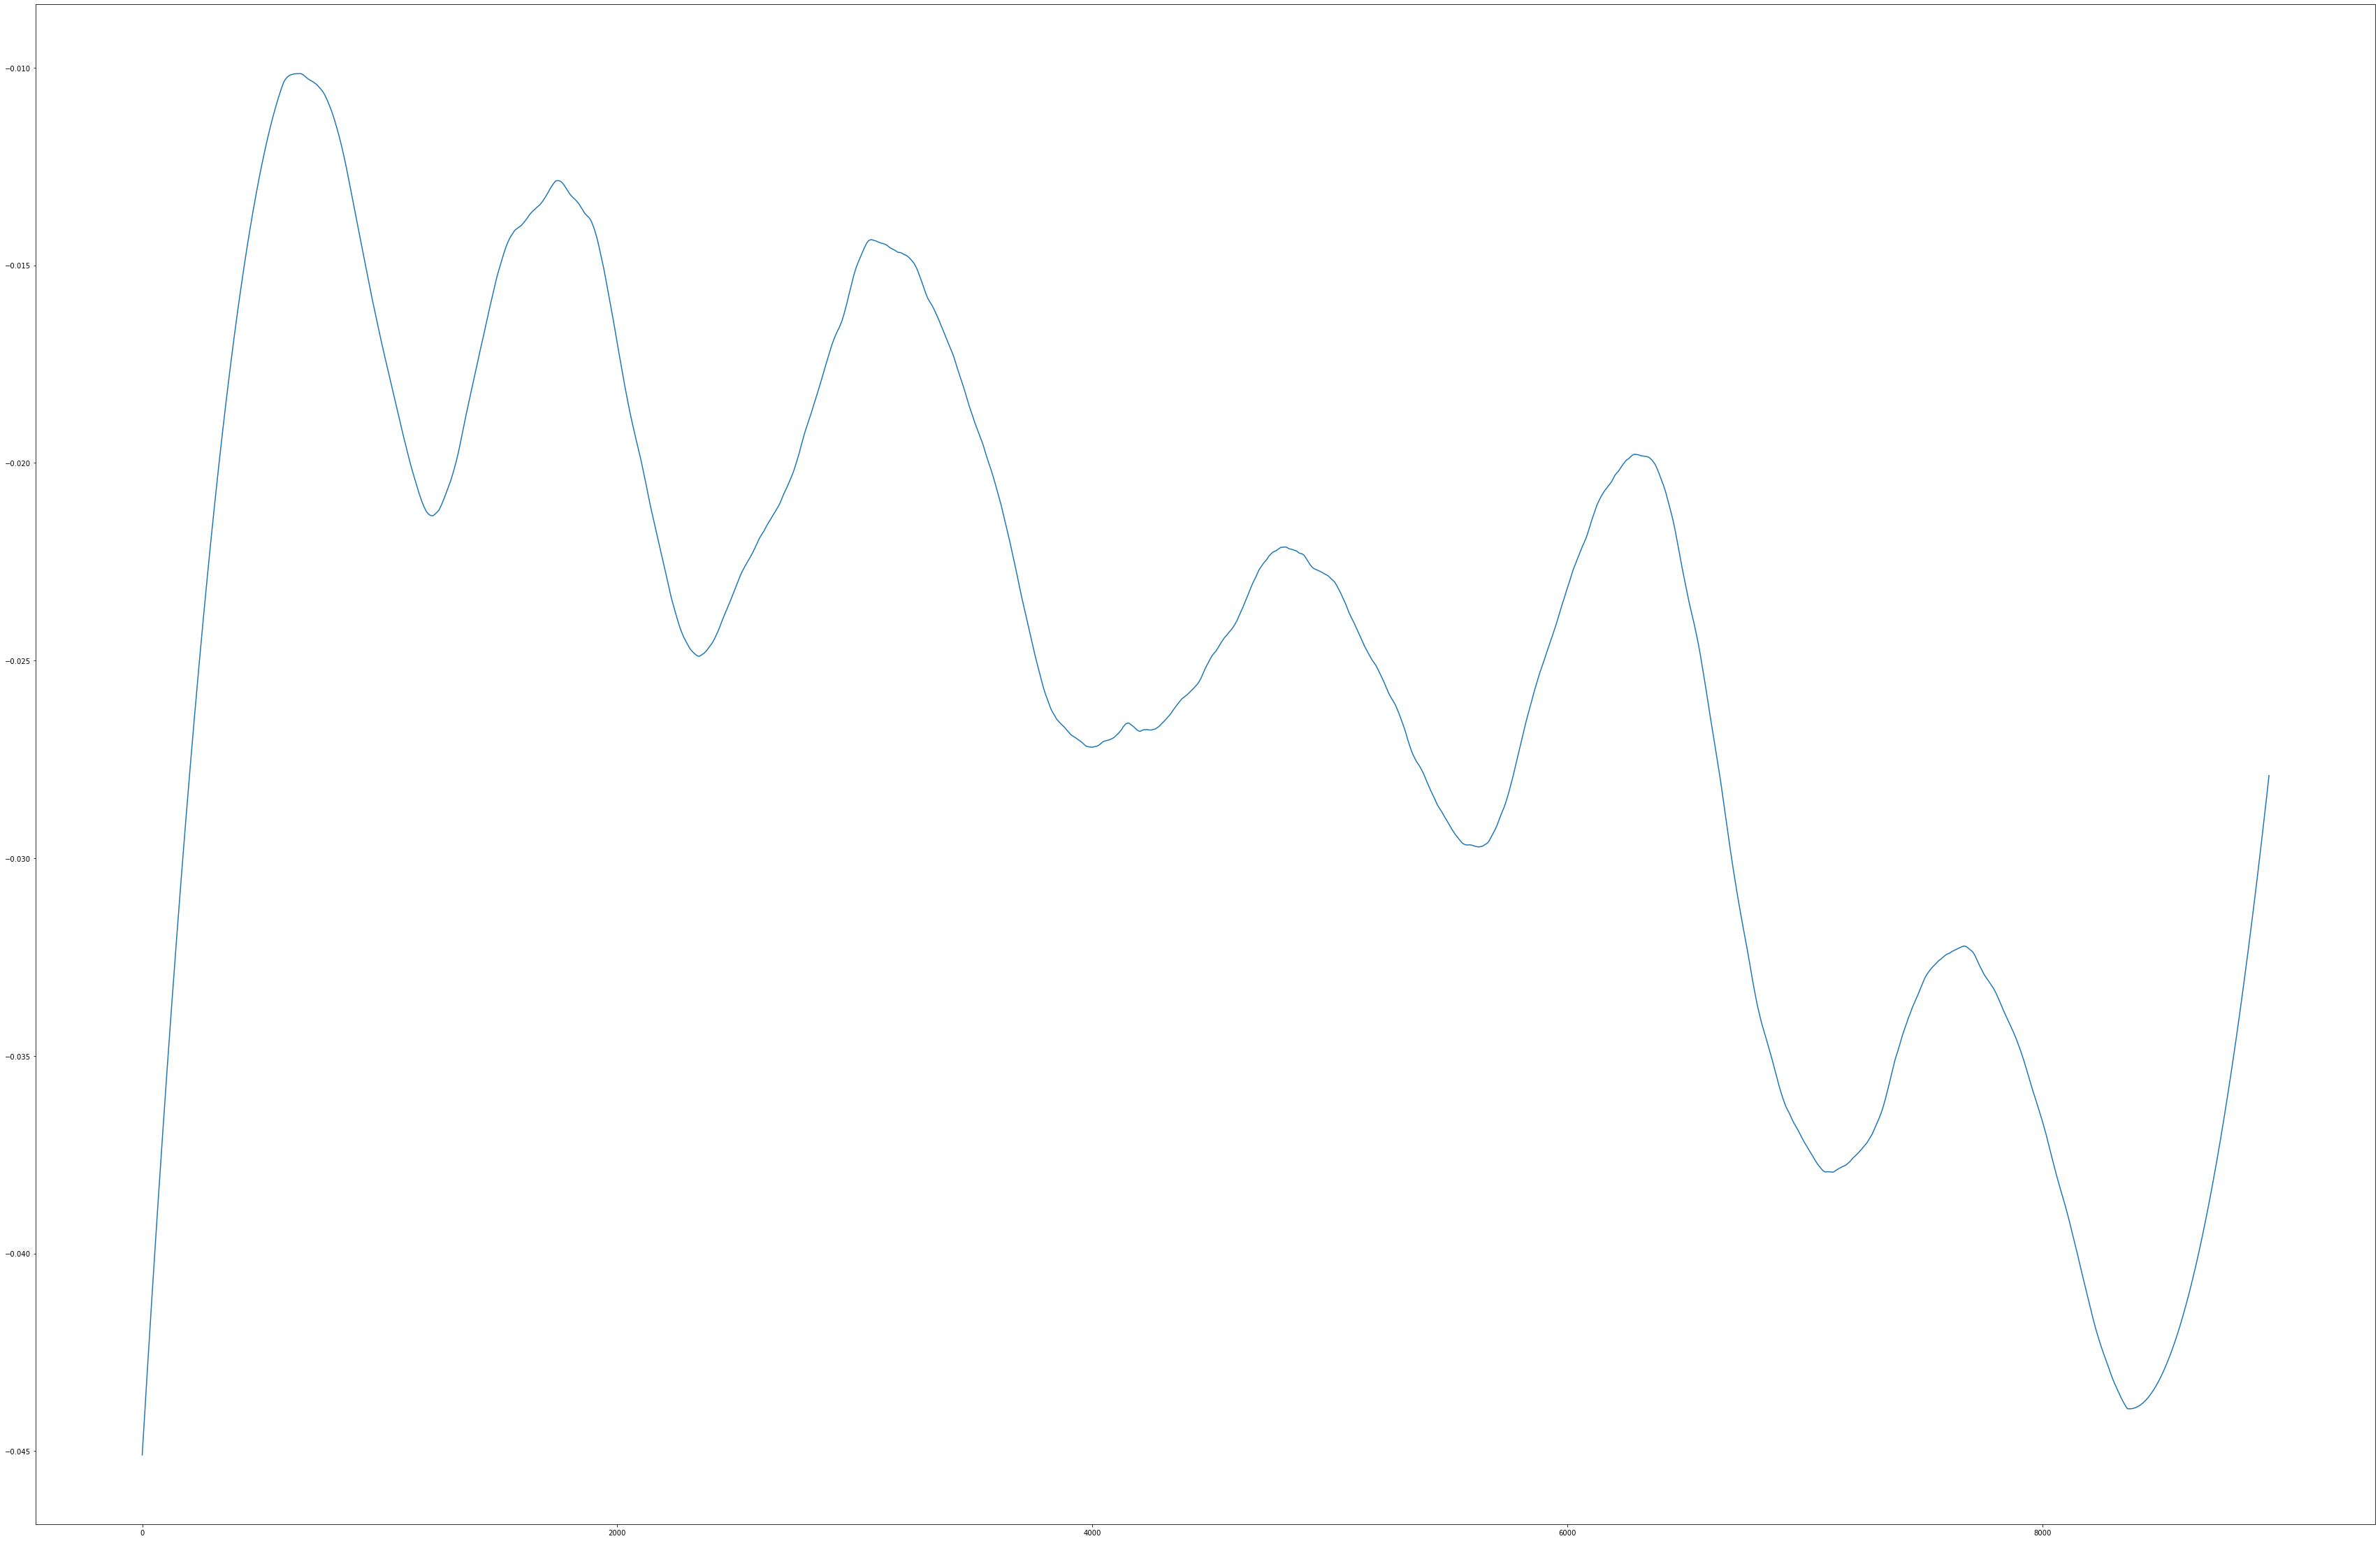

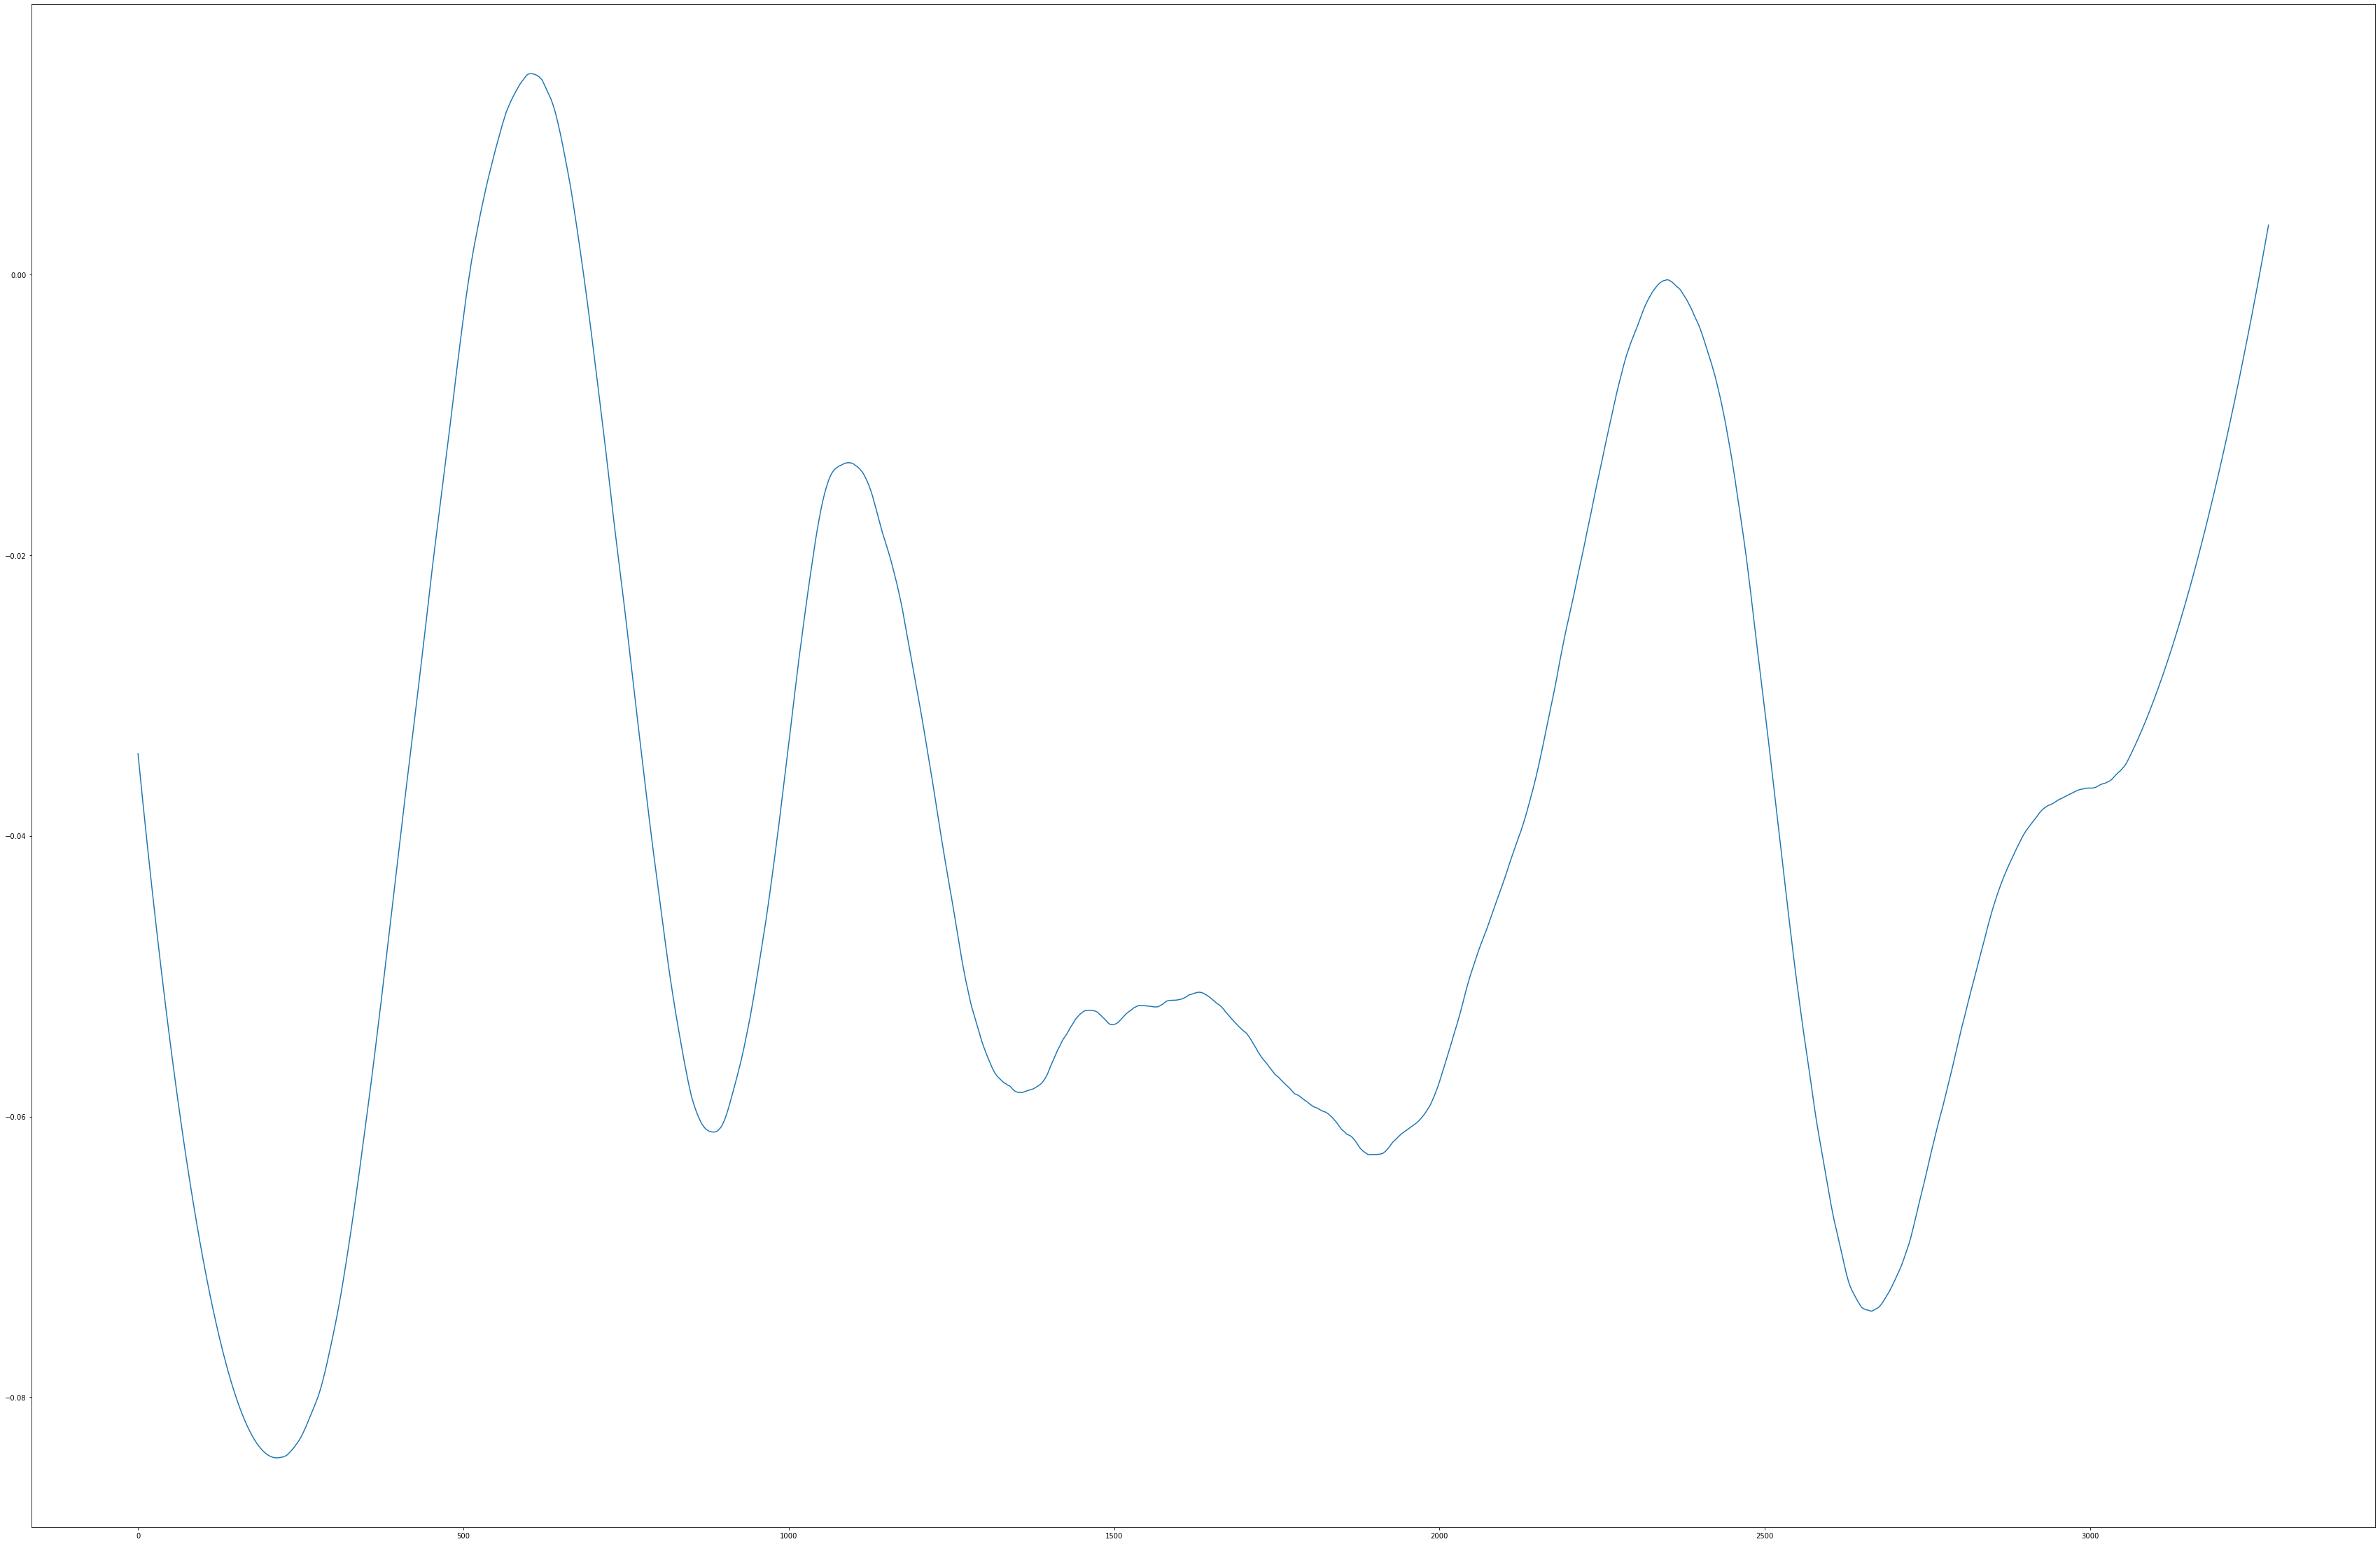

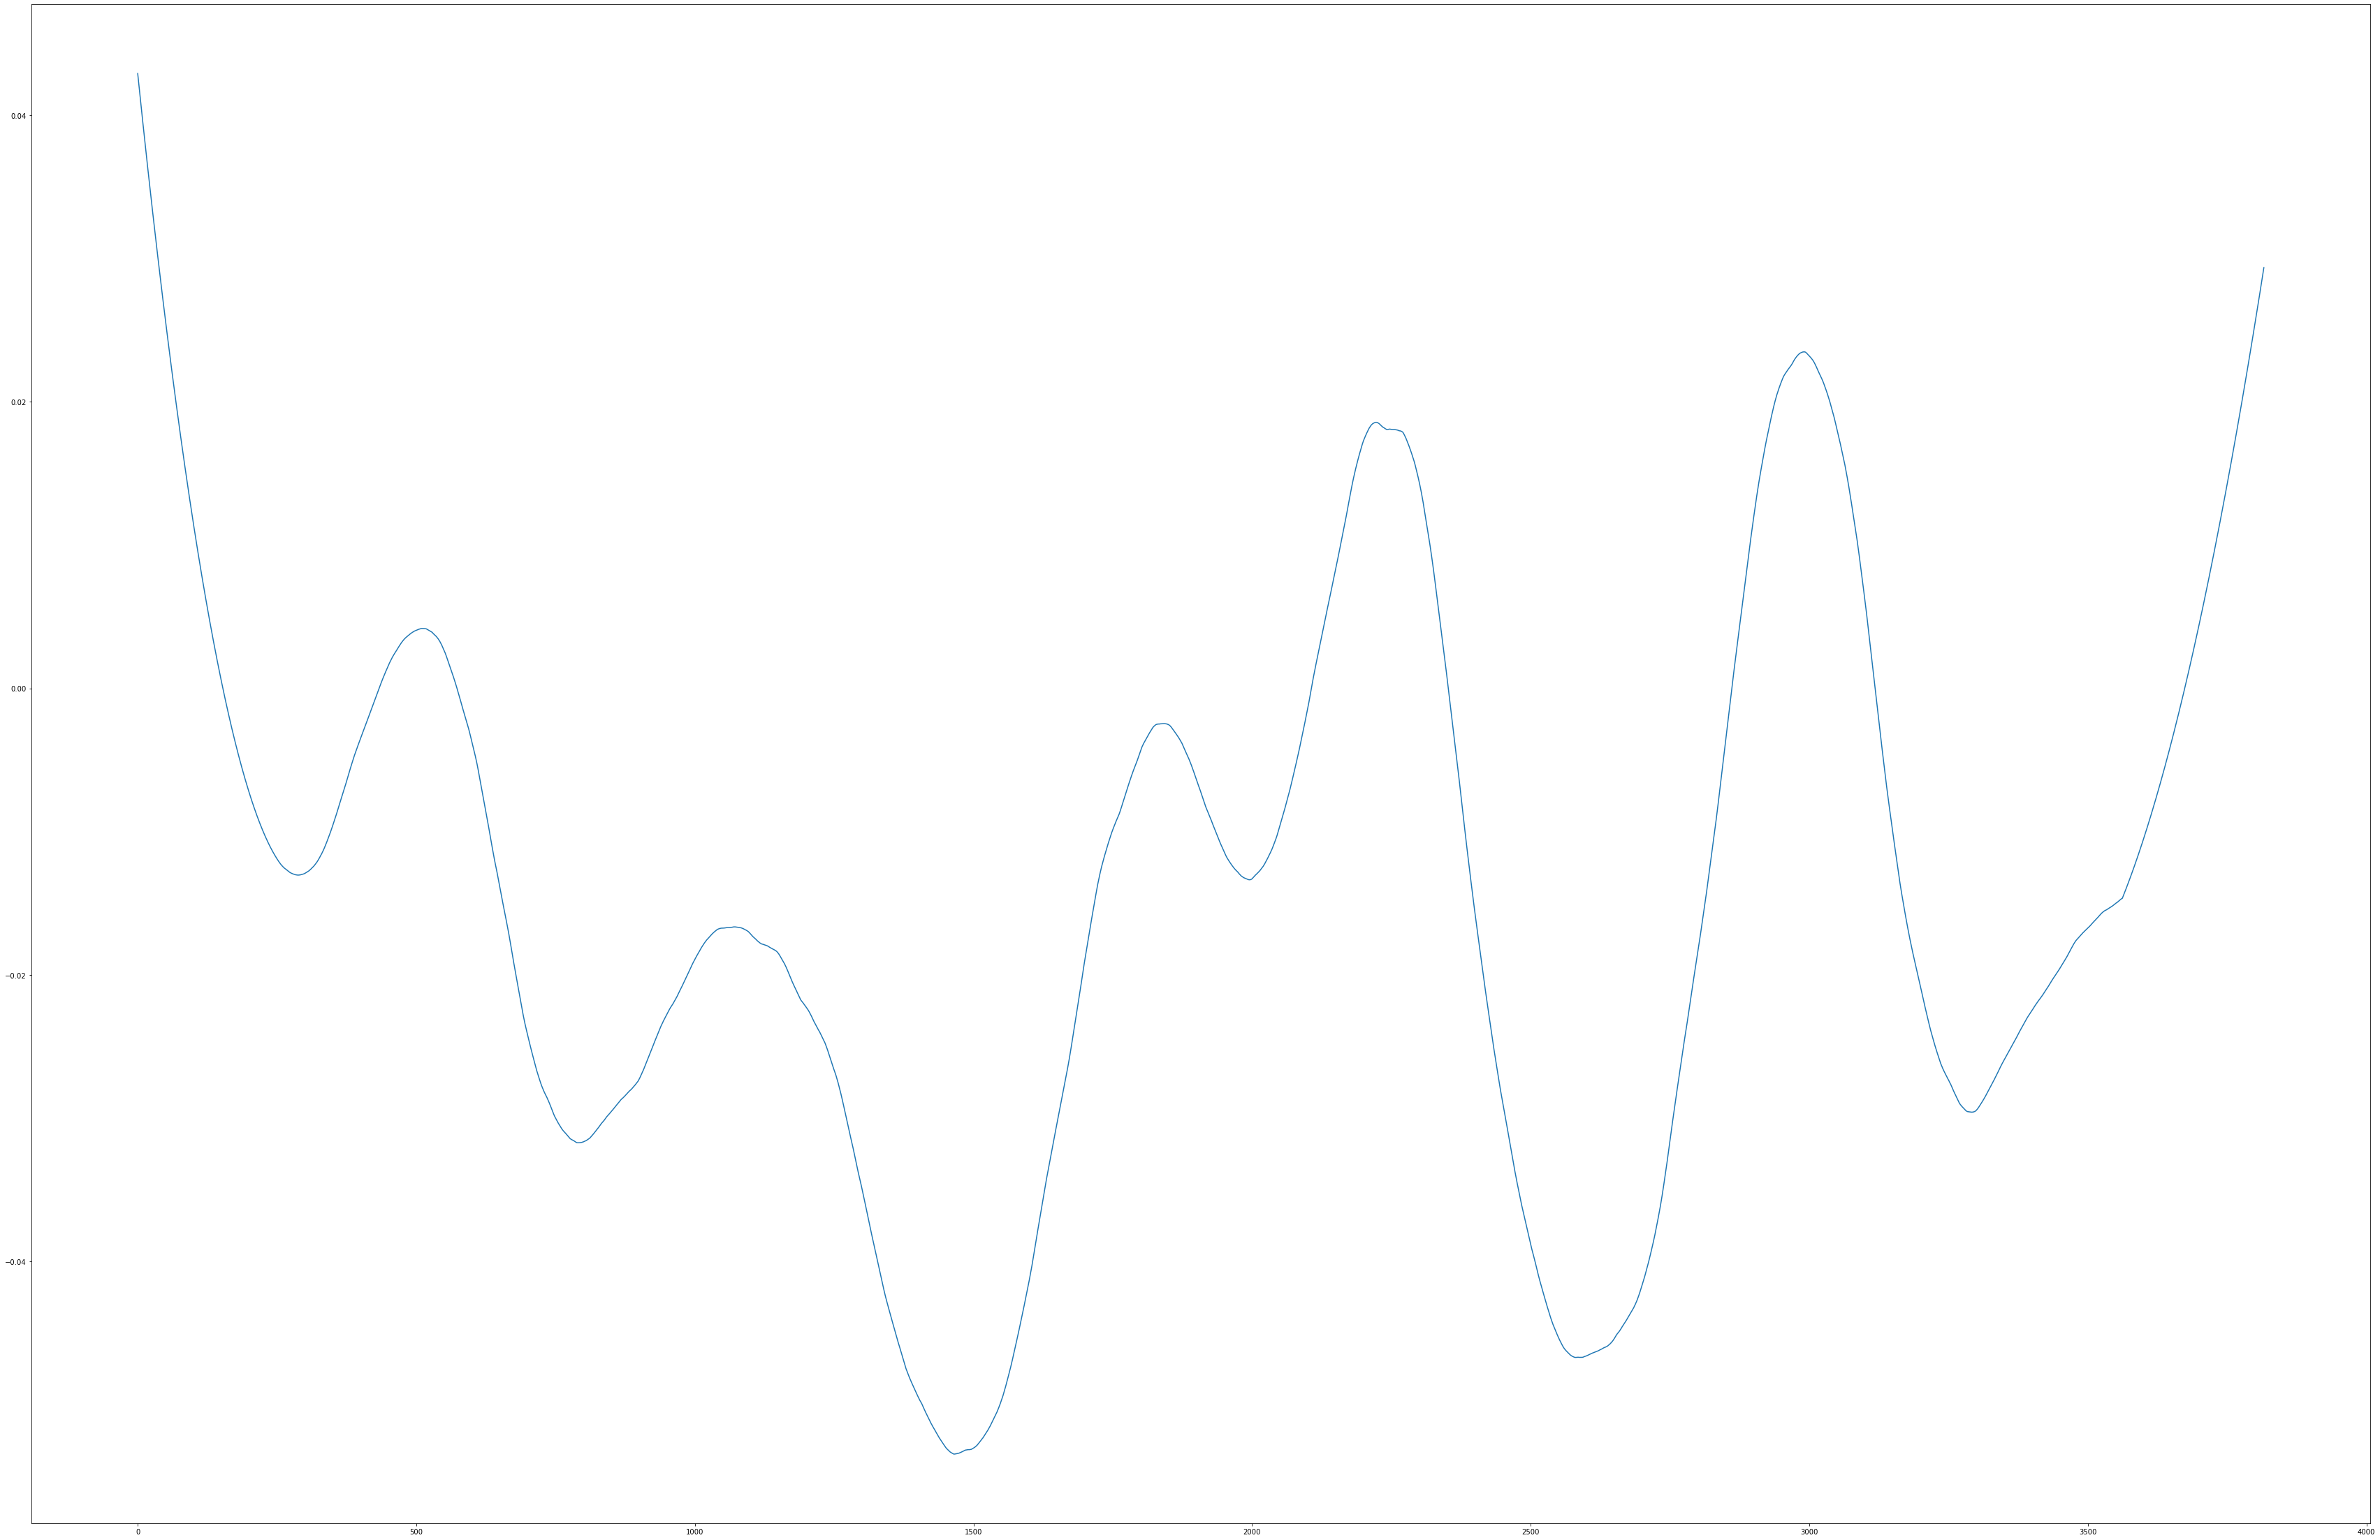

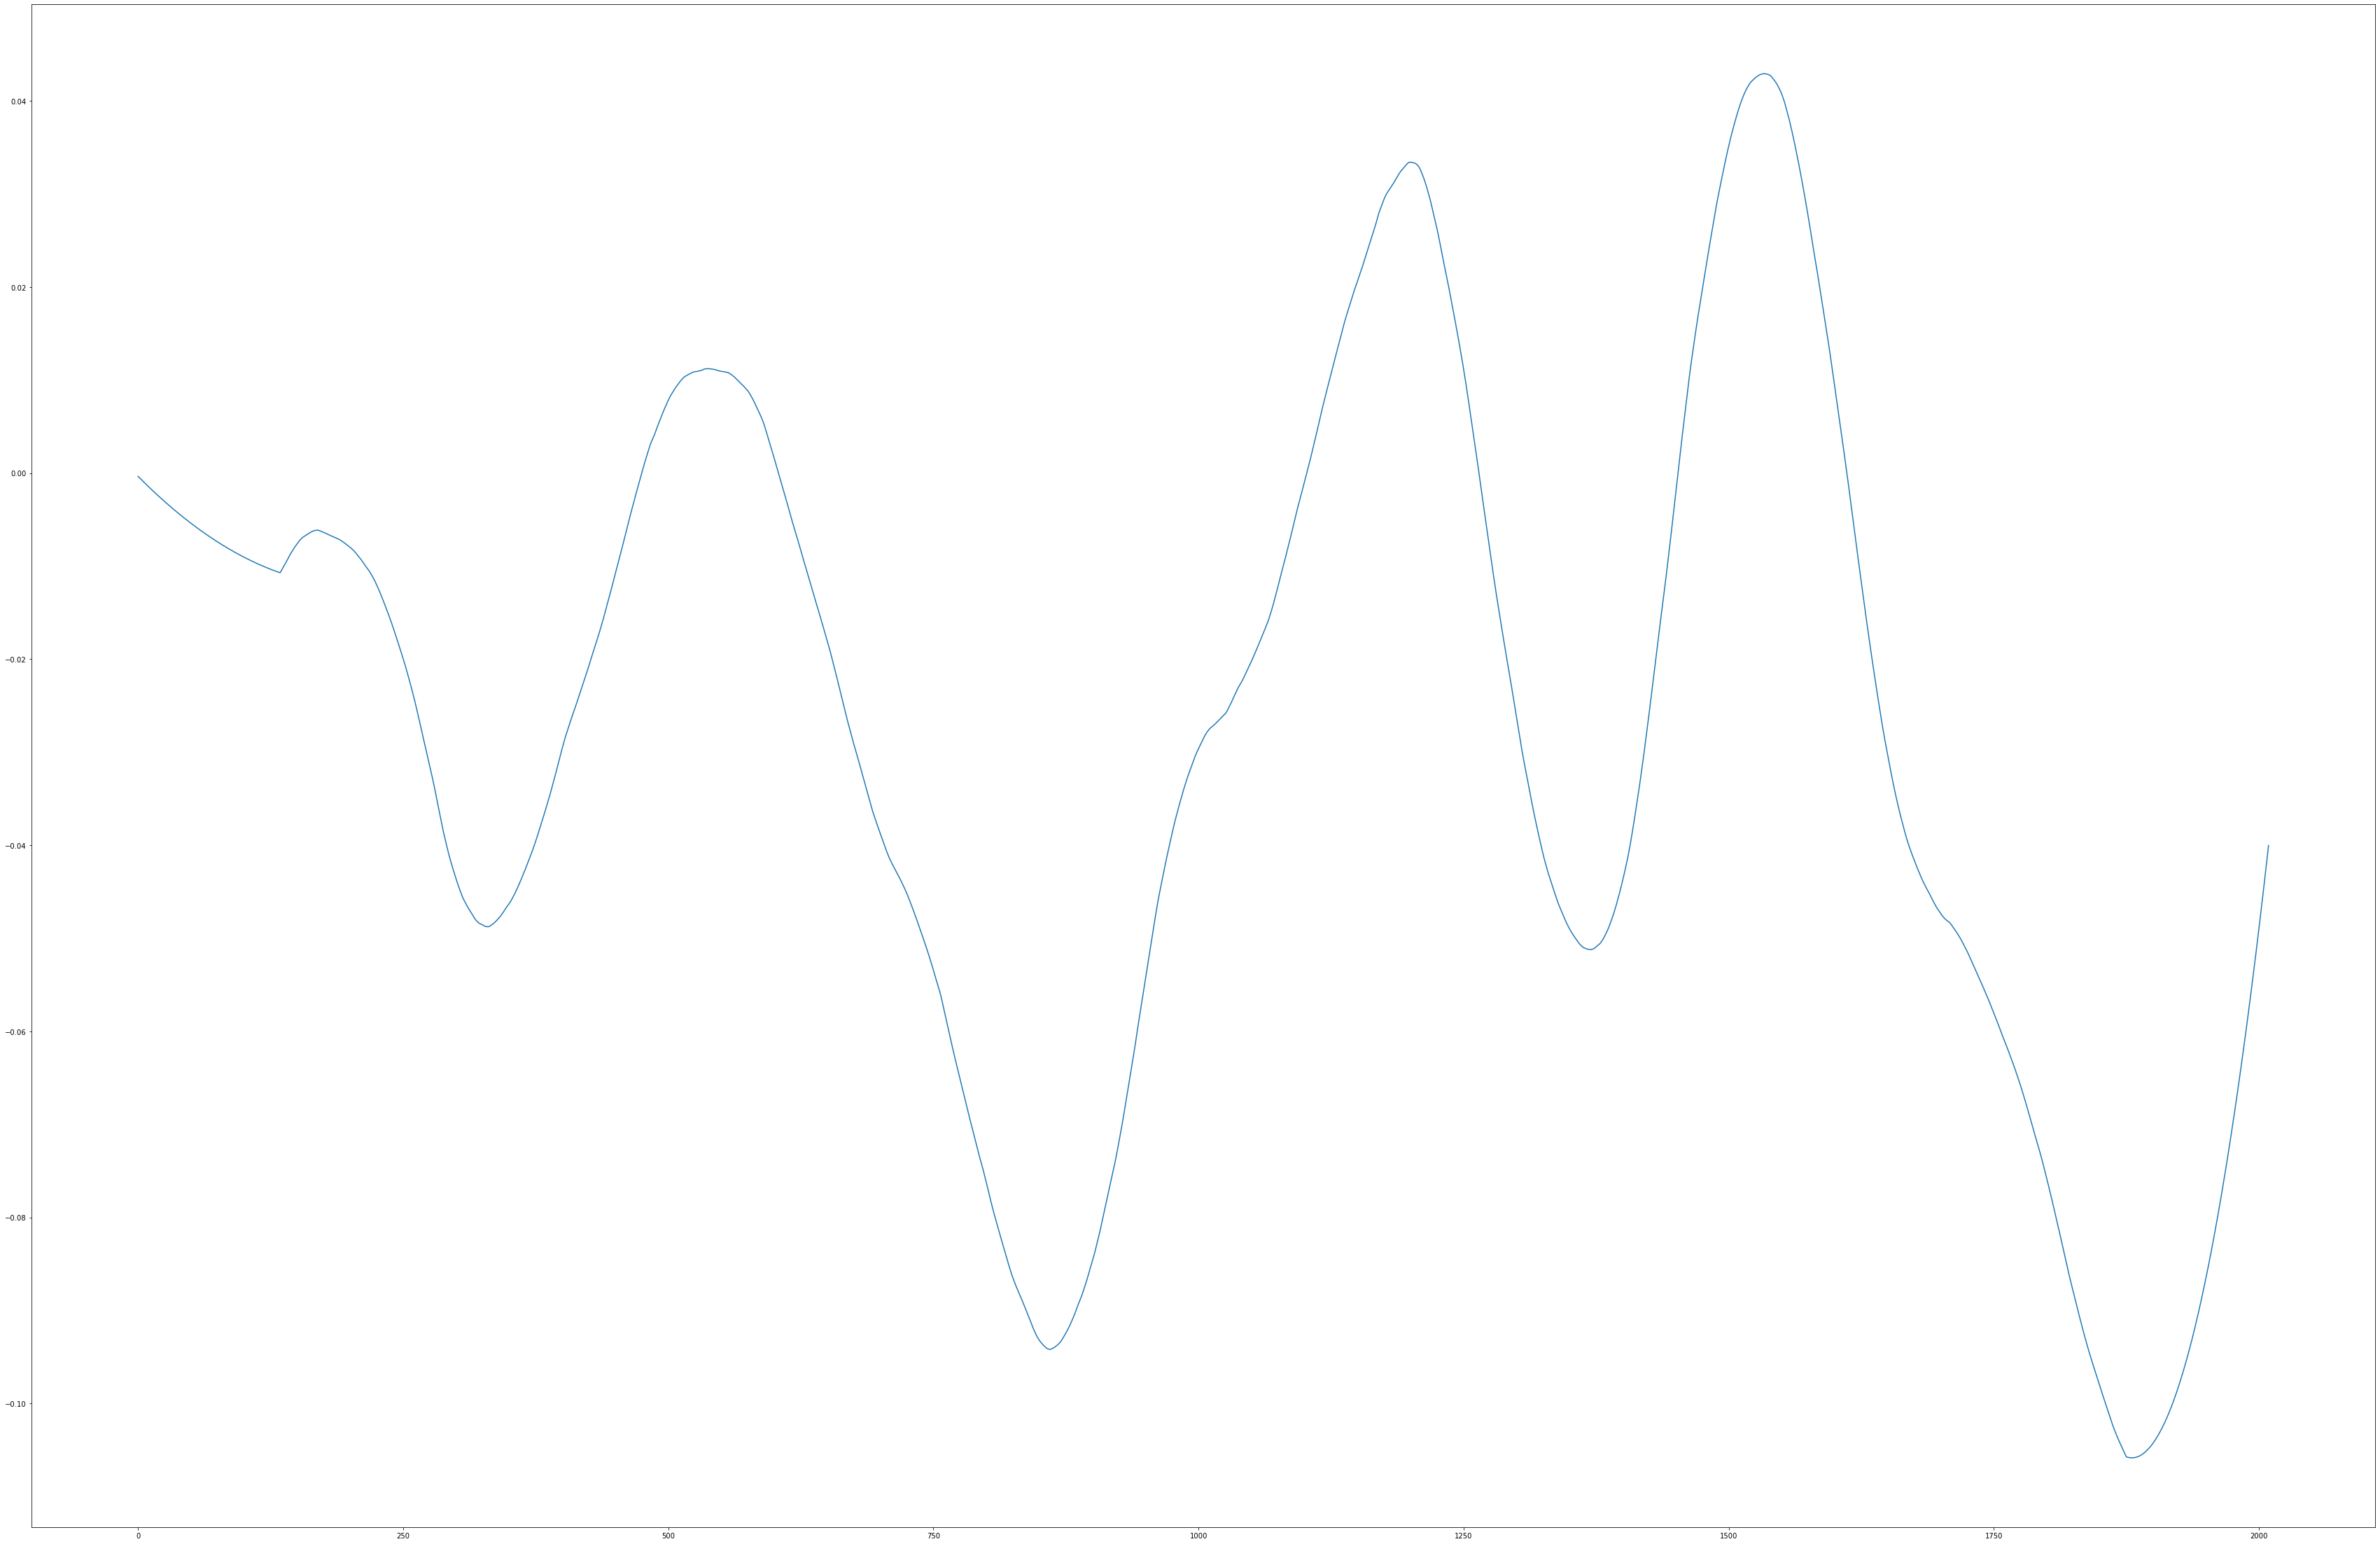

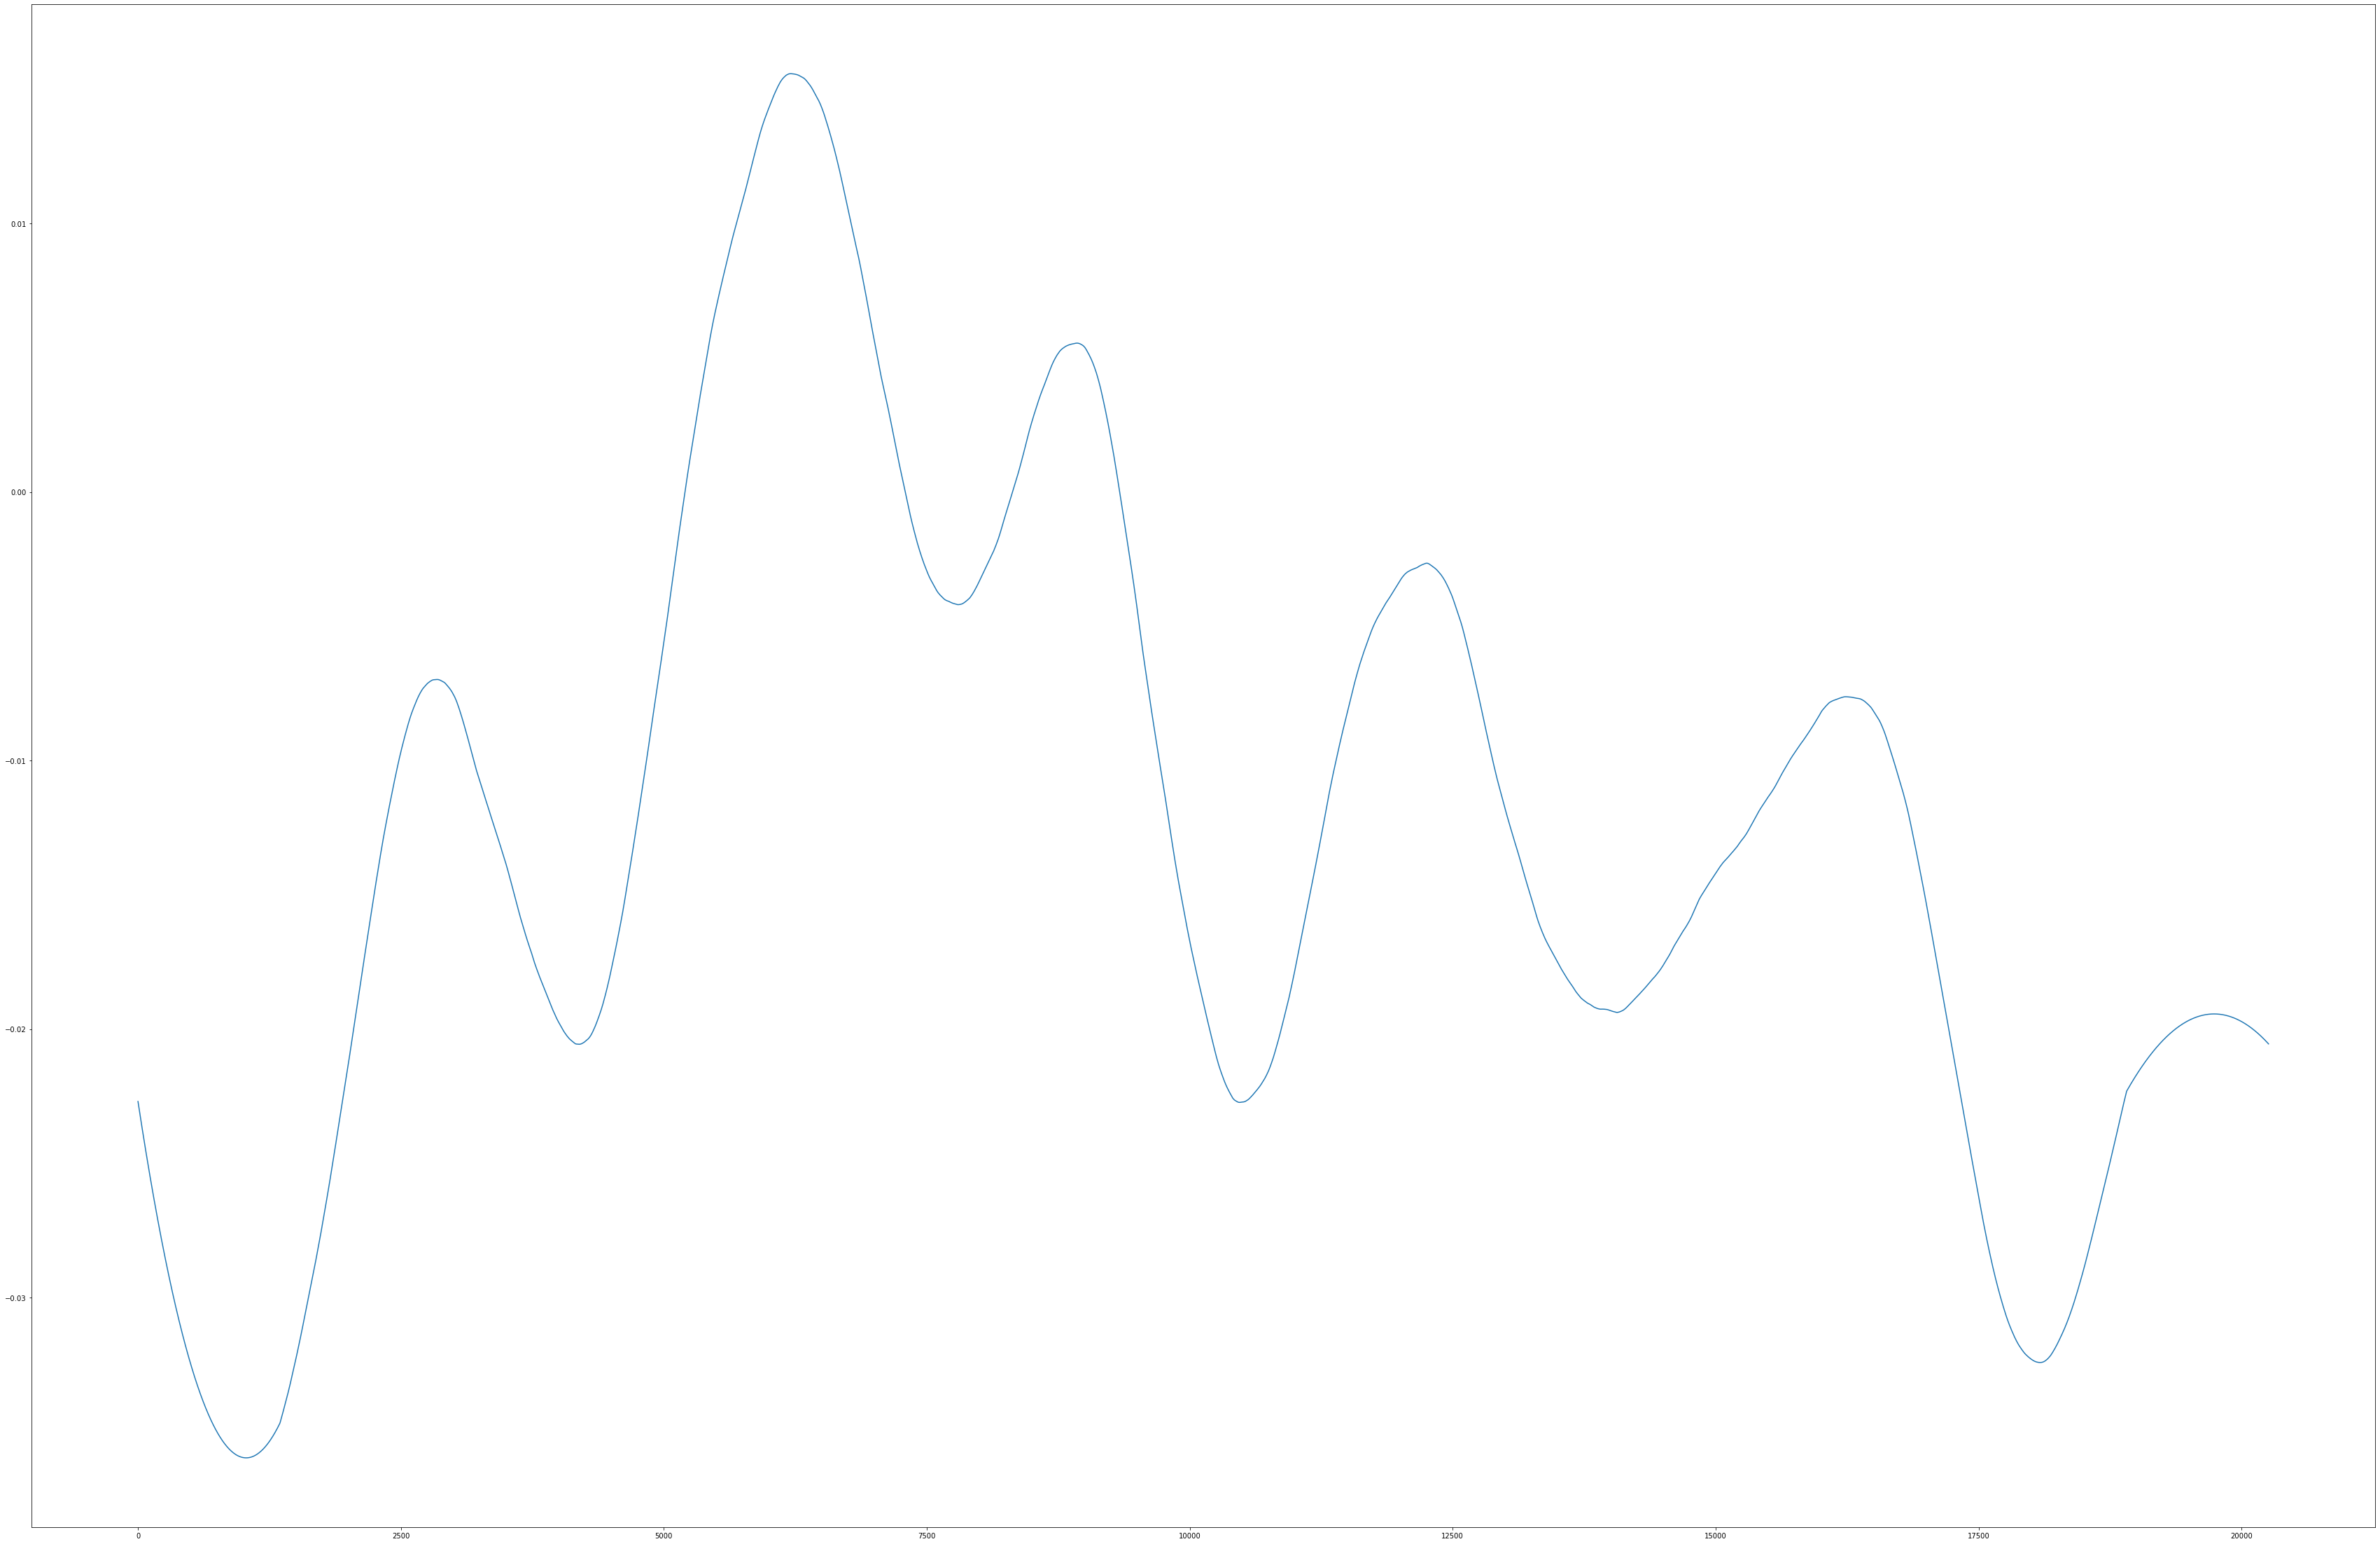

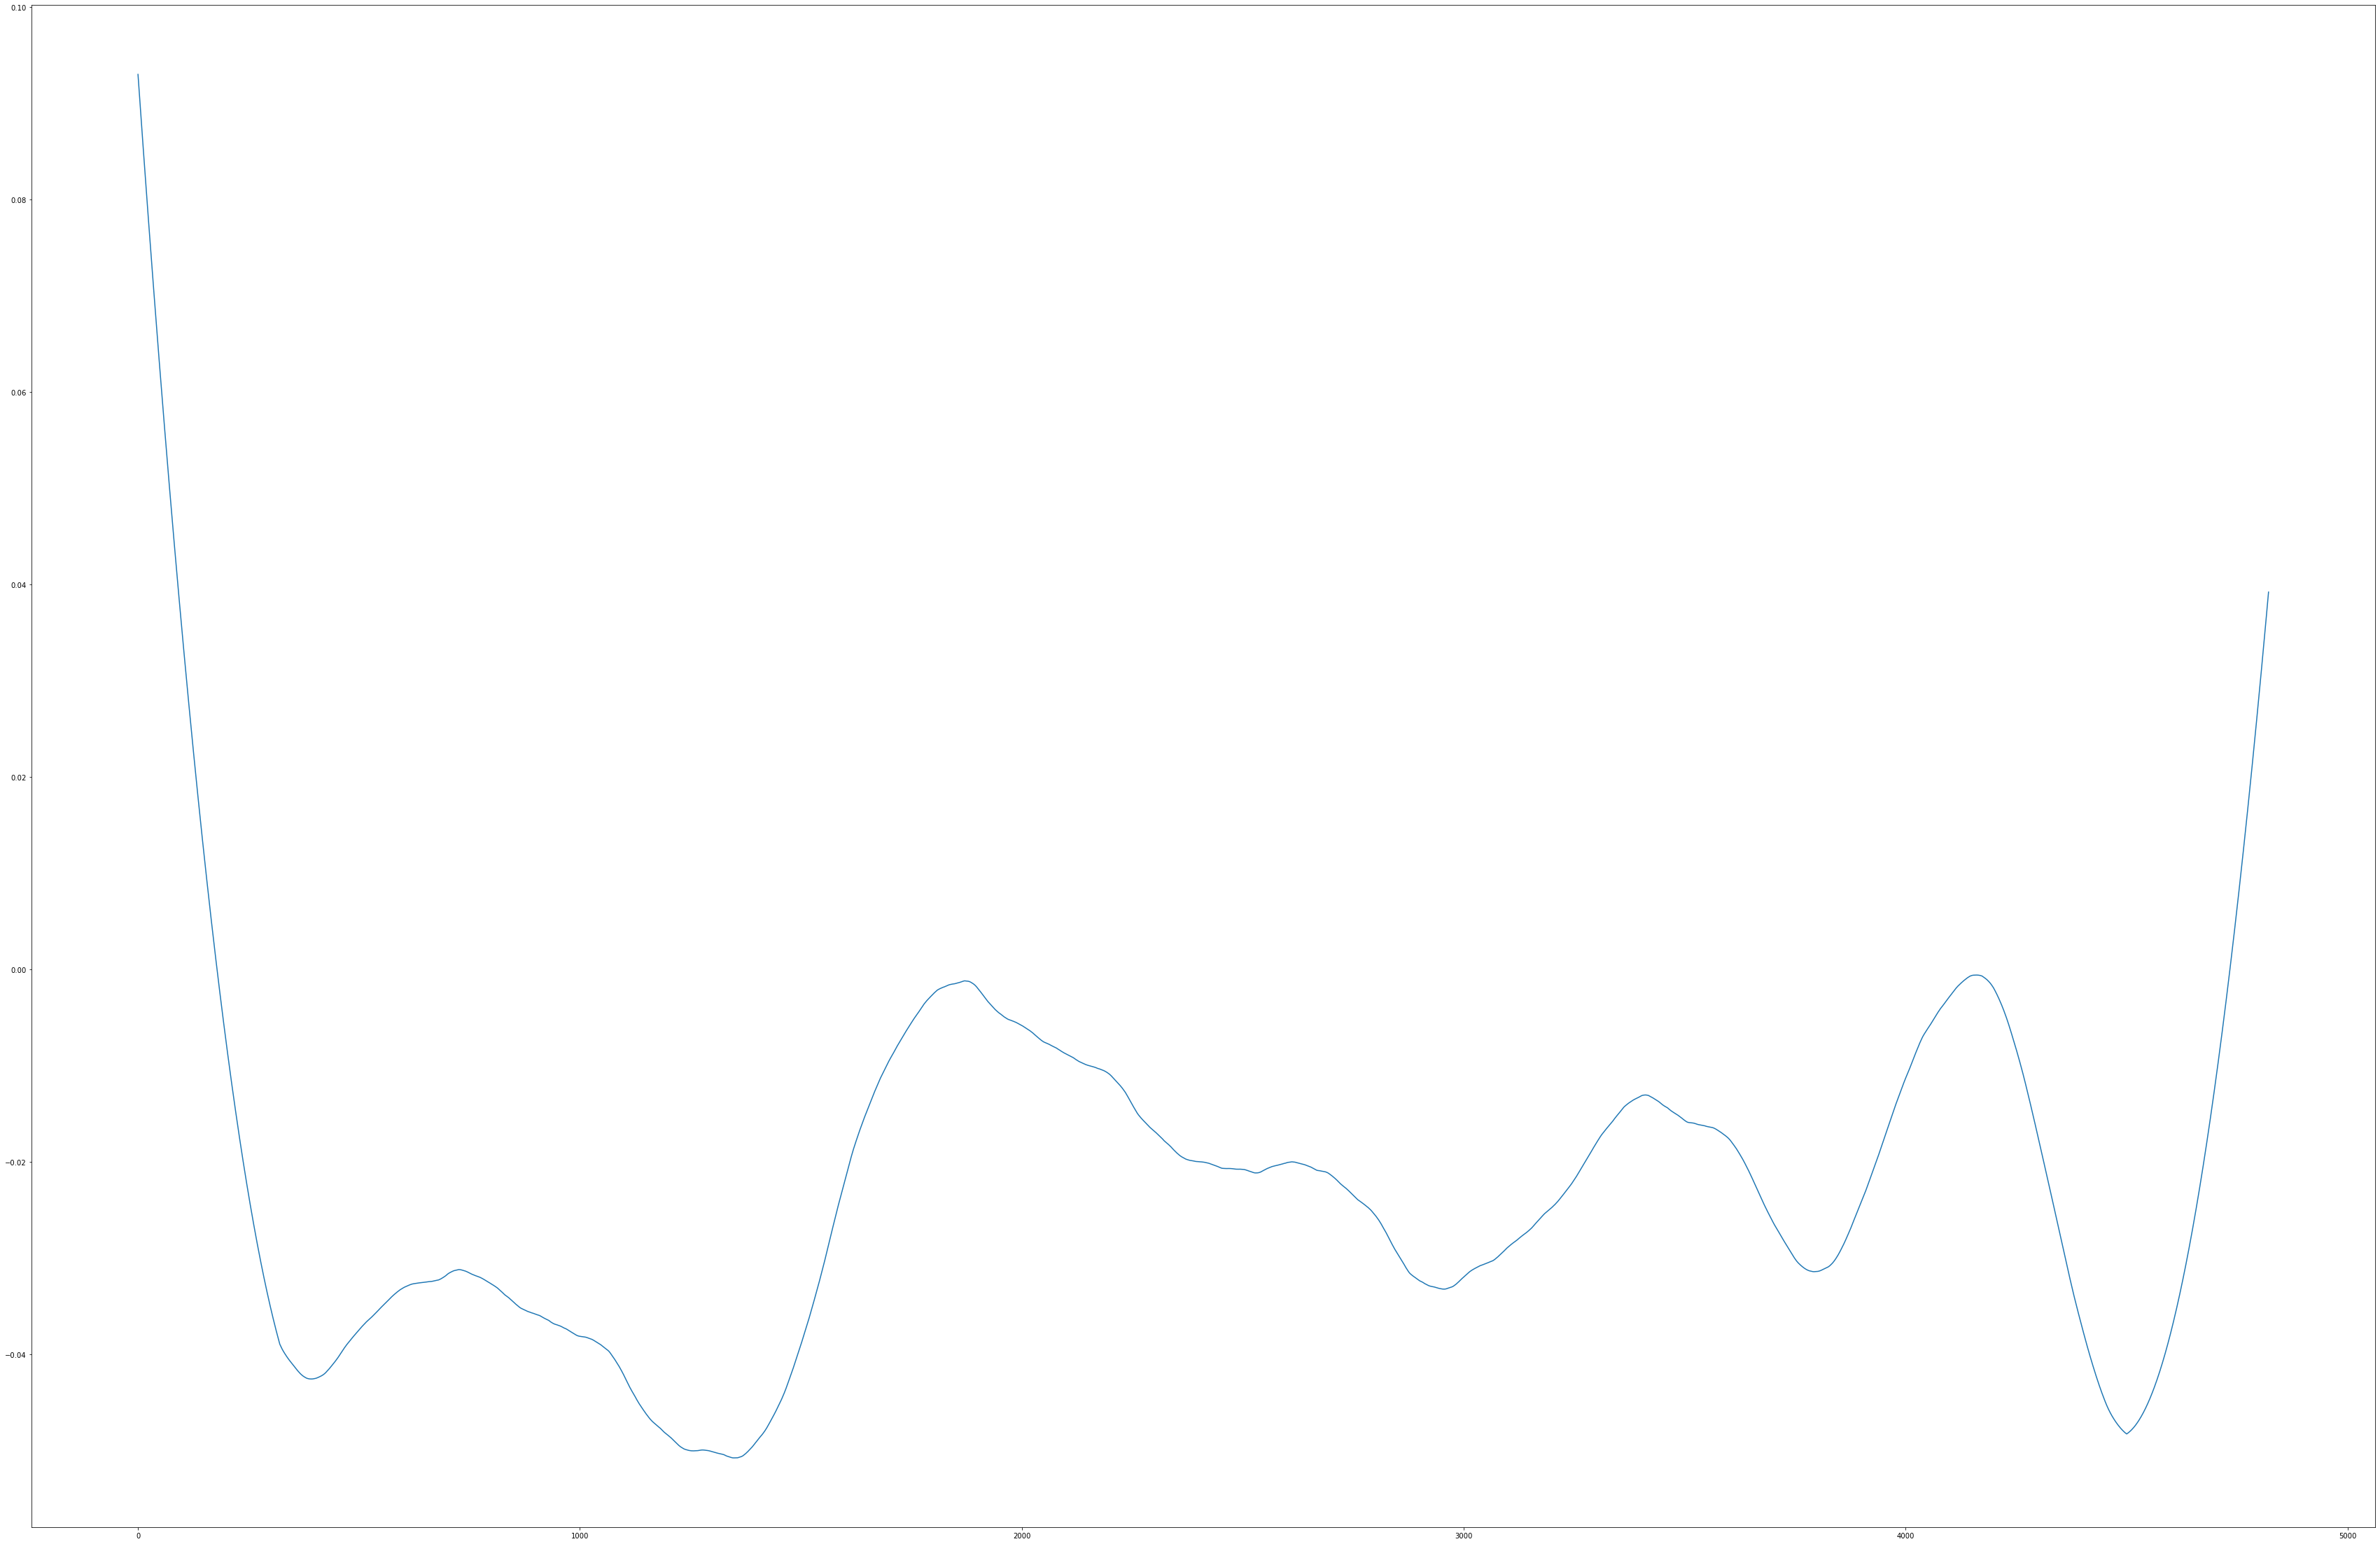

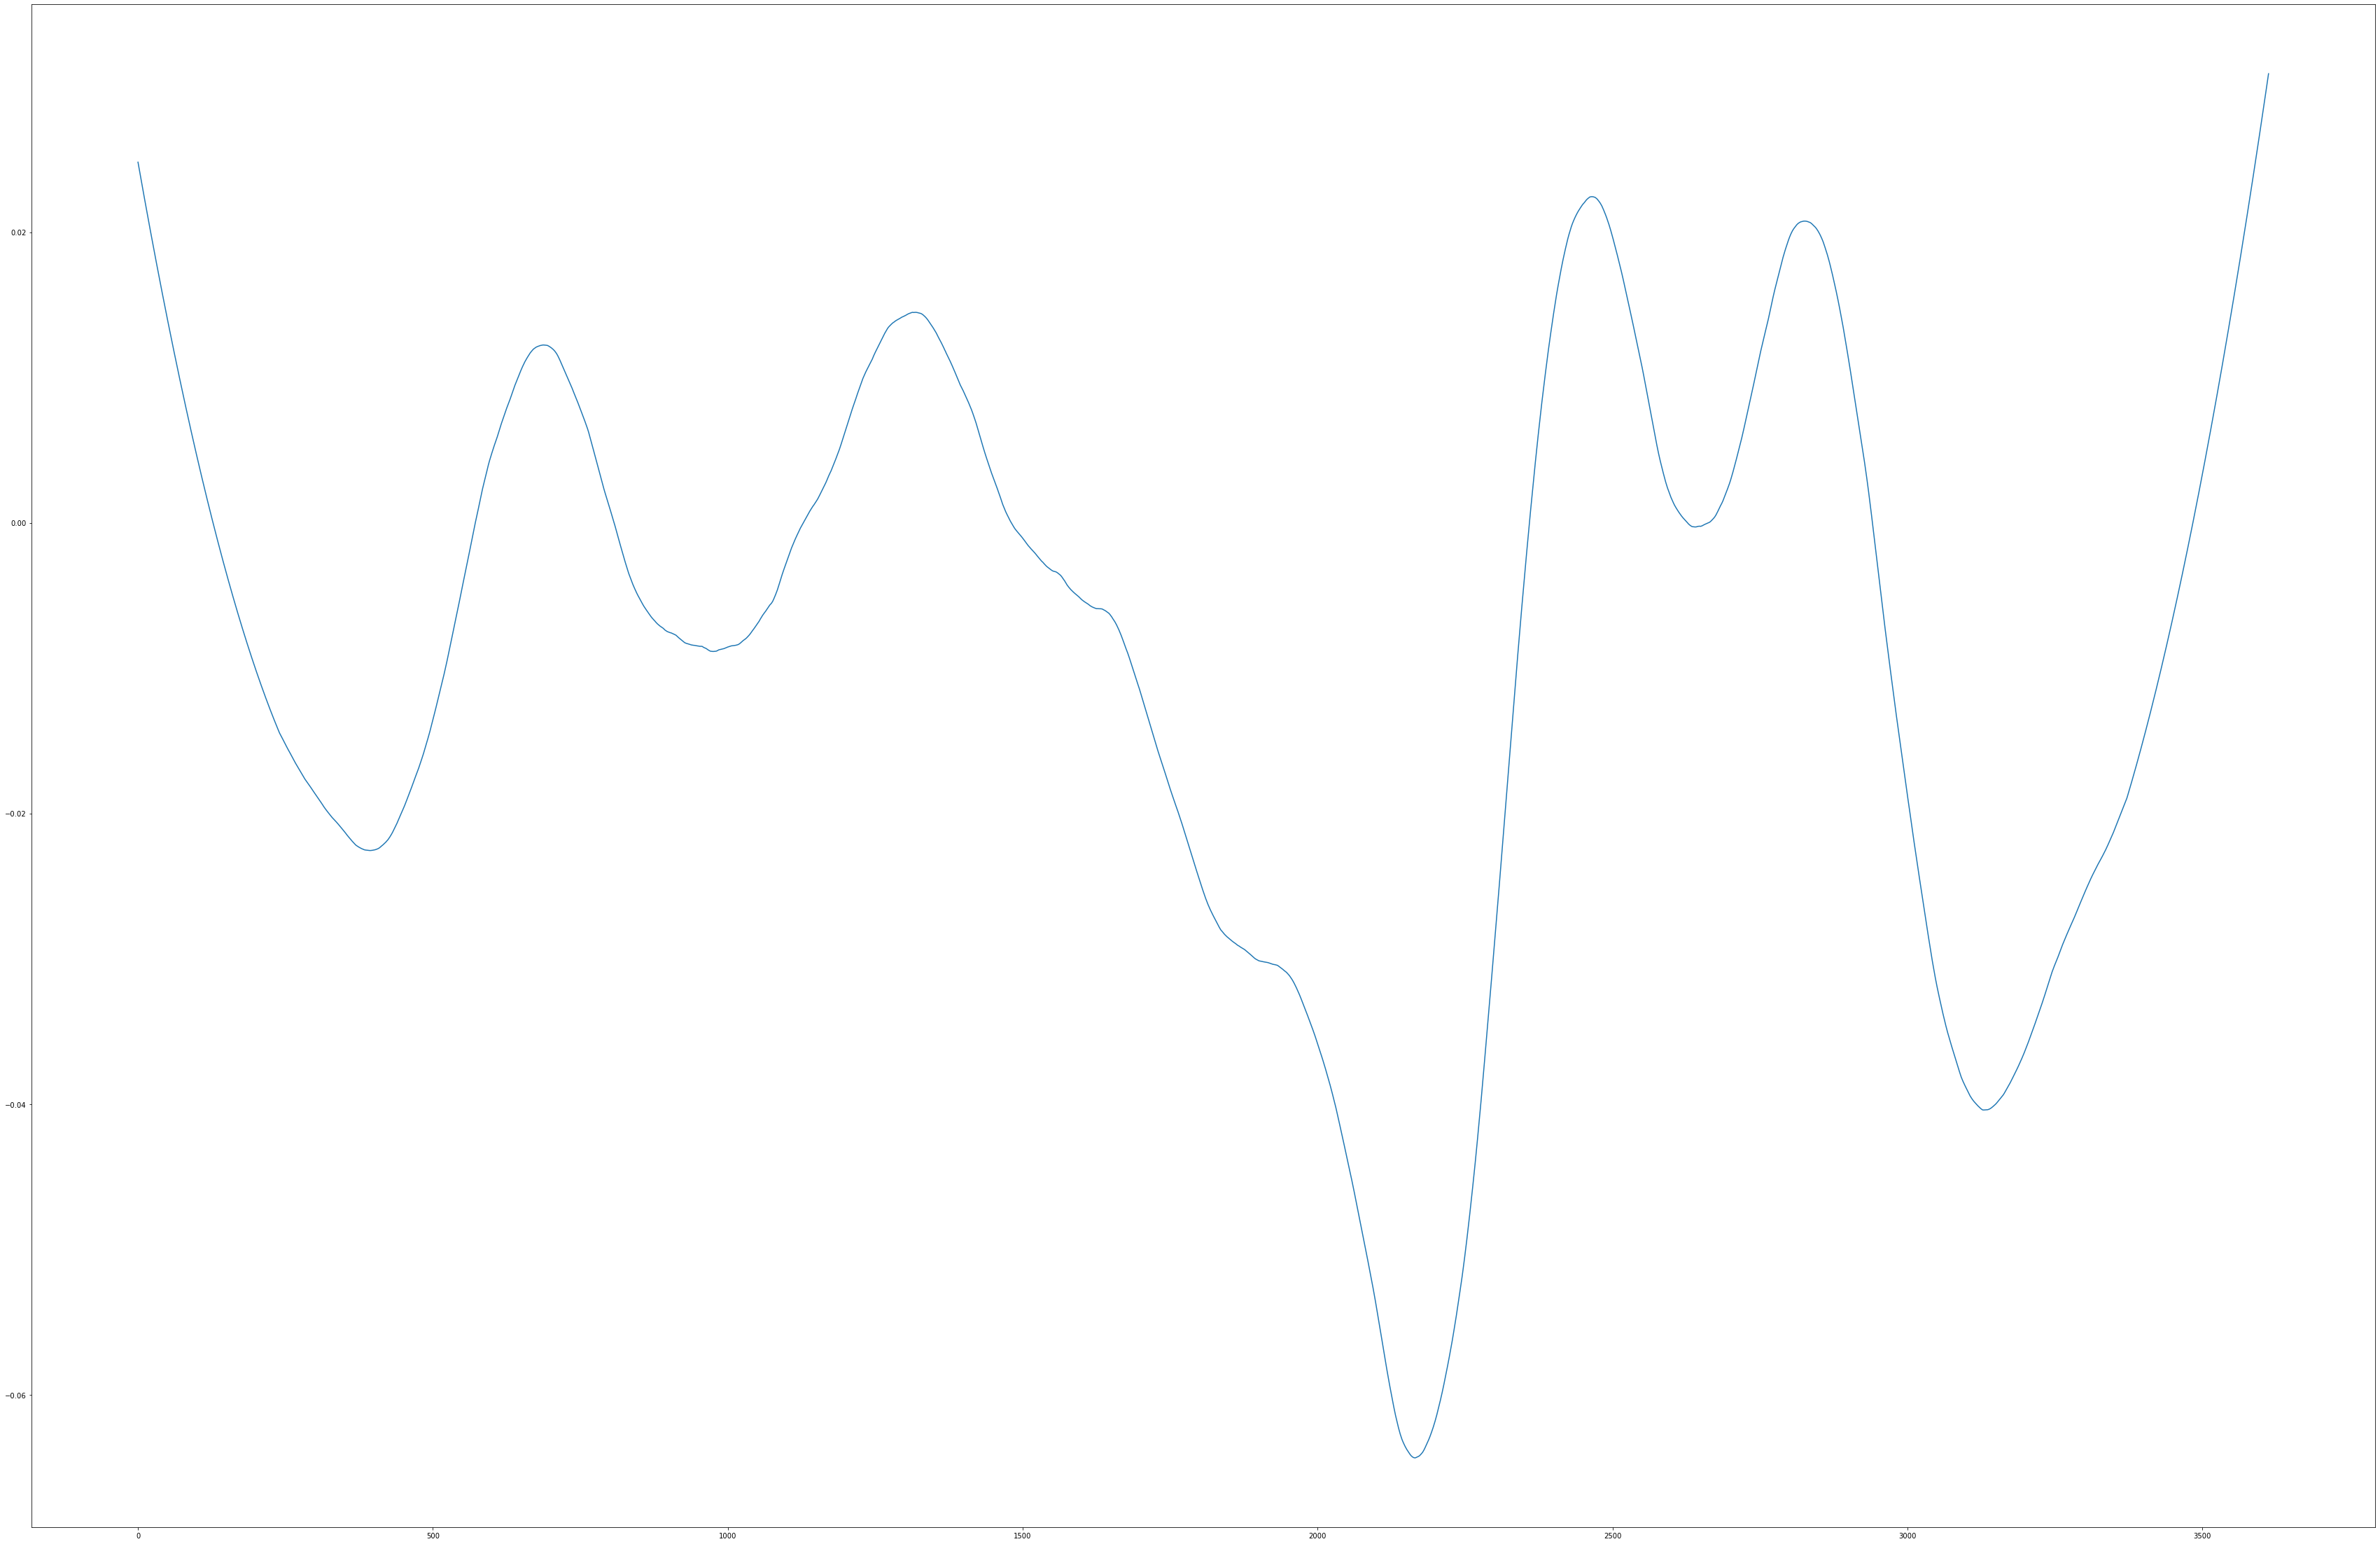

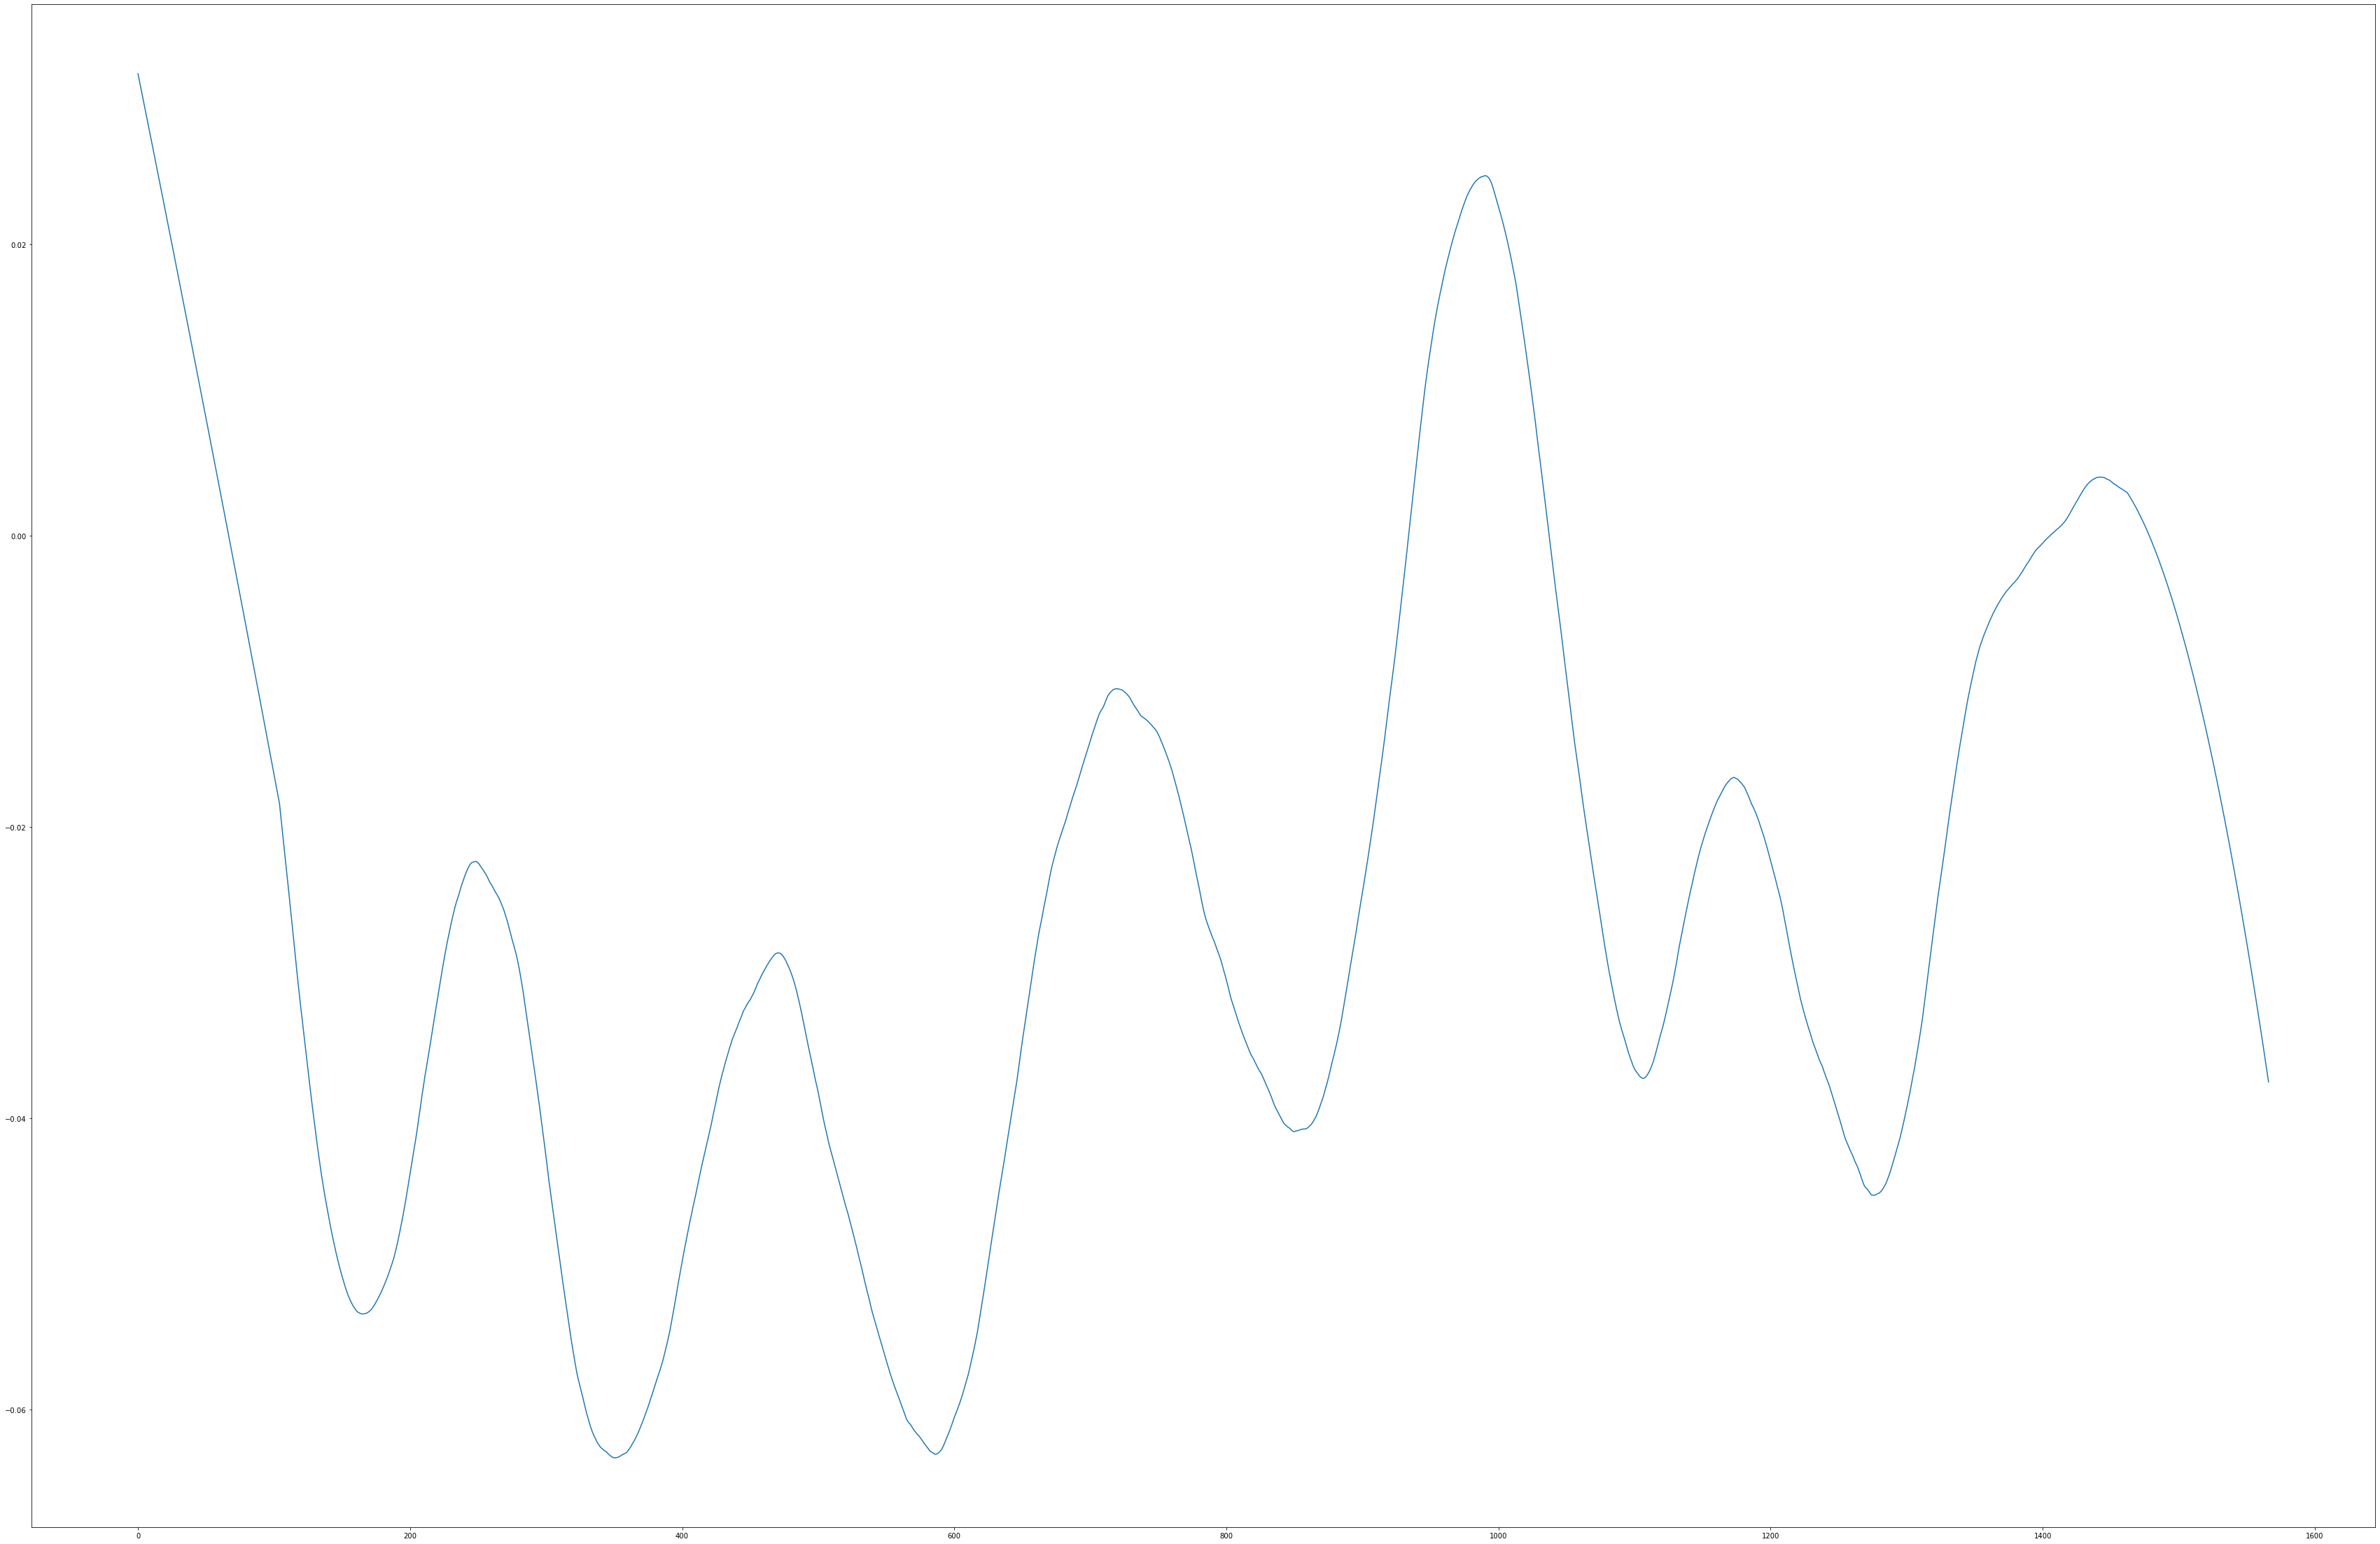

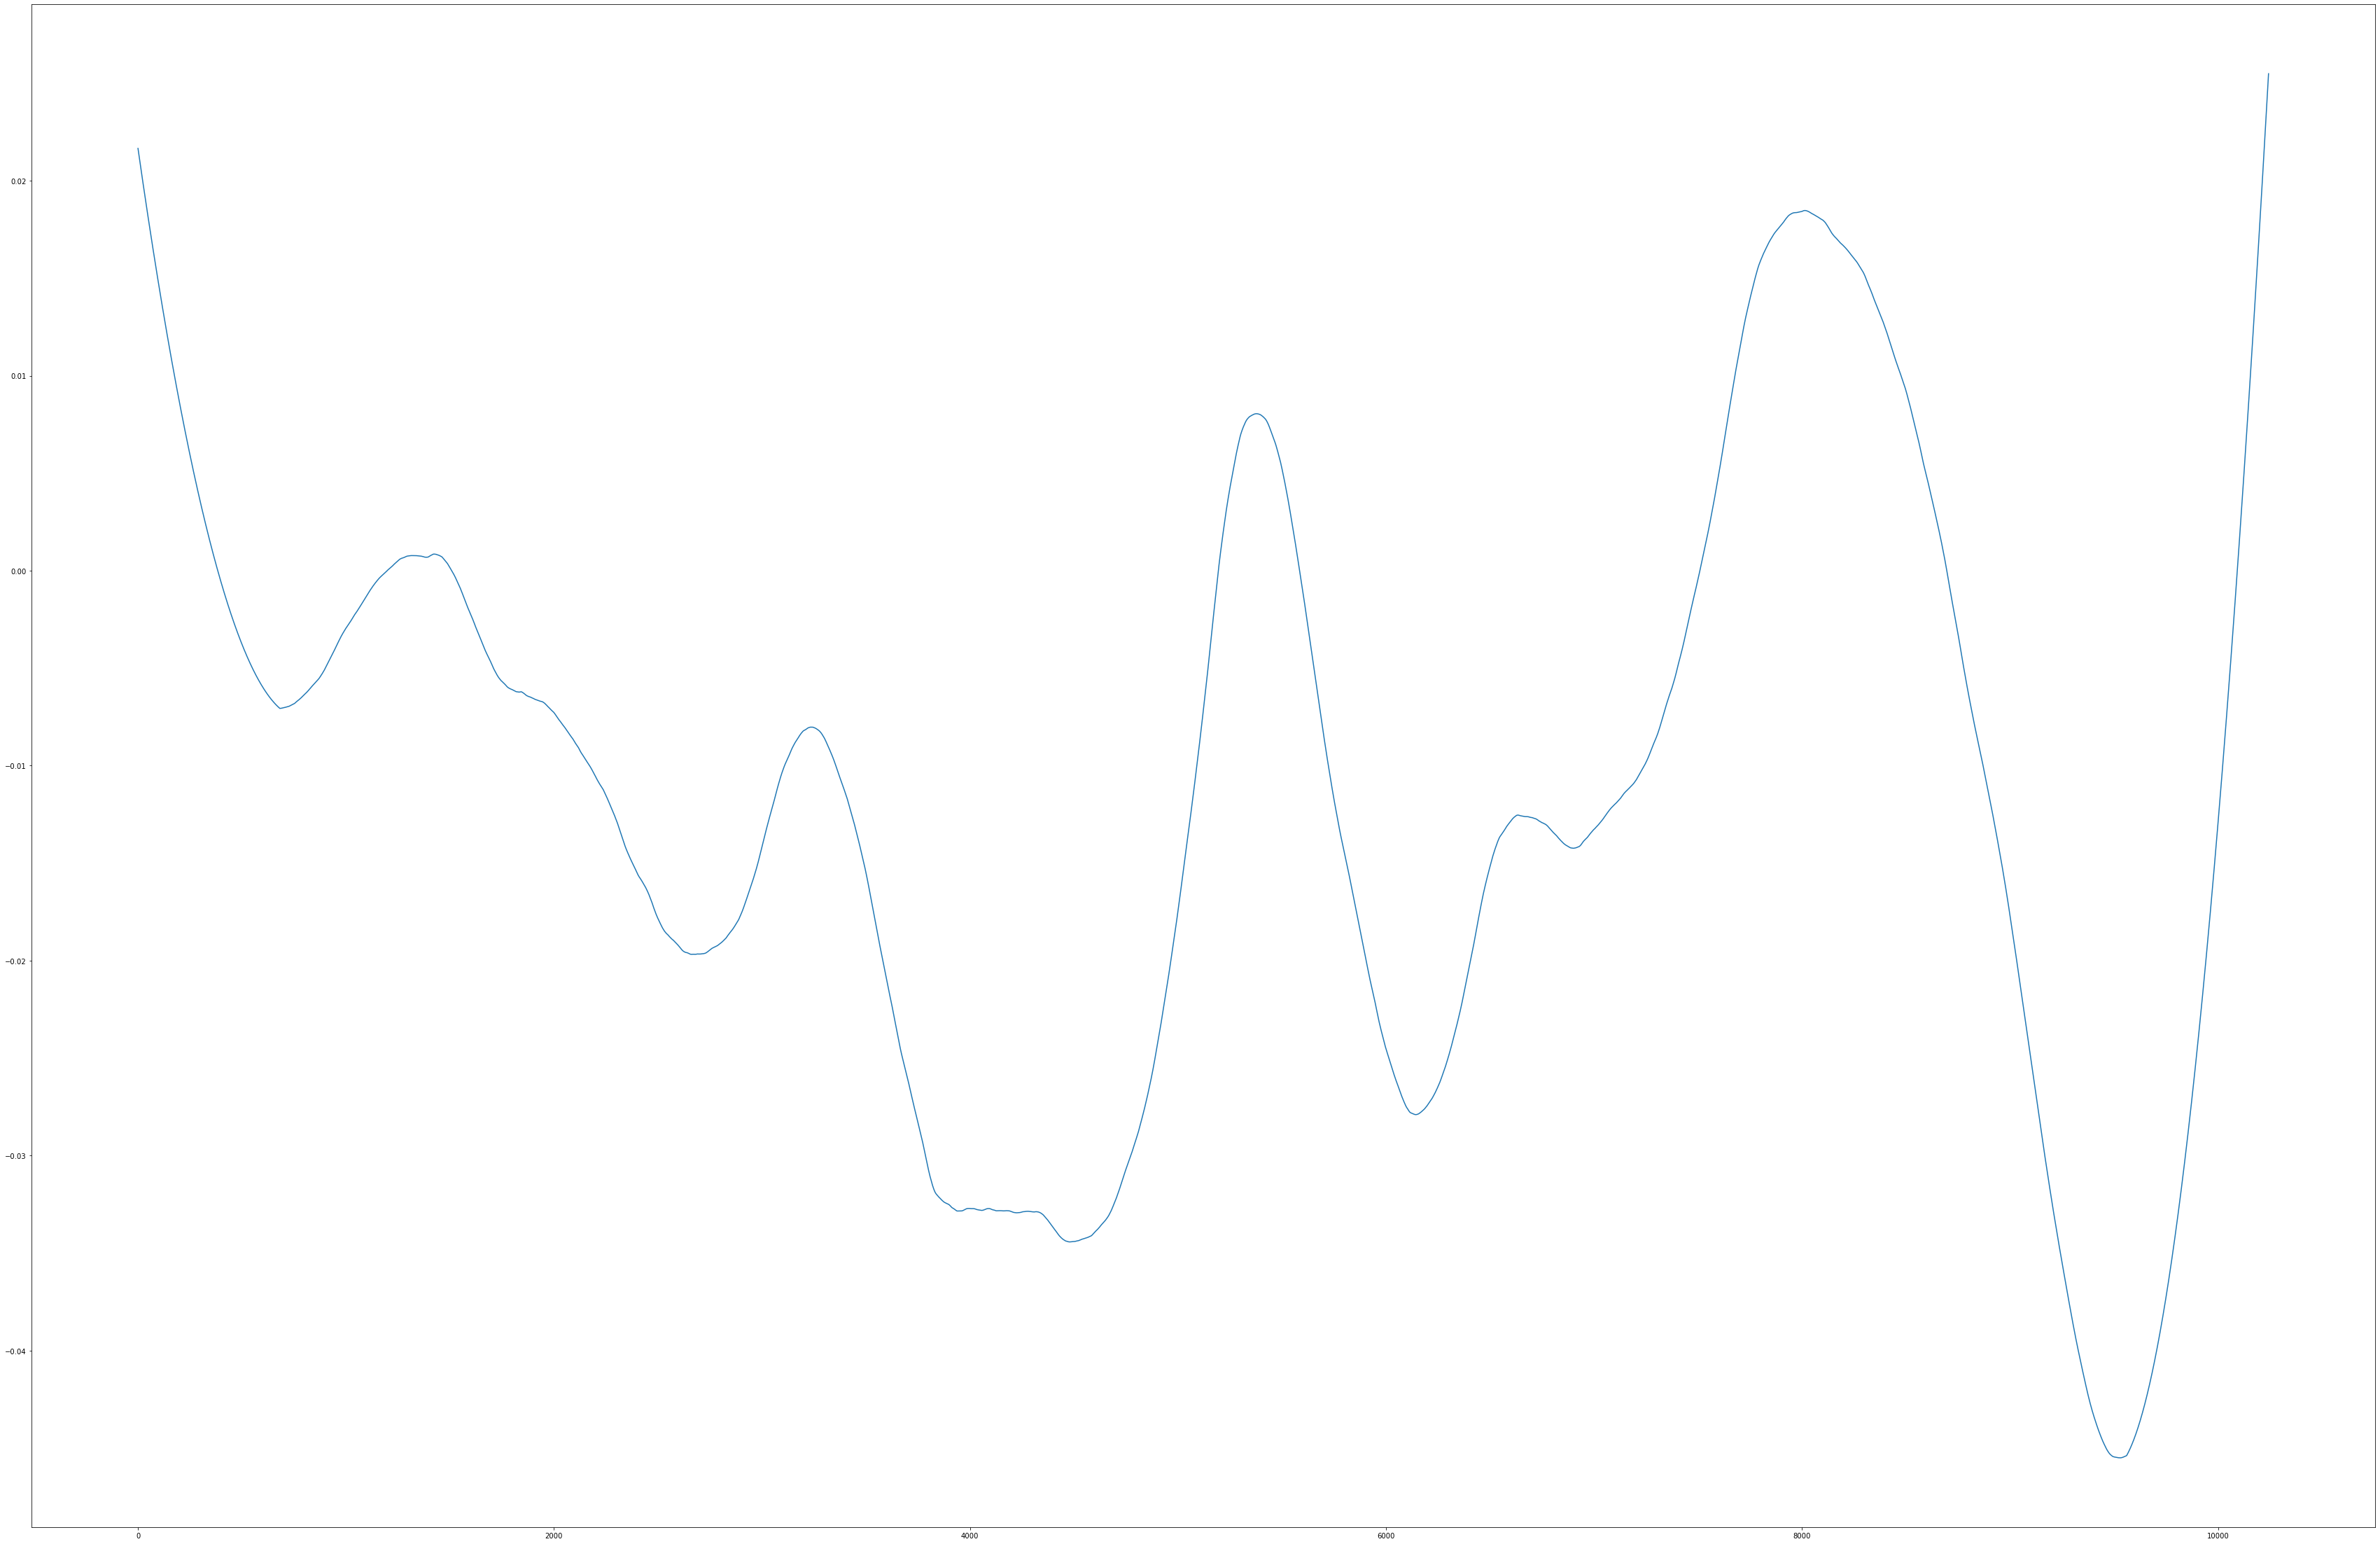

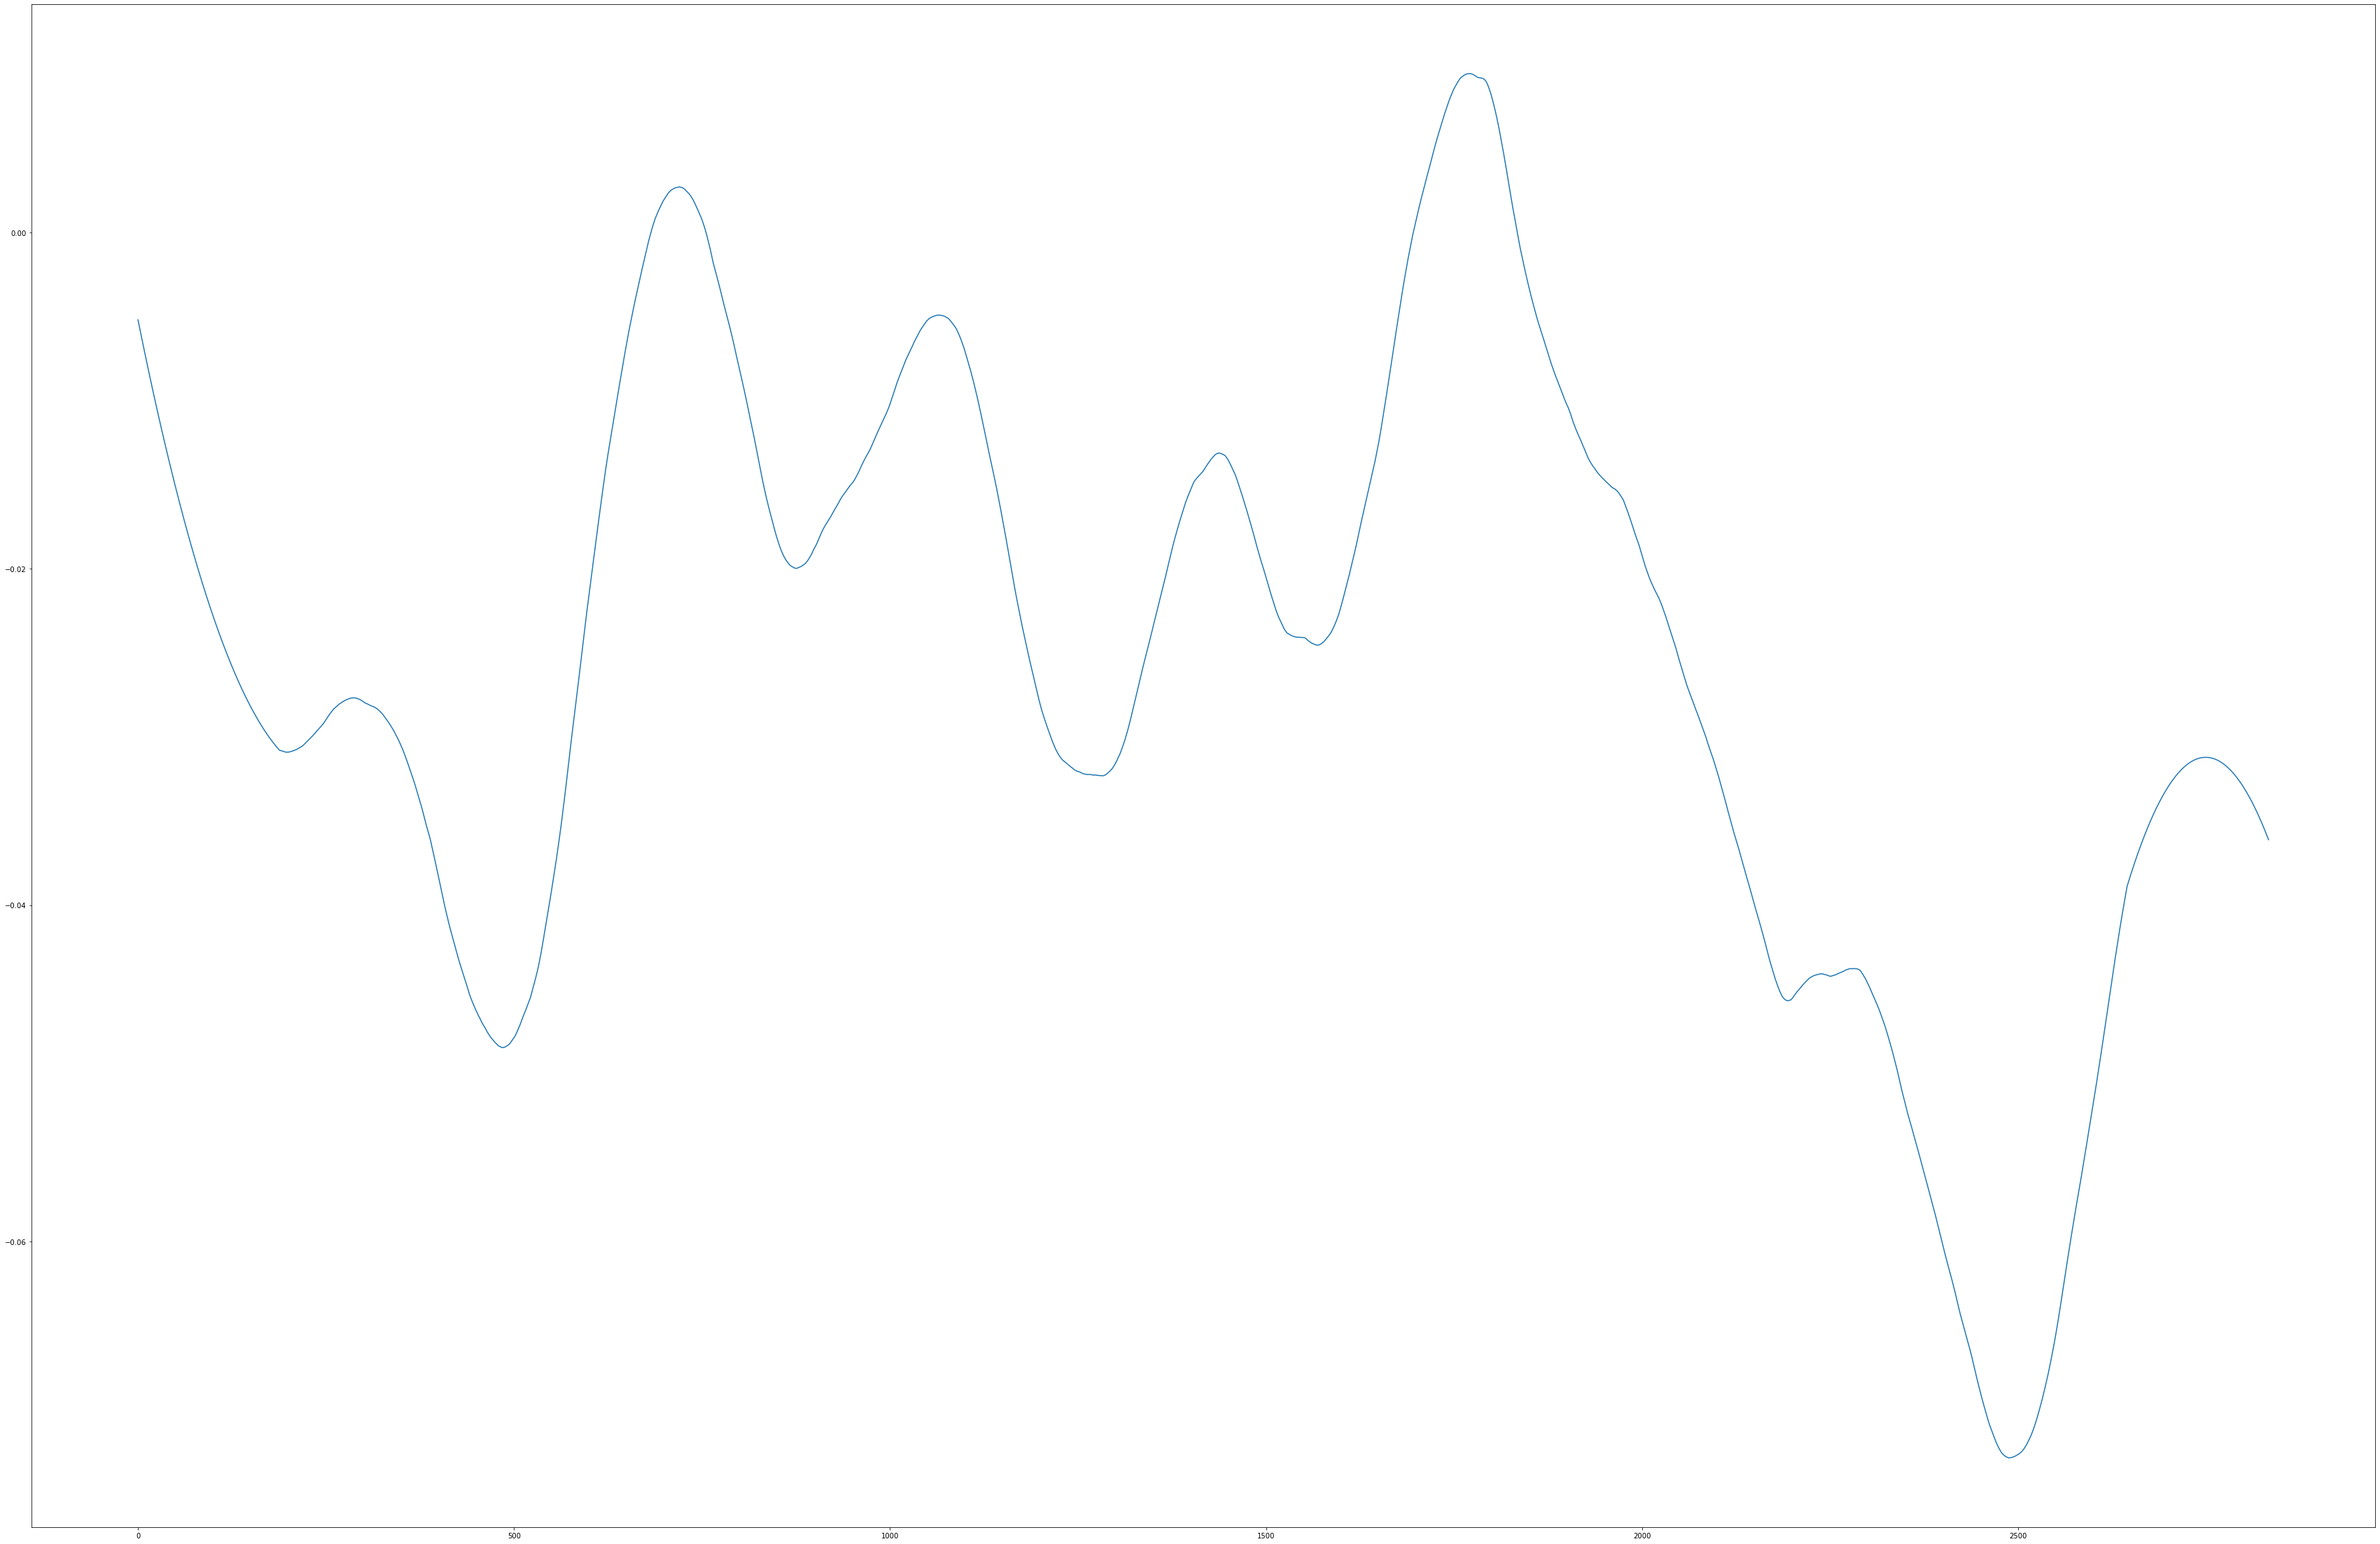

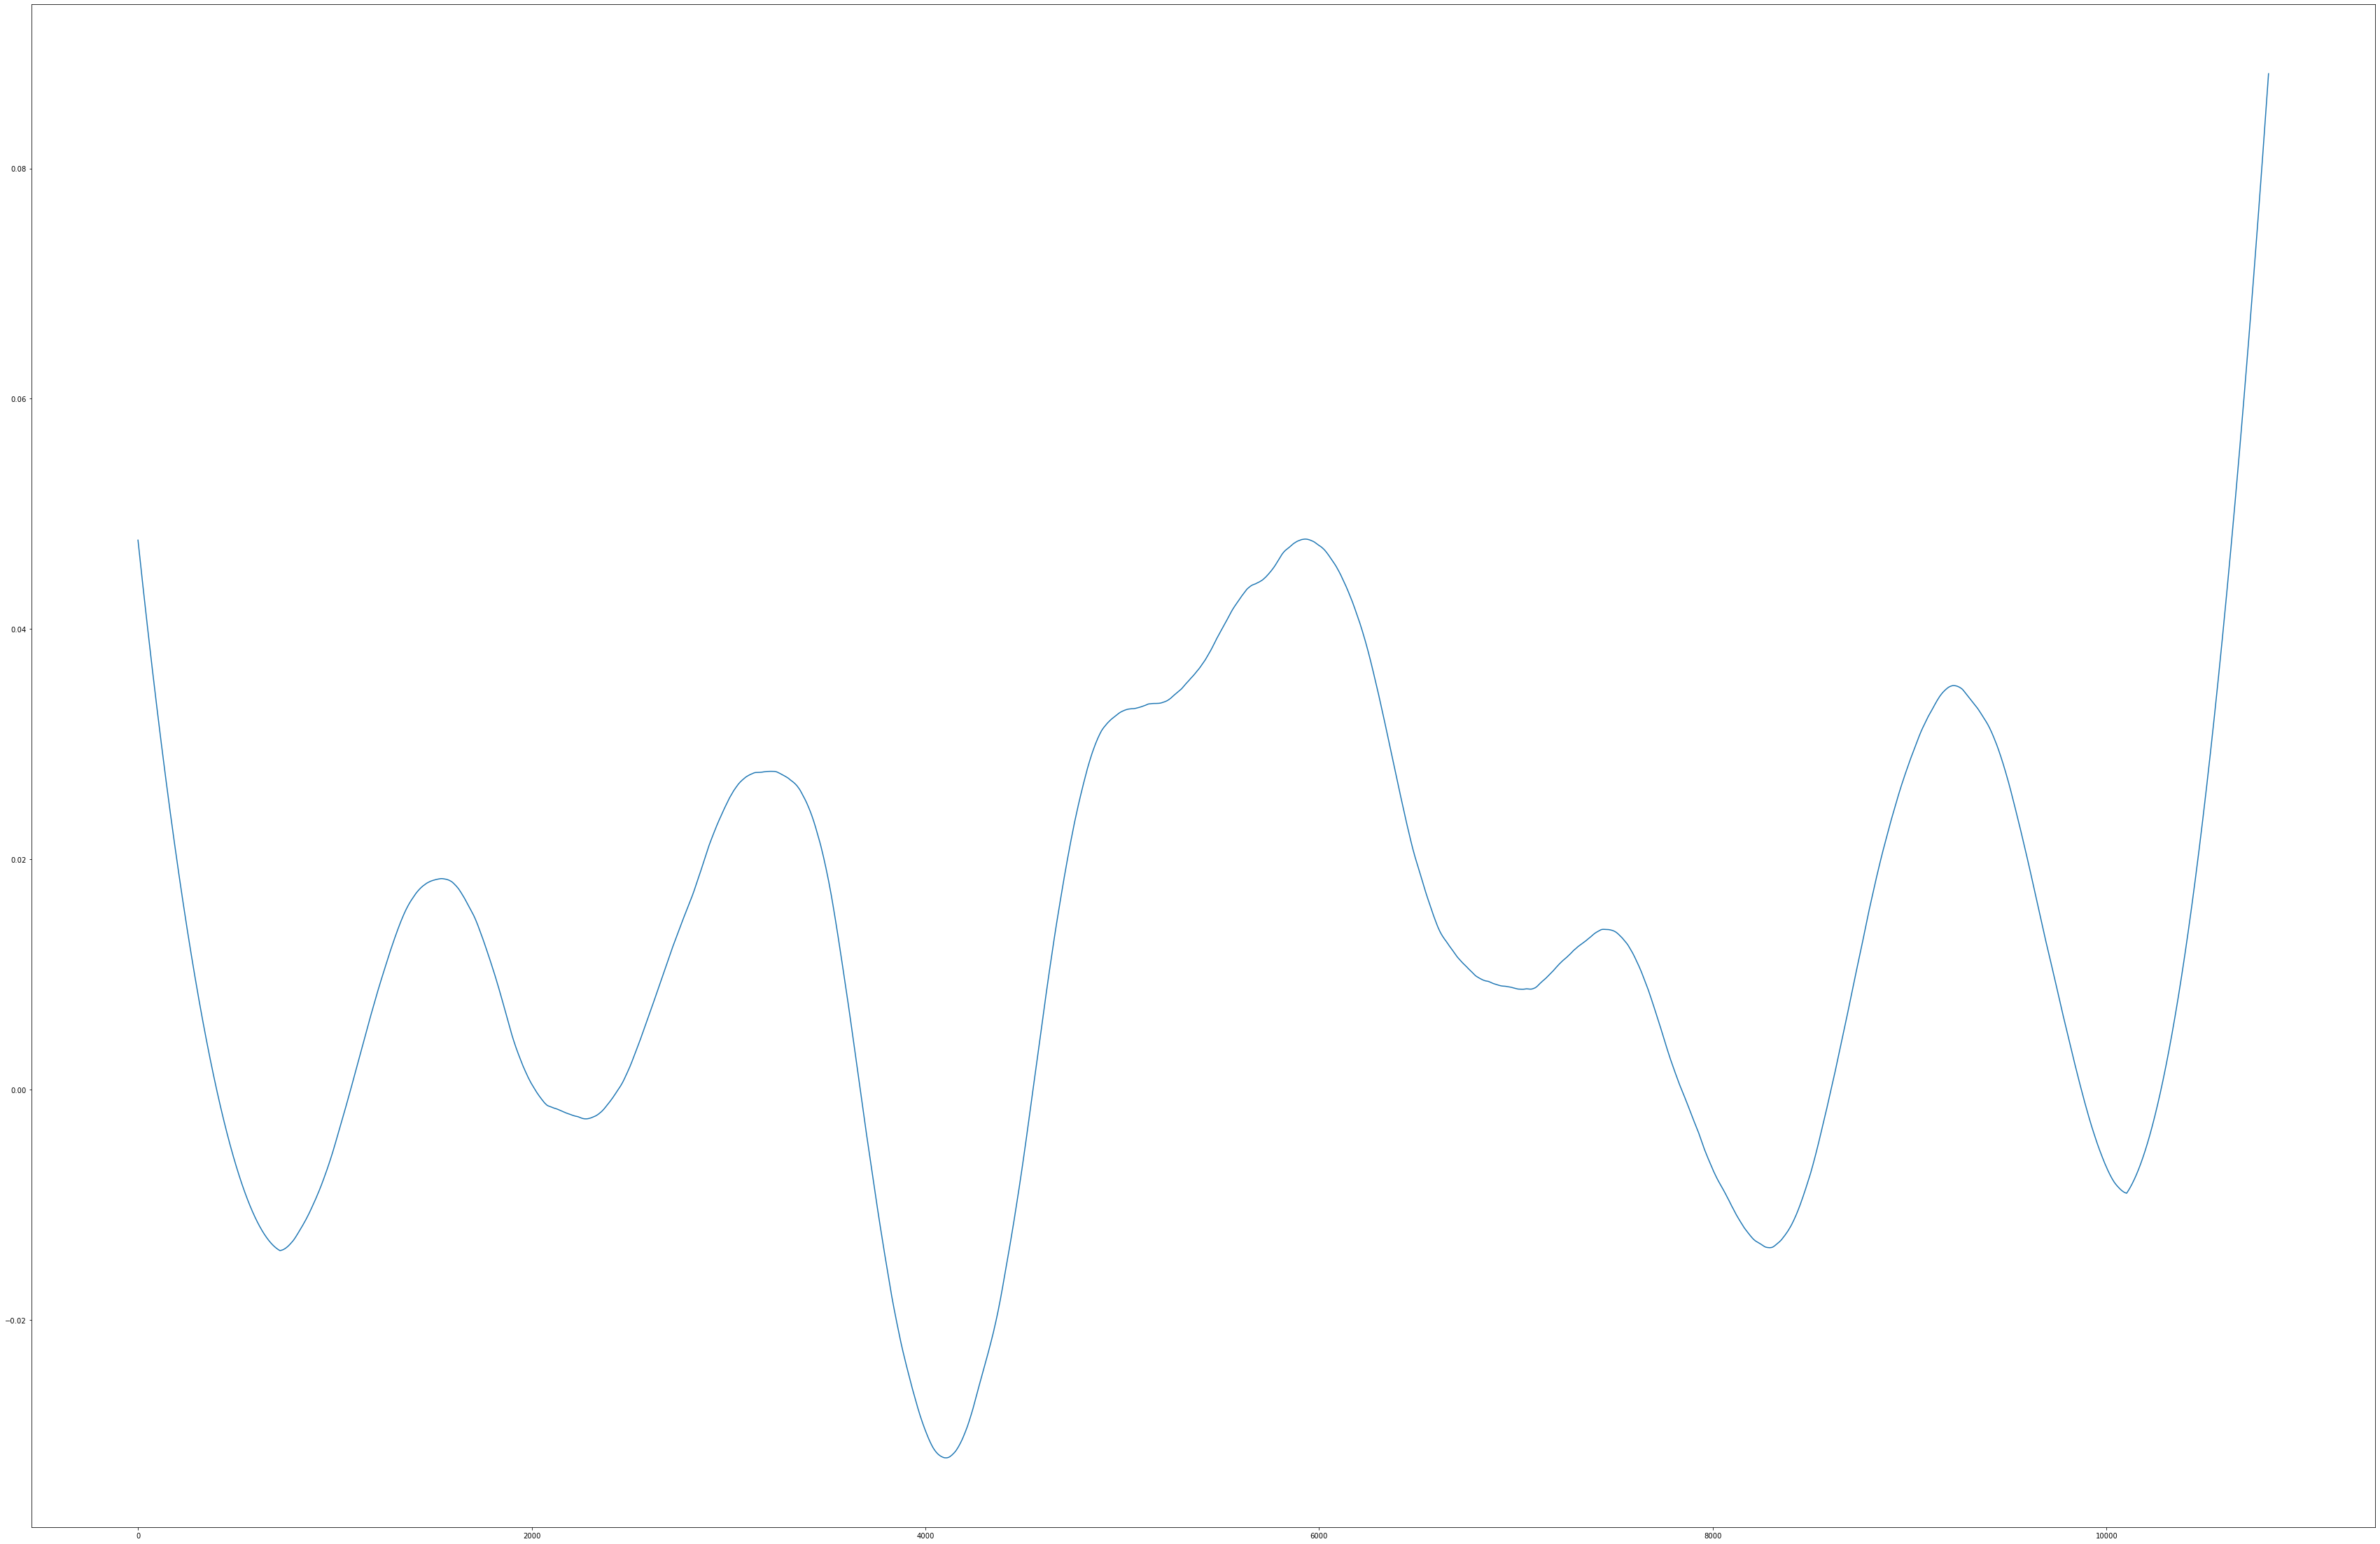

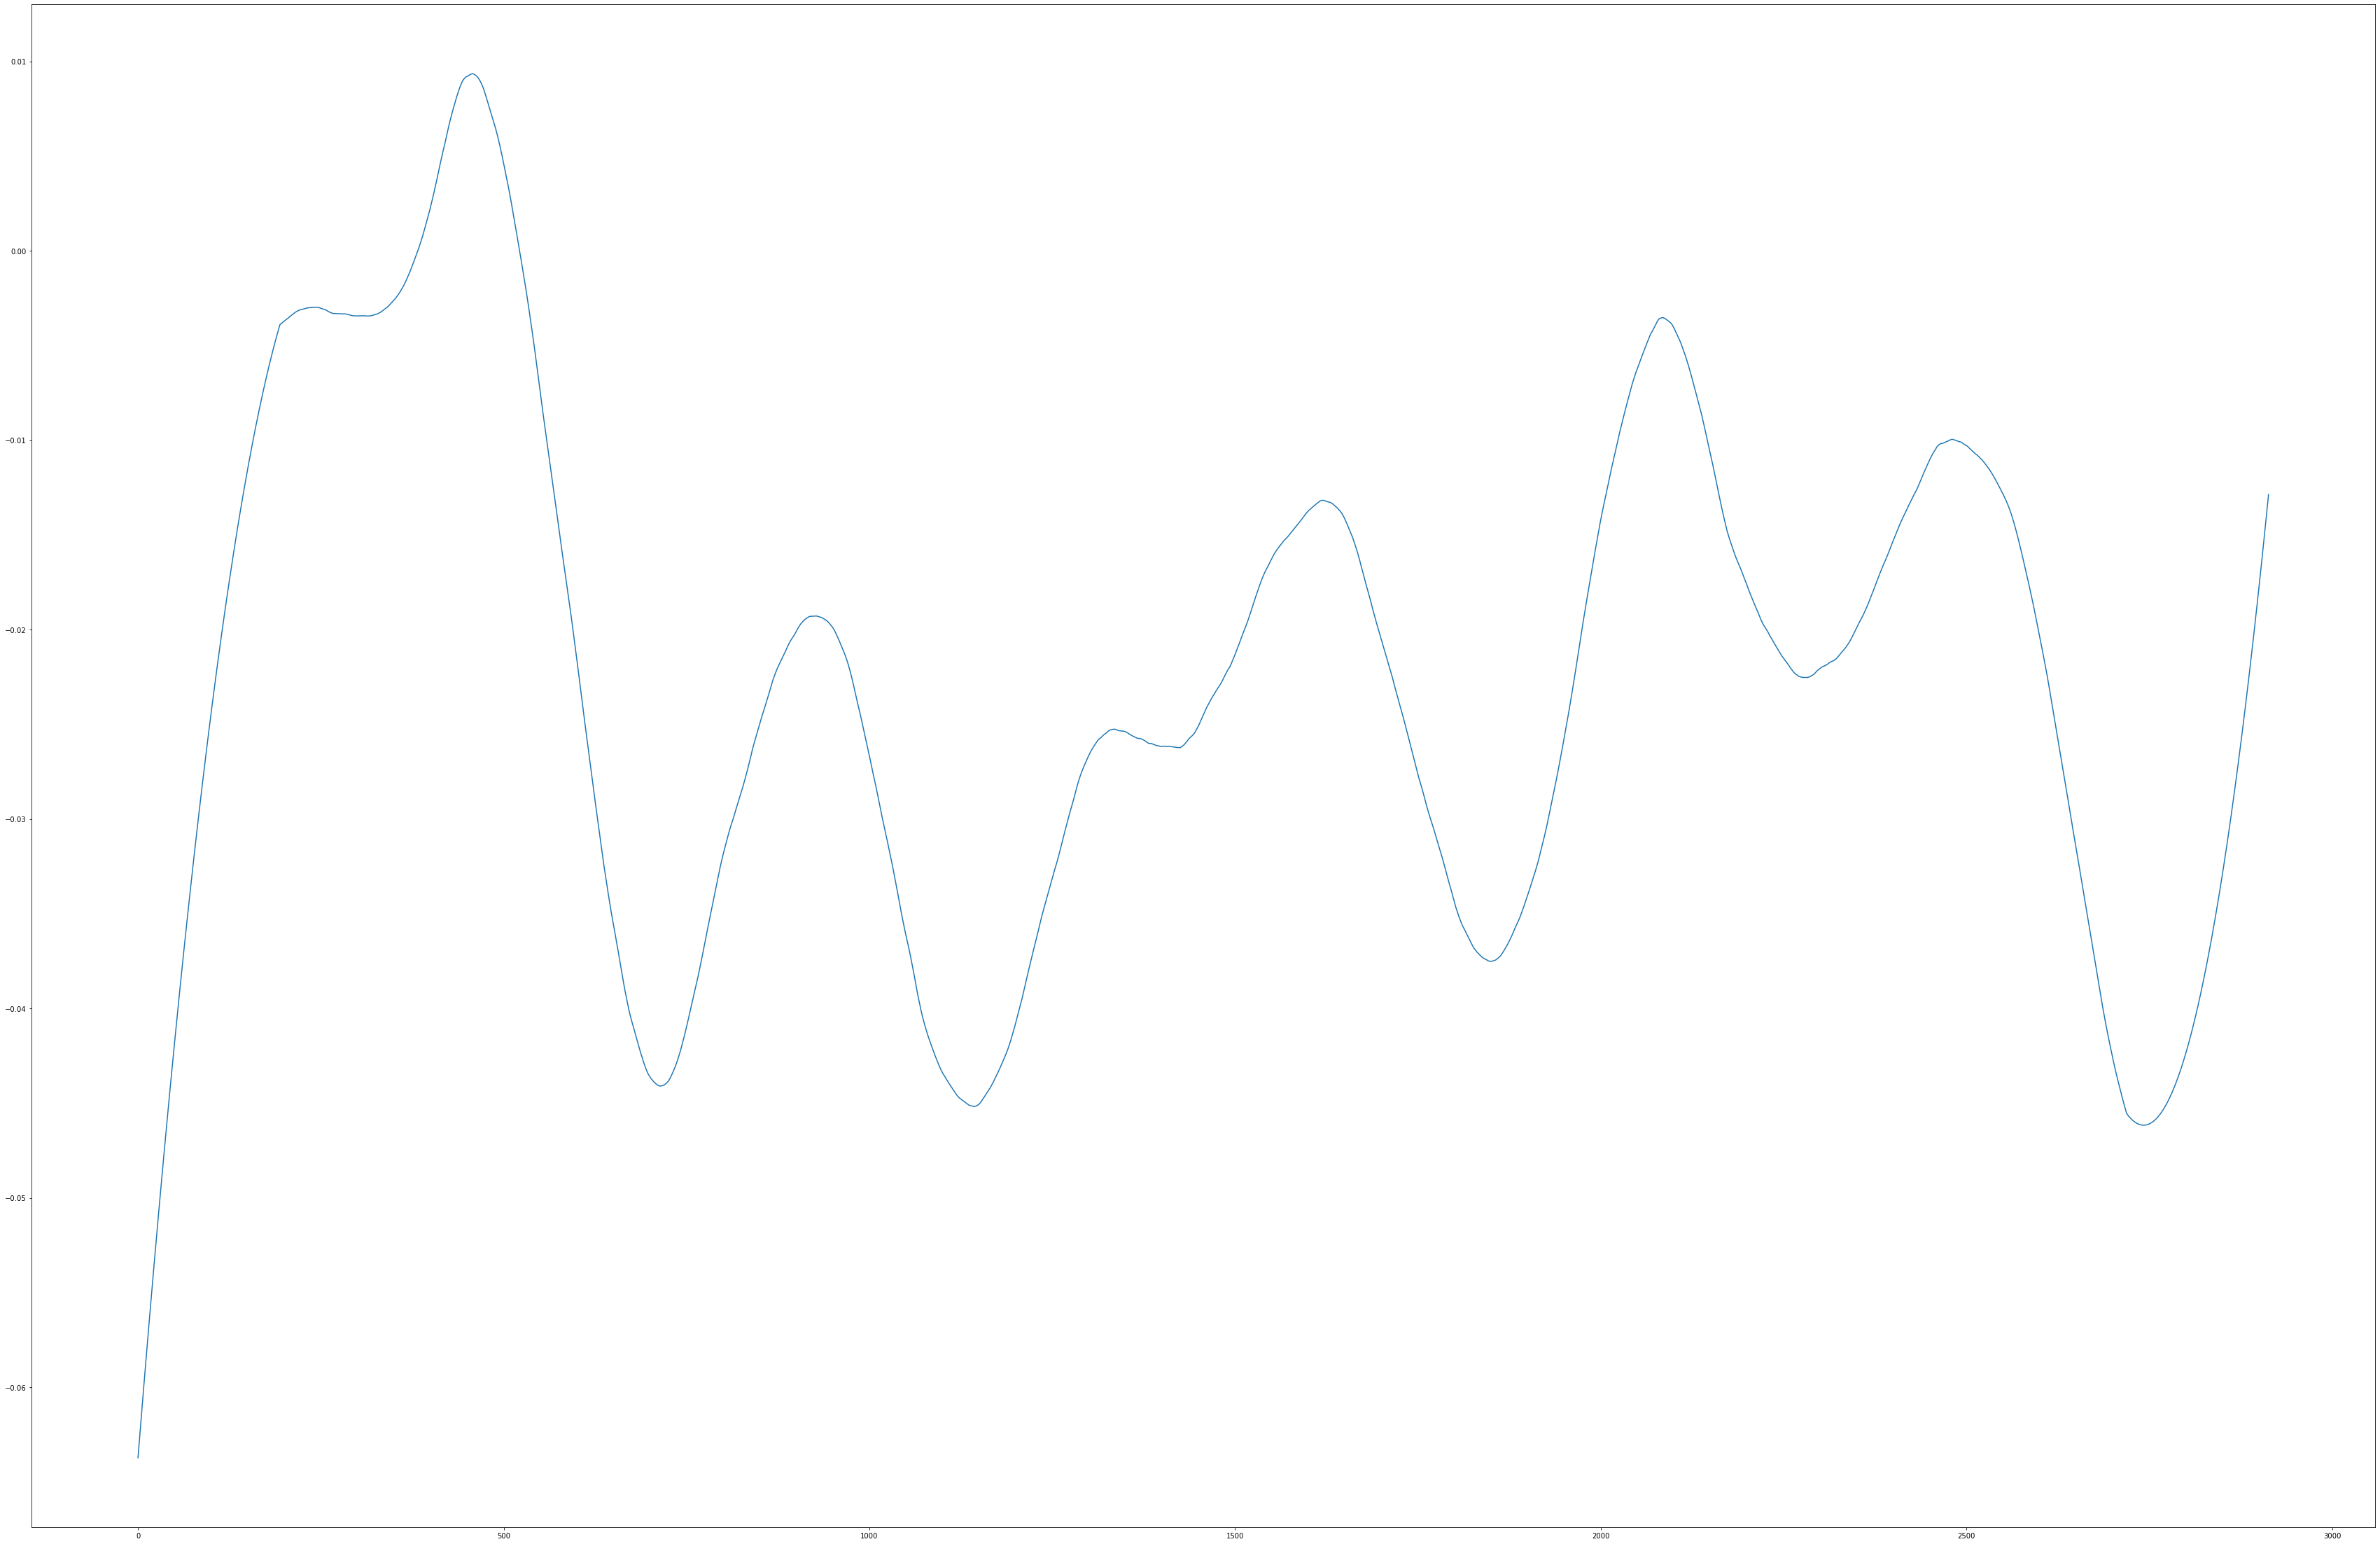

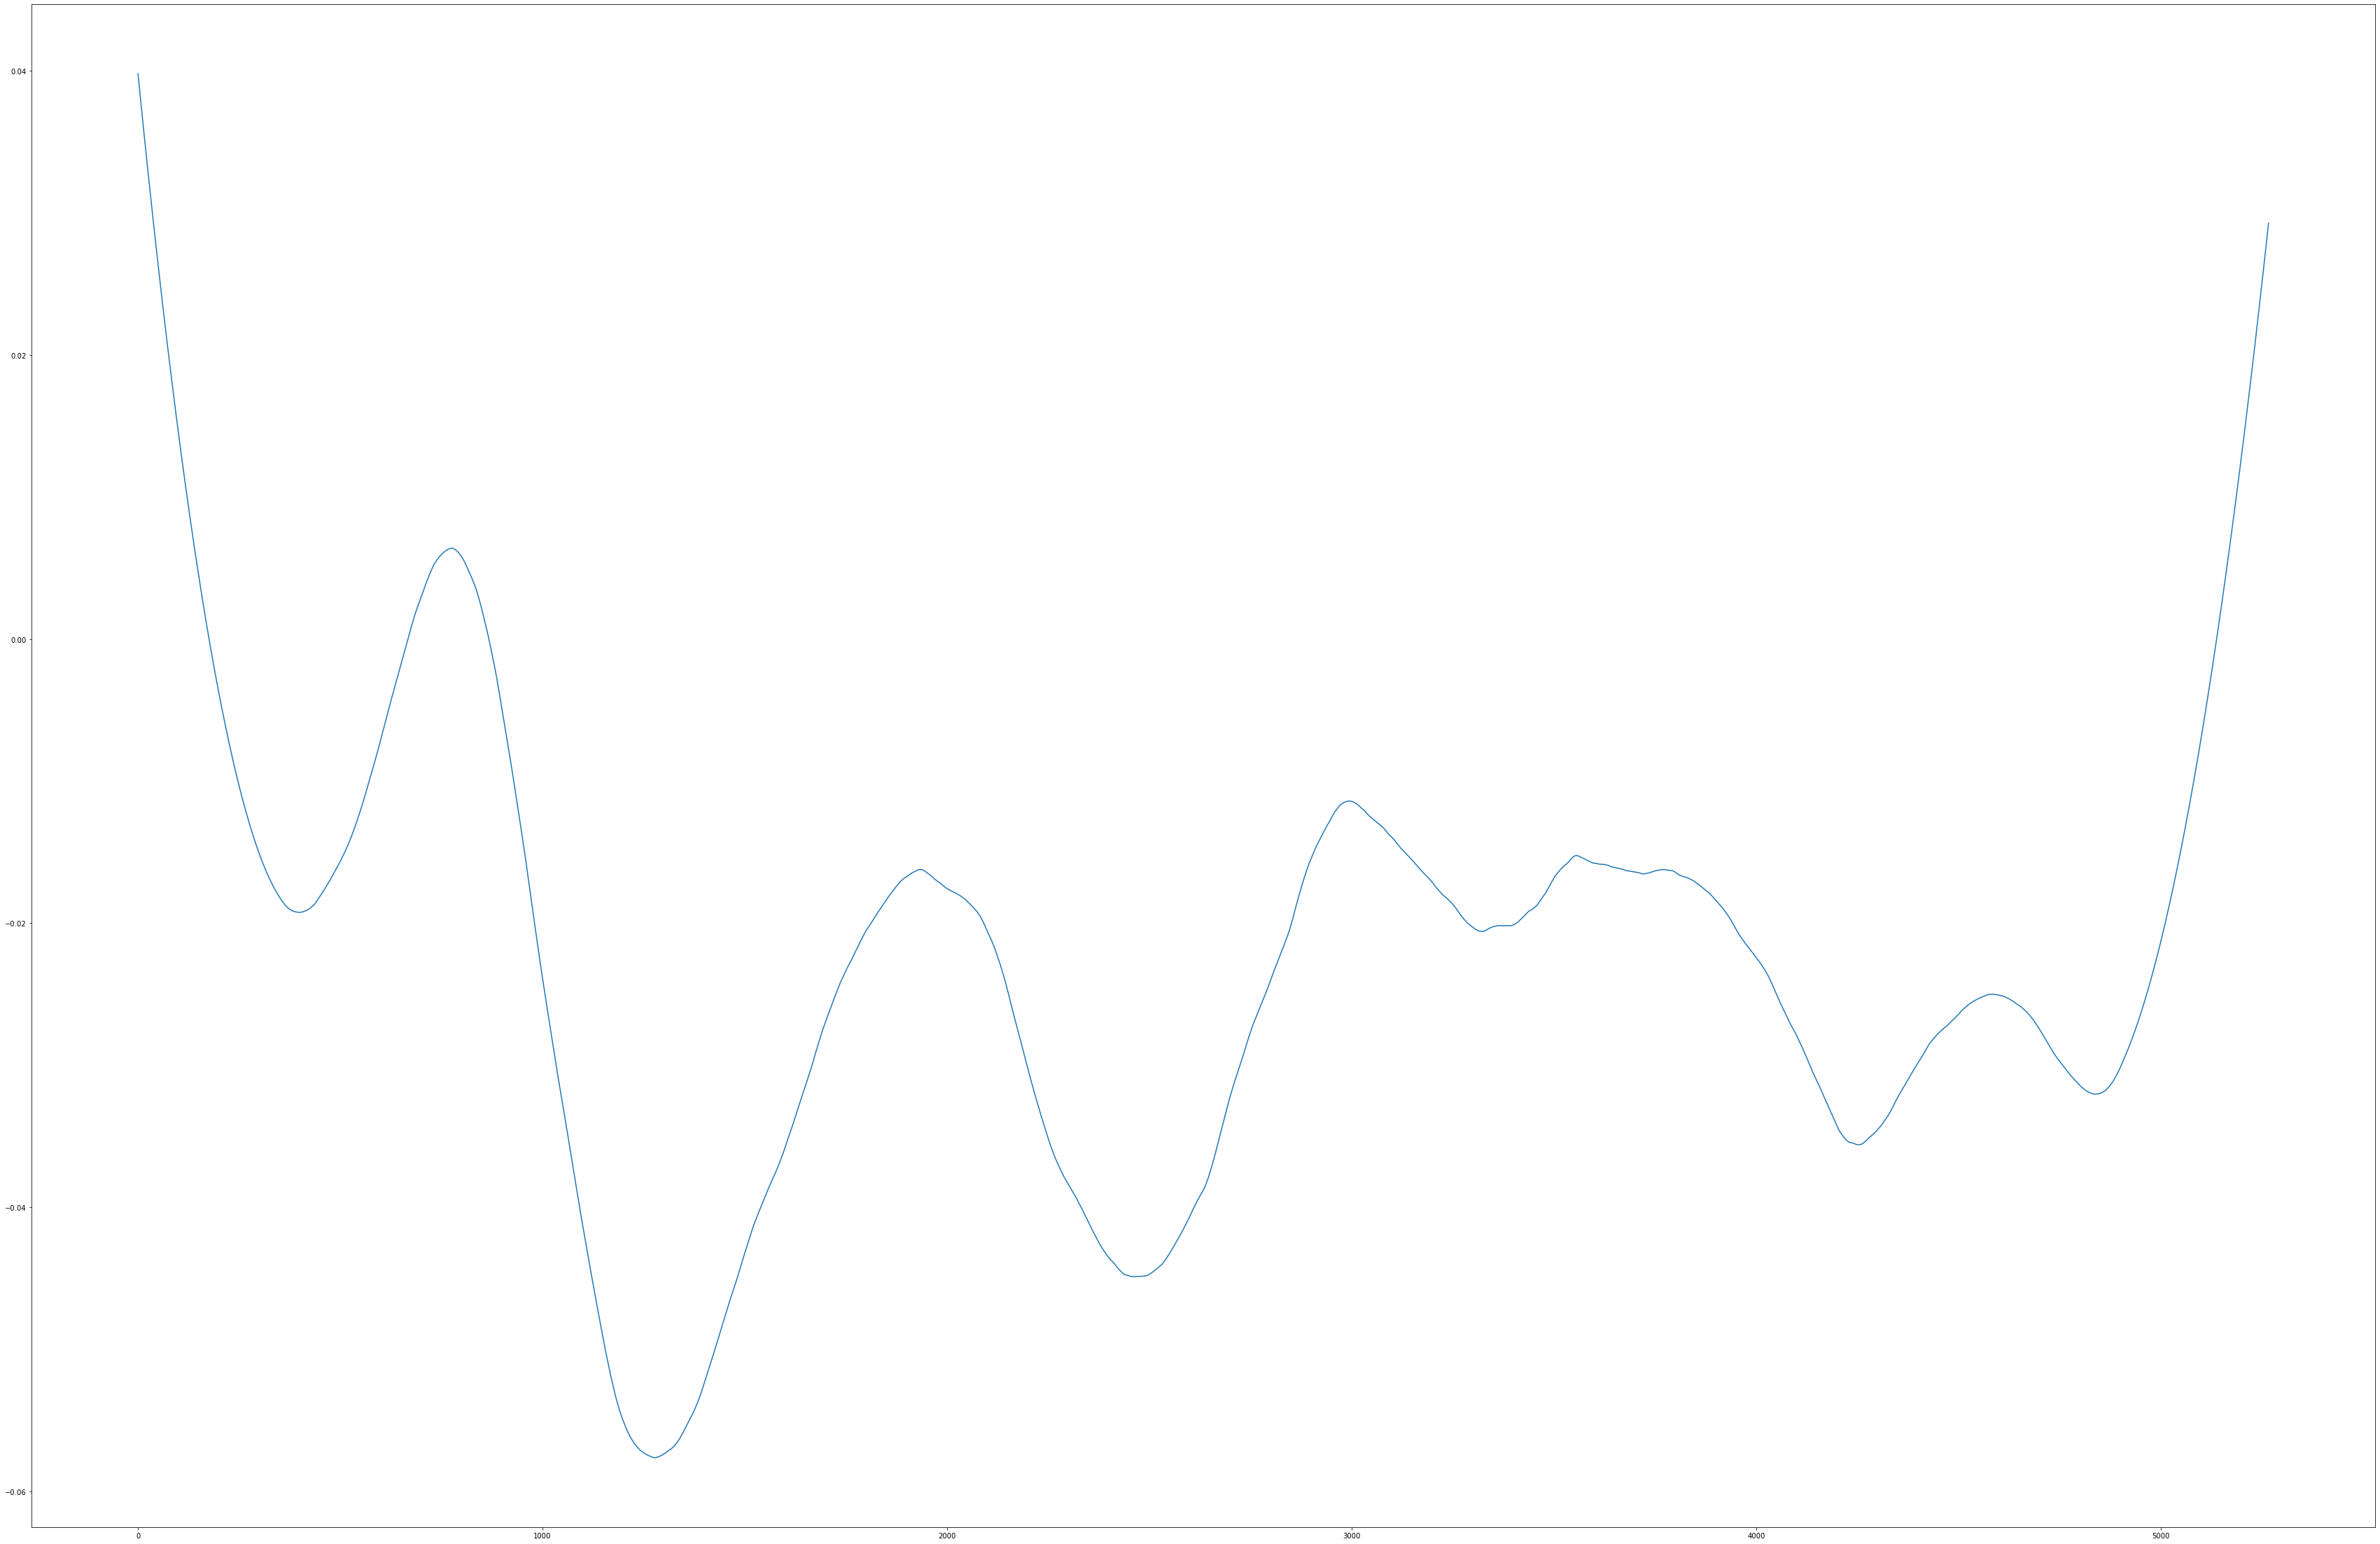

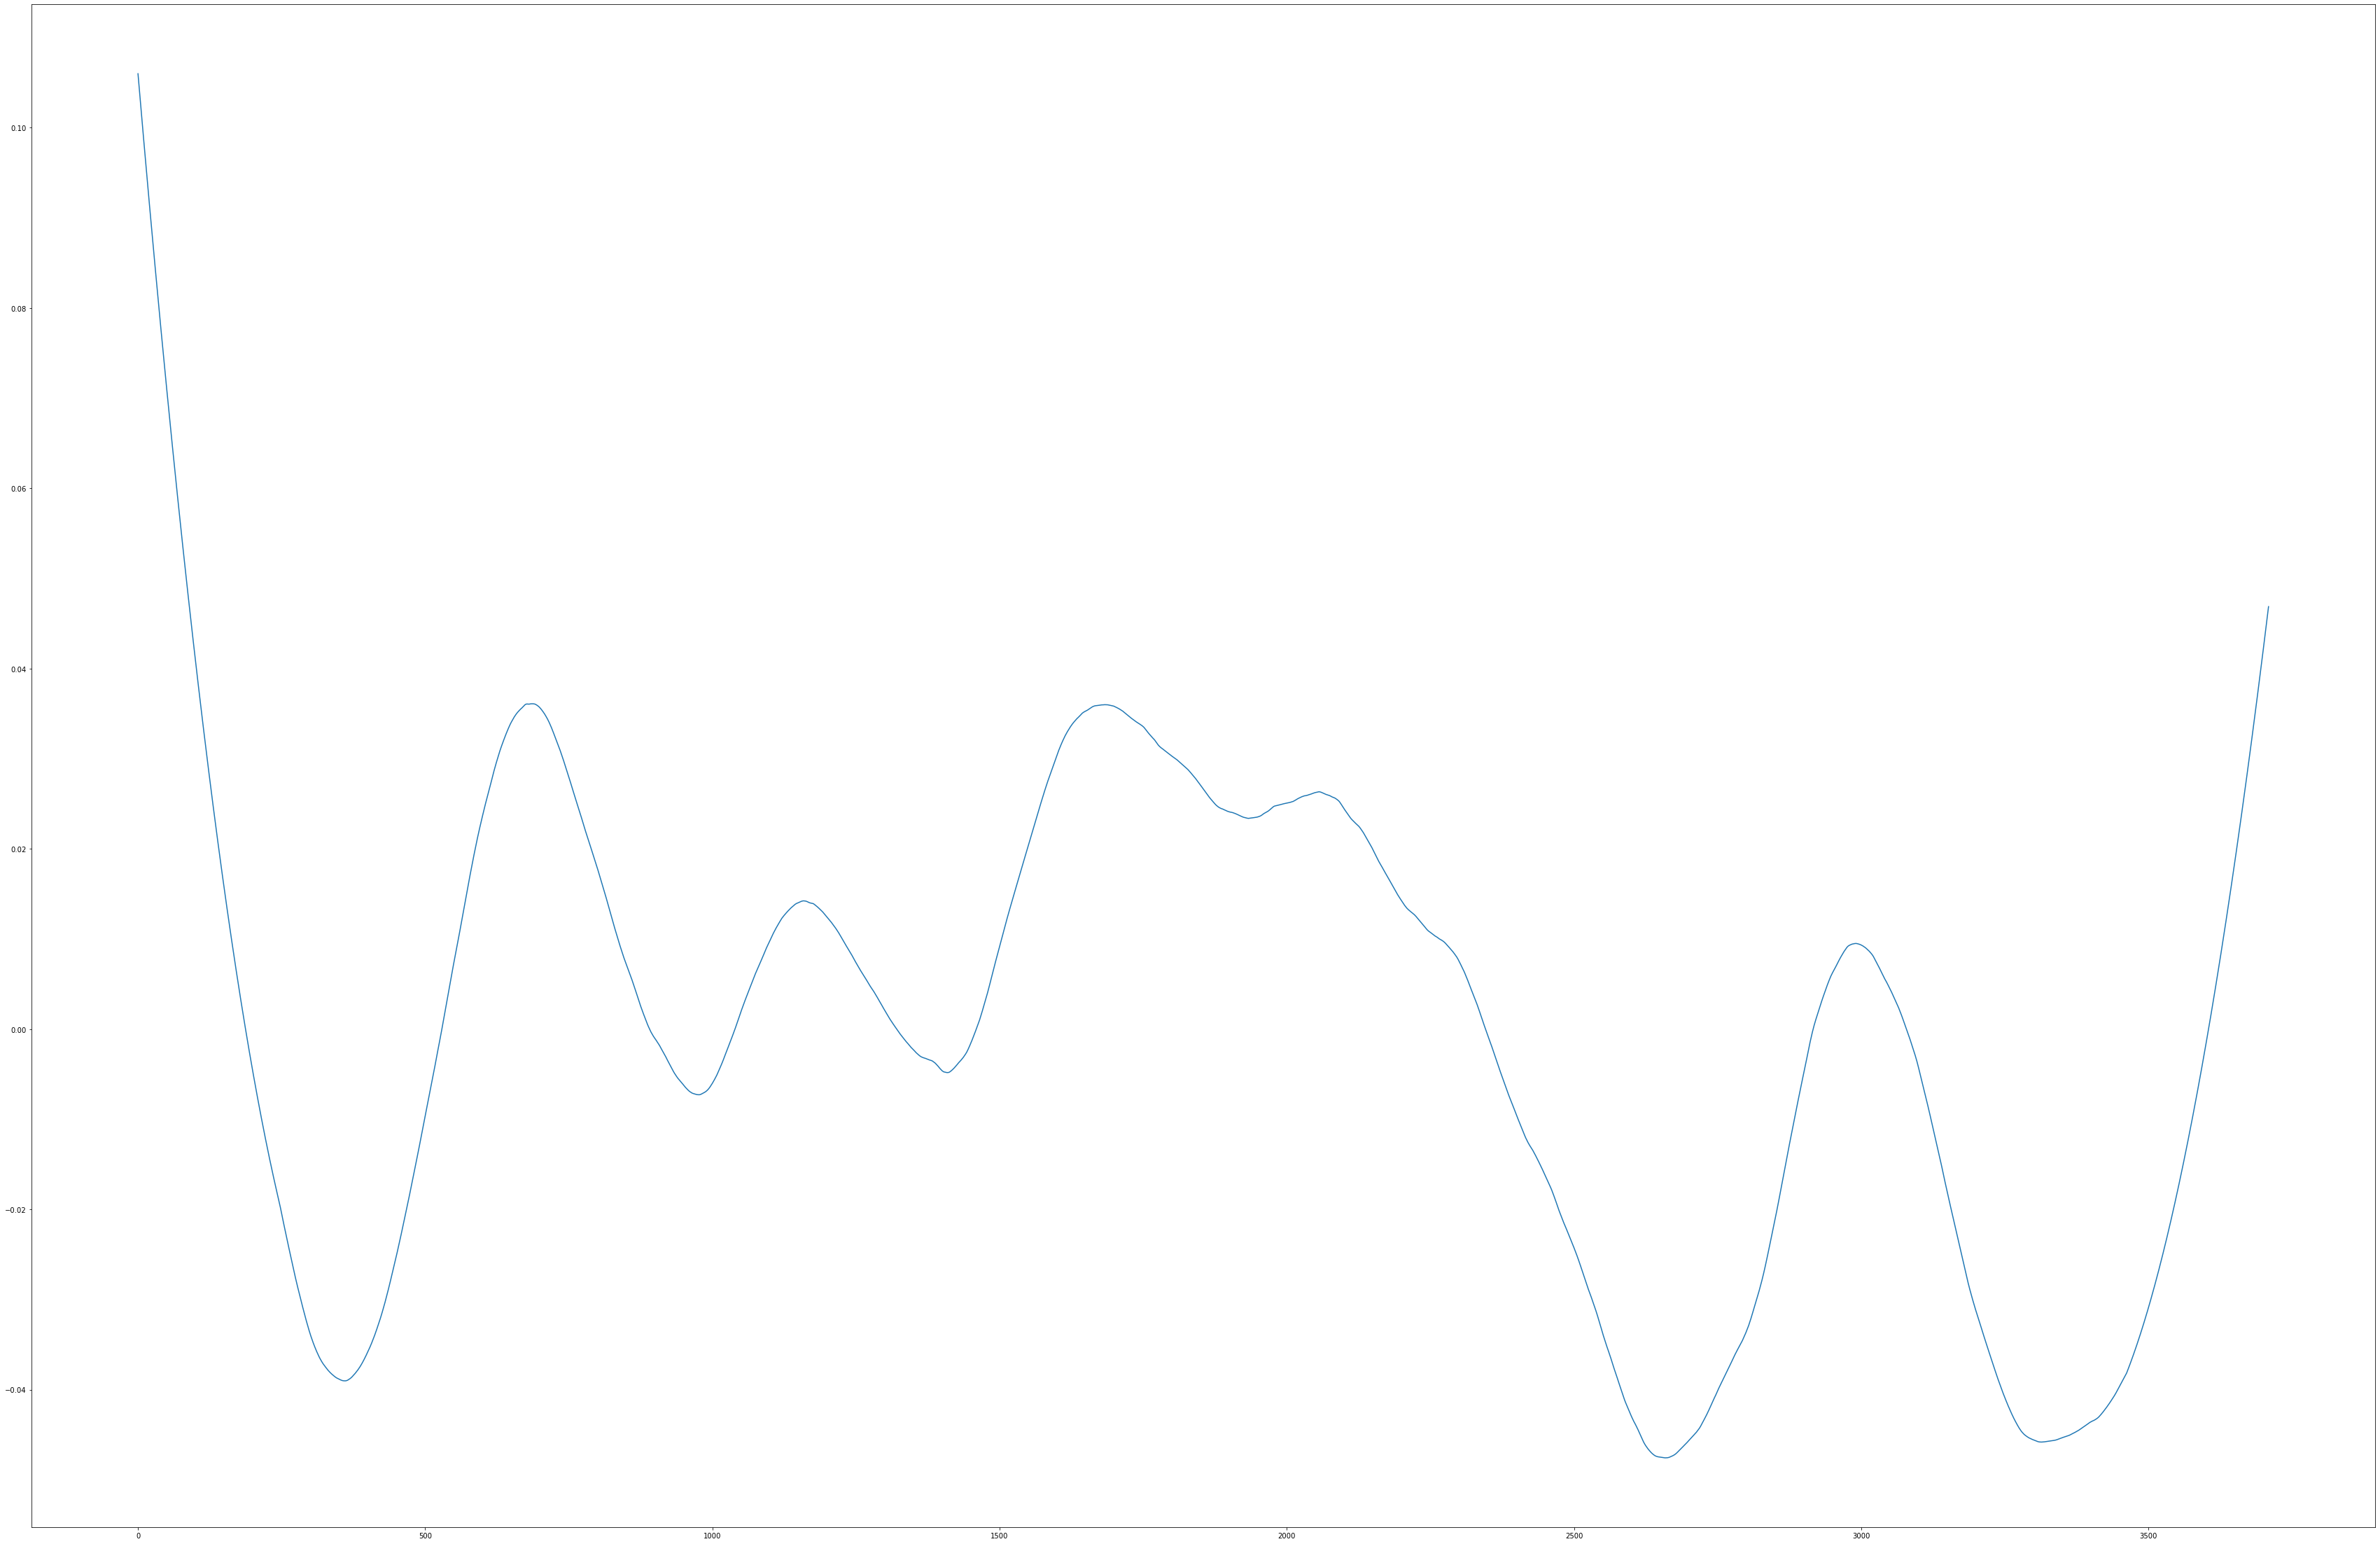

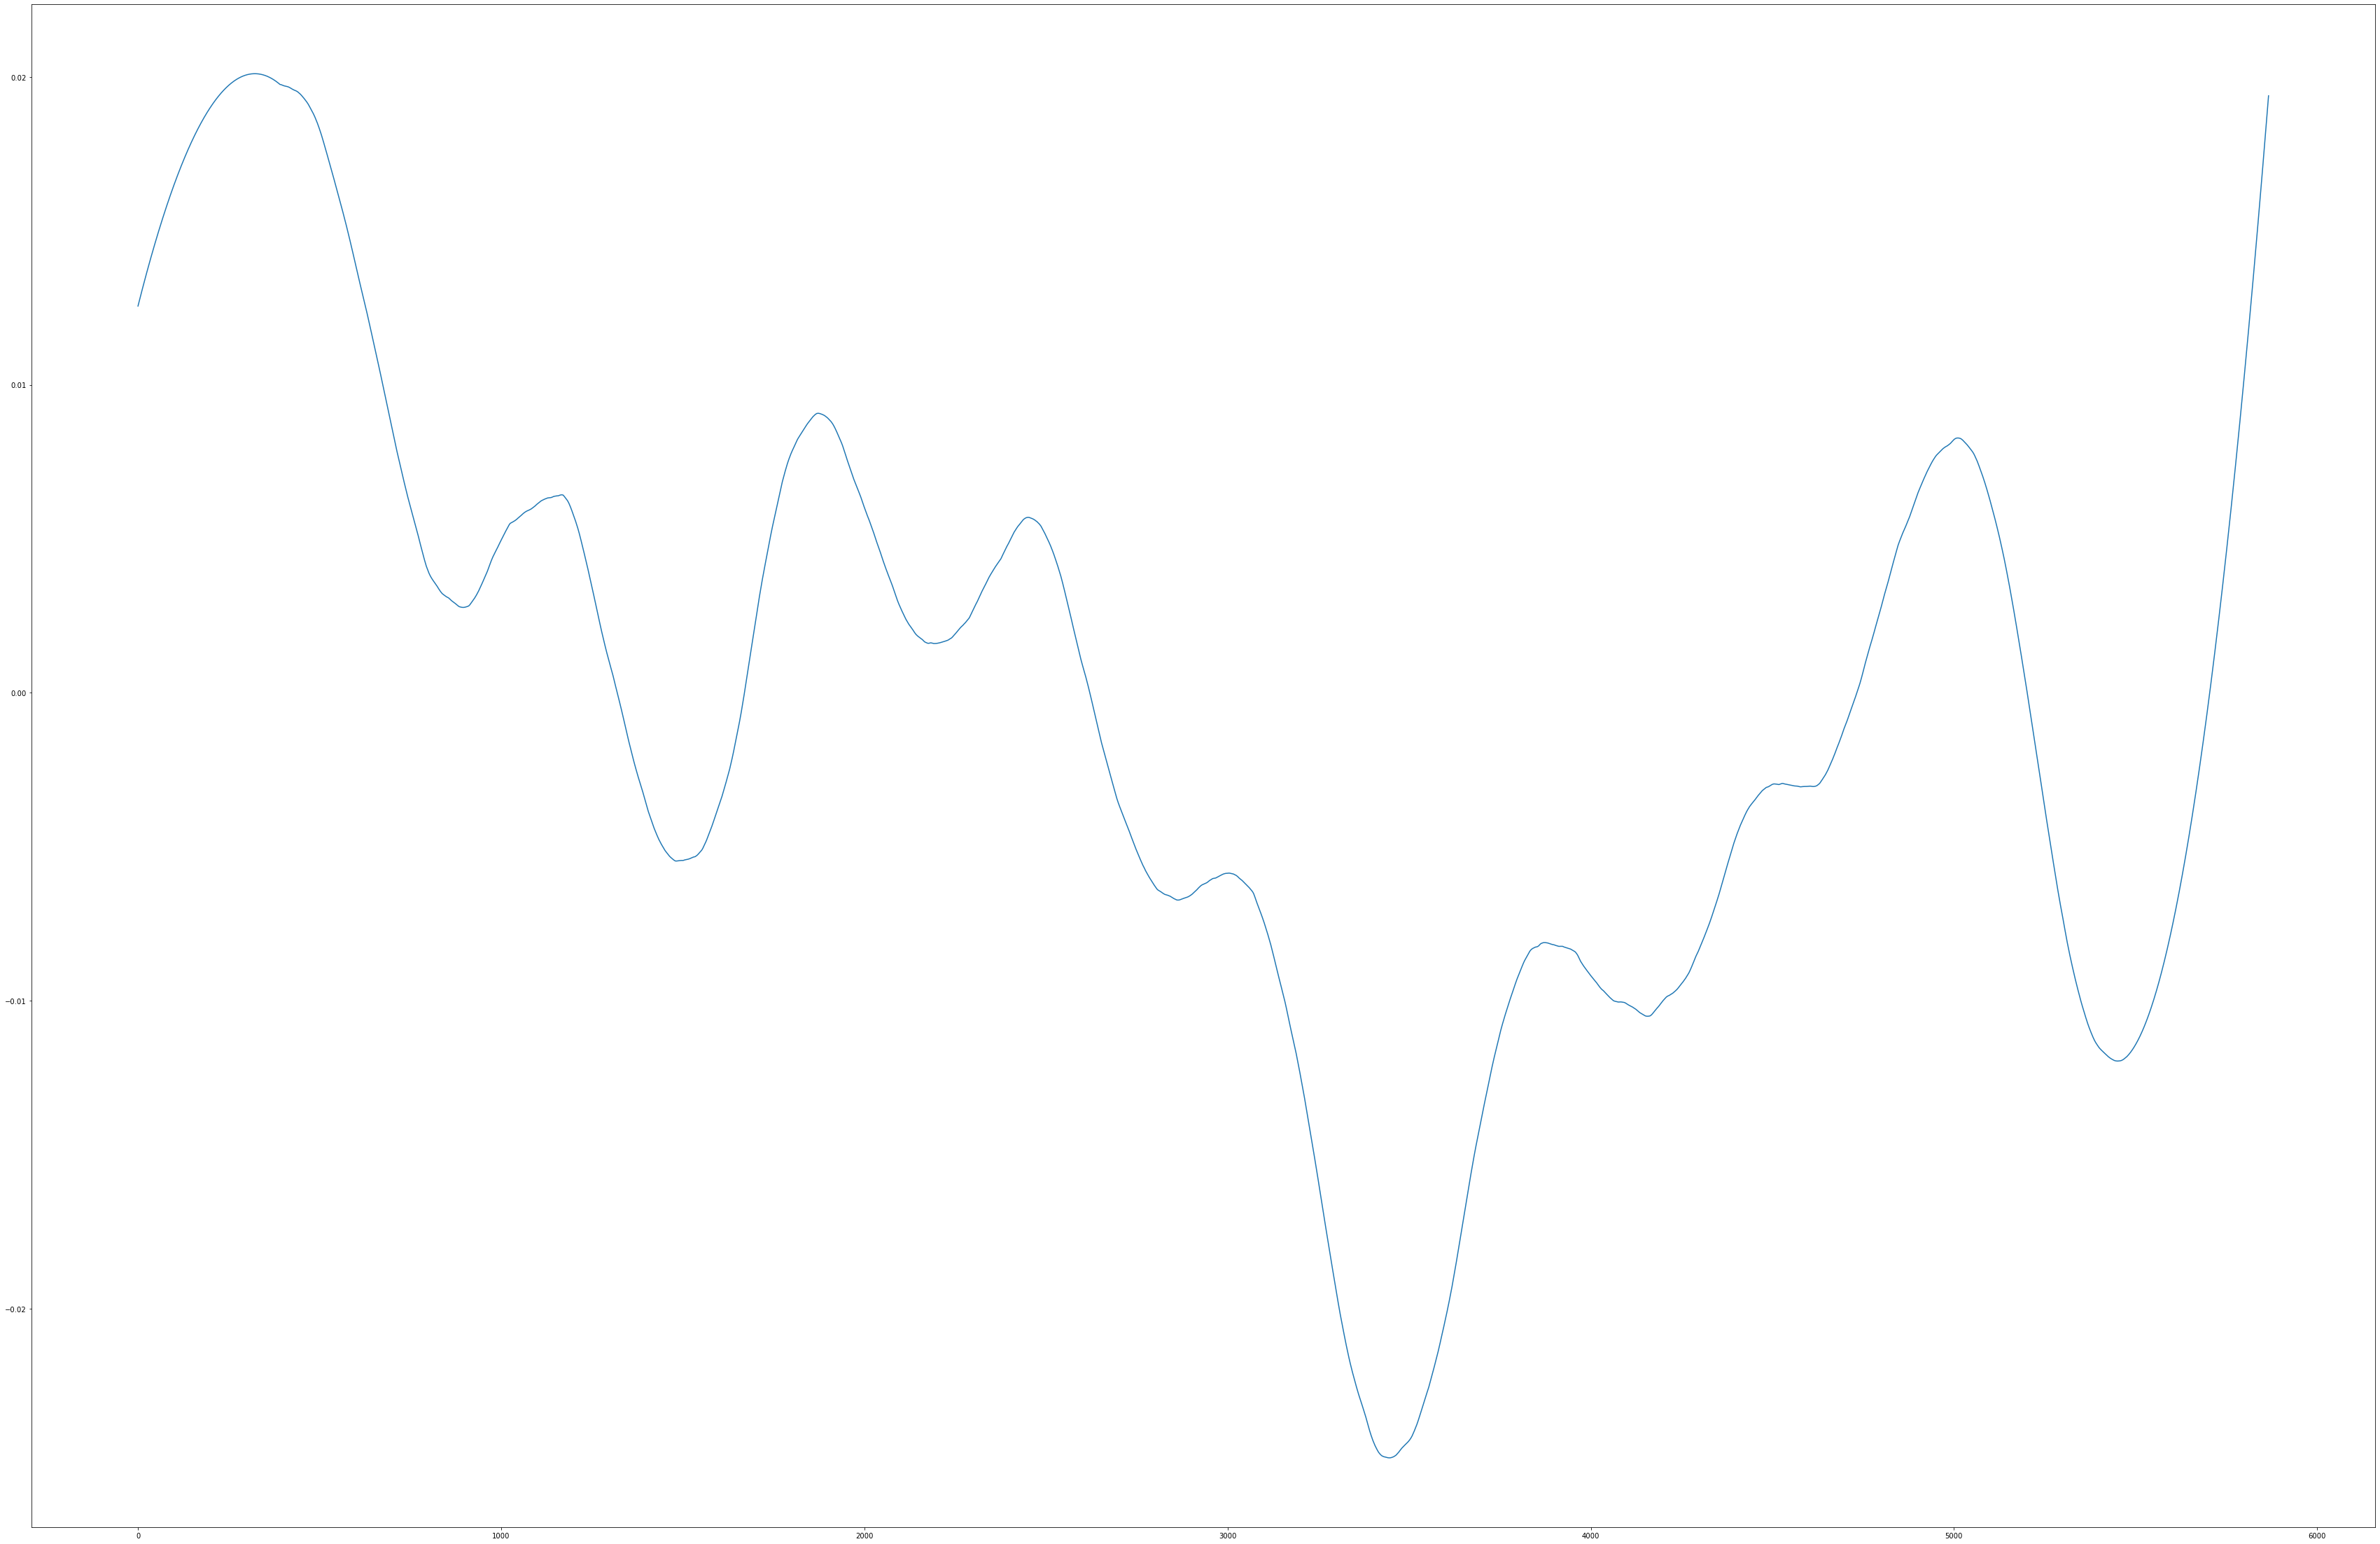

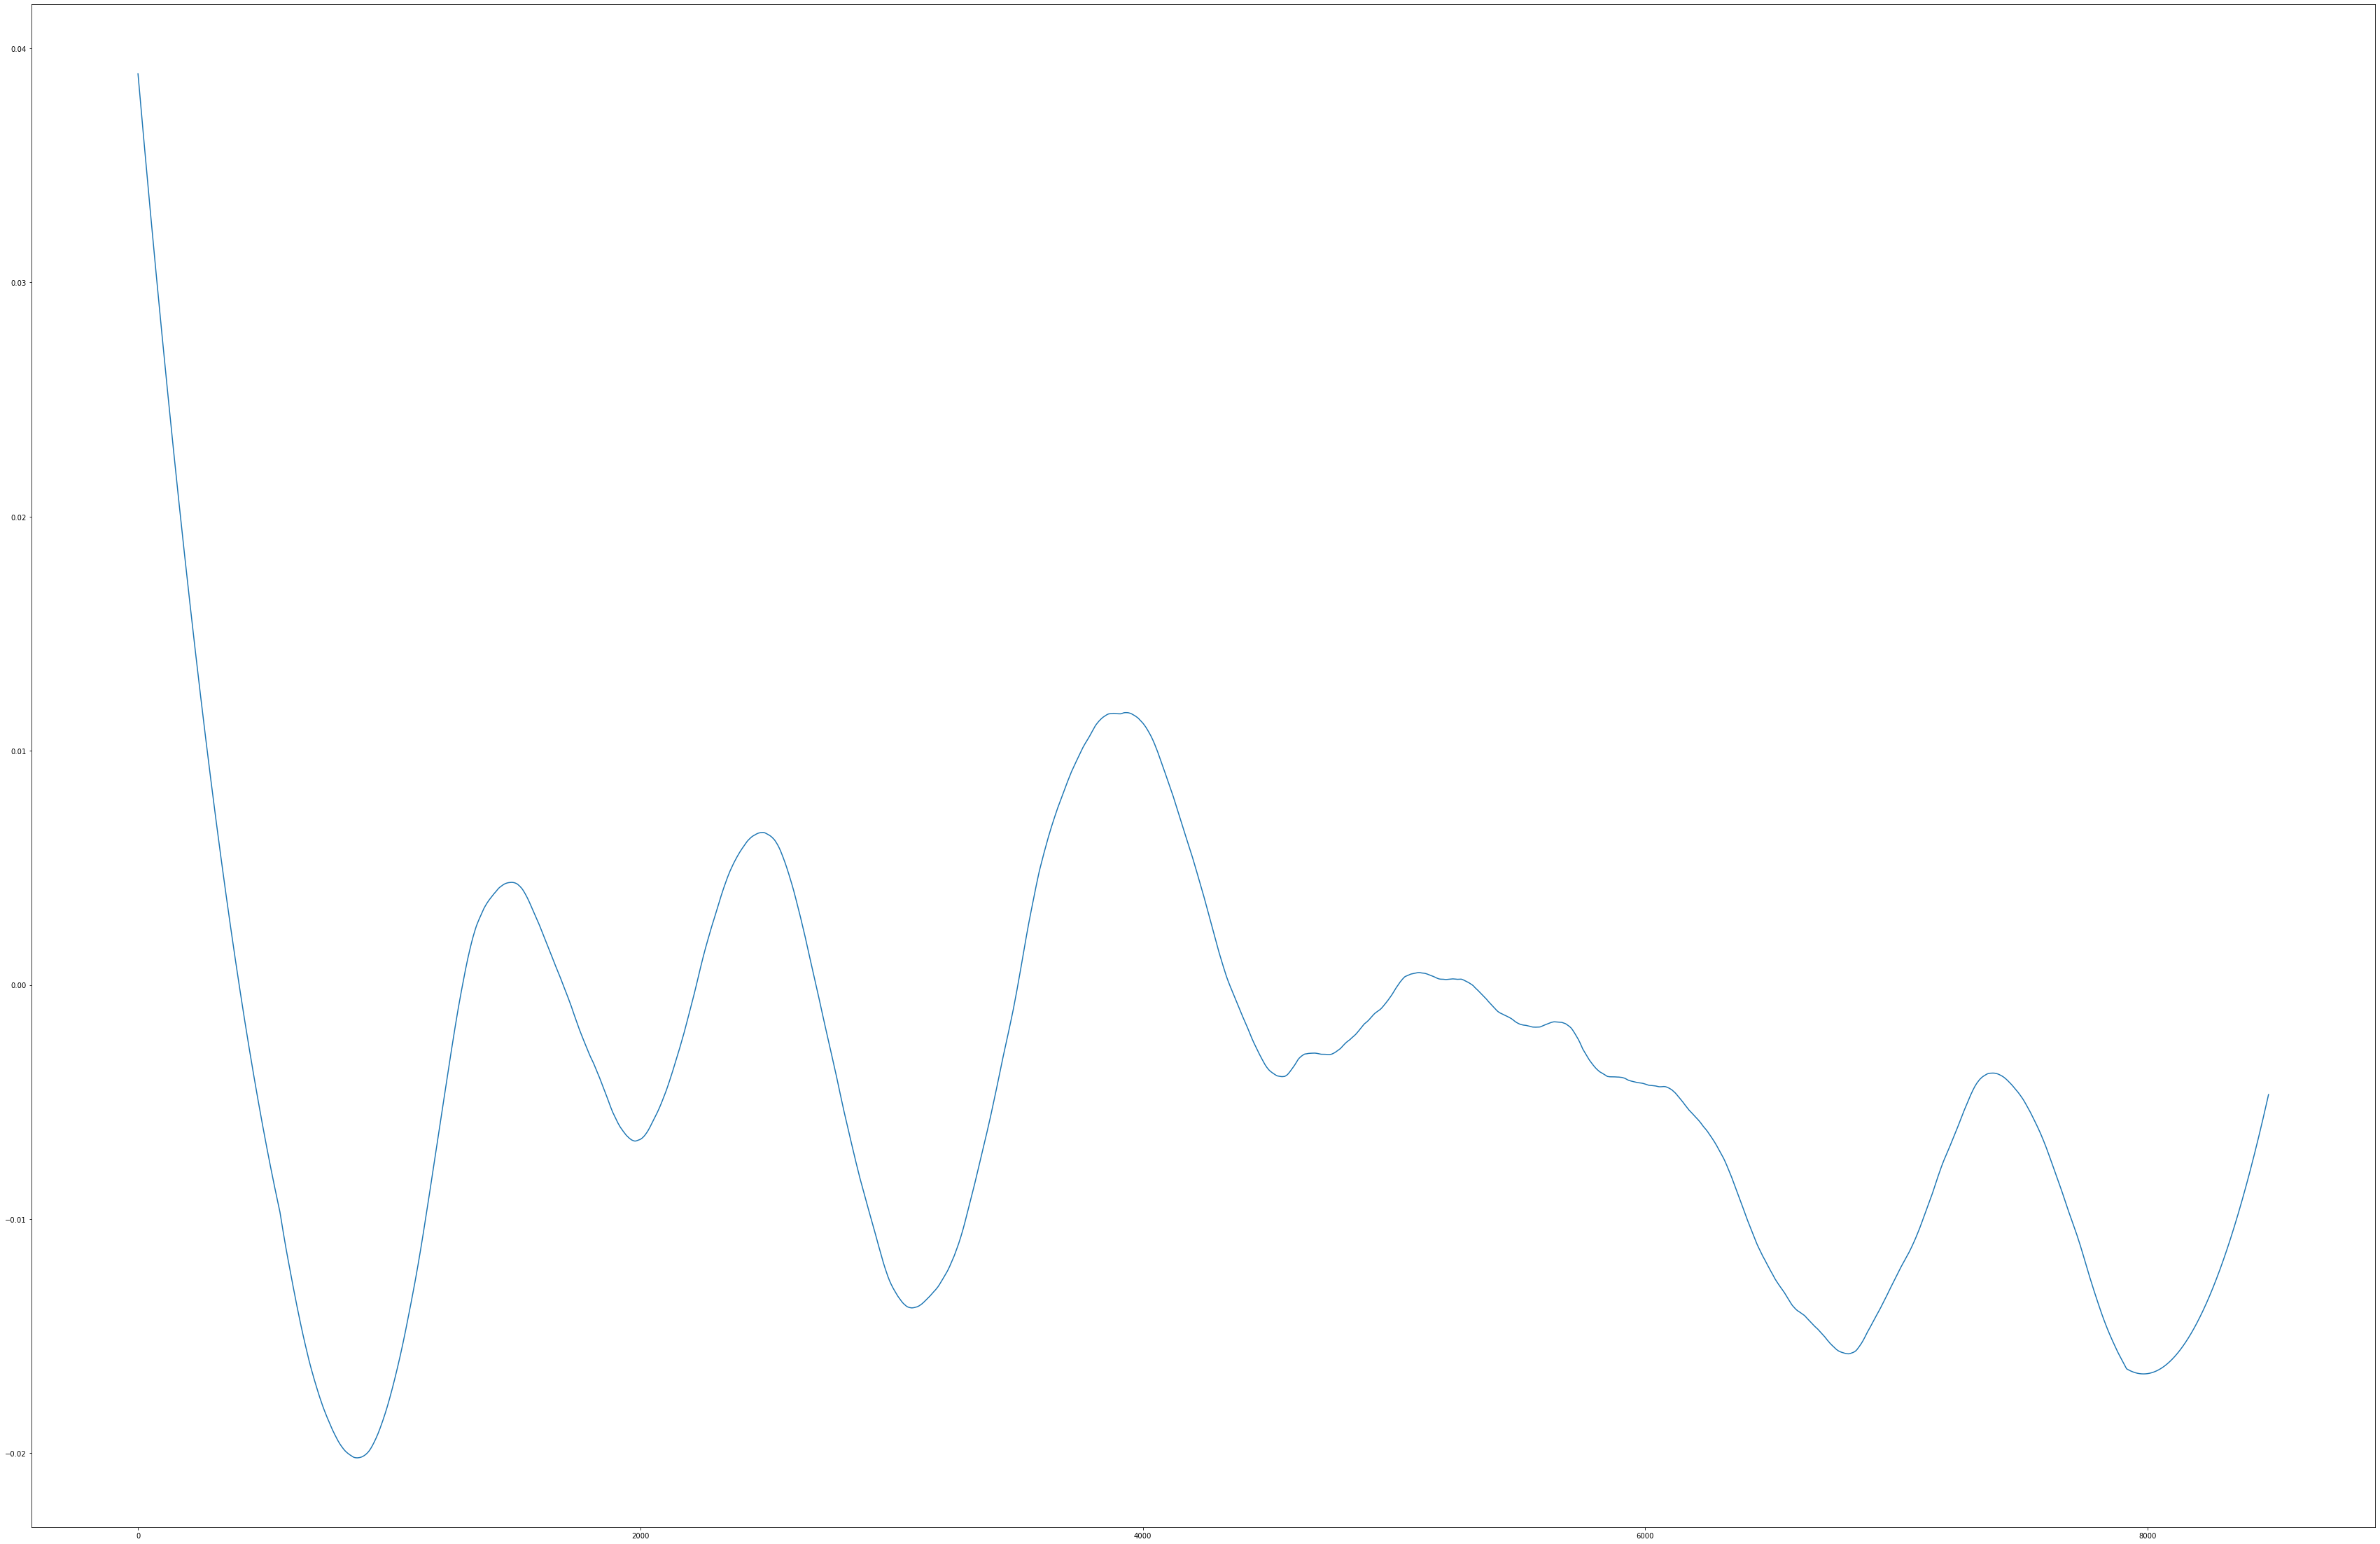

In [66]:
import os
from multiprocessing.dummy import Pool as ThreadPool
pool = ThreadPool(8)
folder = '../晋江2003~2021文包/2003-30本'
outdir = '../outputs/2003'
files = [os.path.join(folder, filename) for filename in os.listdir(folder)]
pool.map(getarc, files)
pool.close()
pool.join()



100%|██████████| 13396/13396 [00:00<00:00, 770295.53it/s]


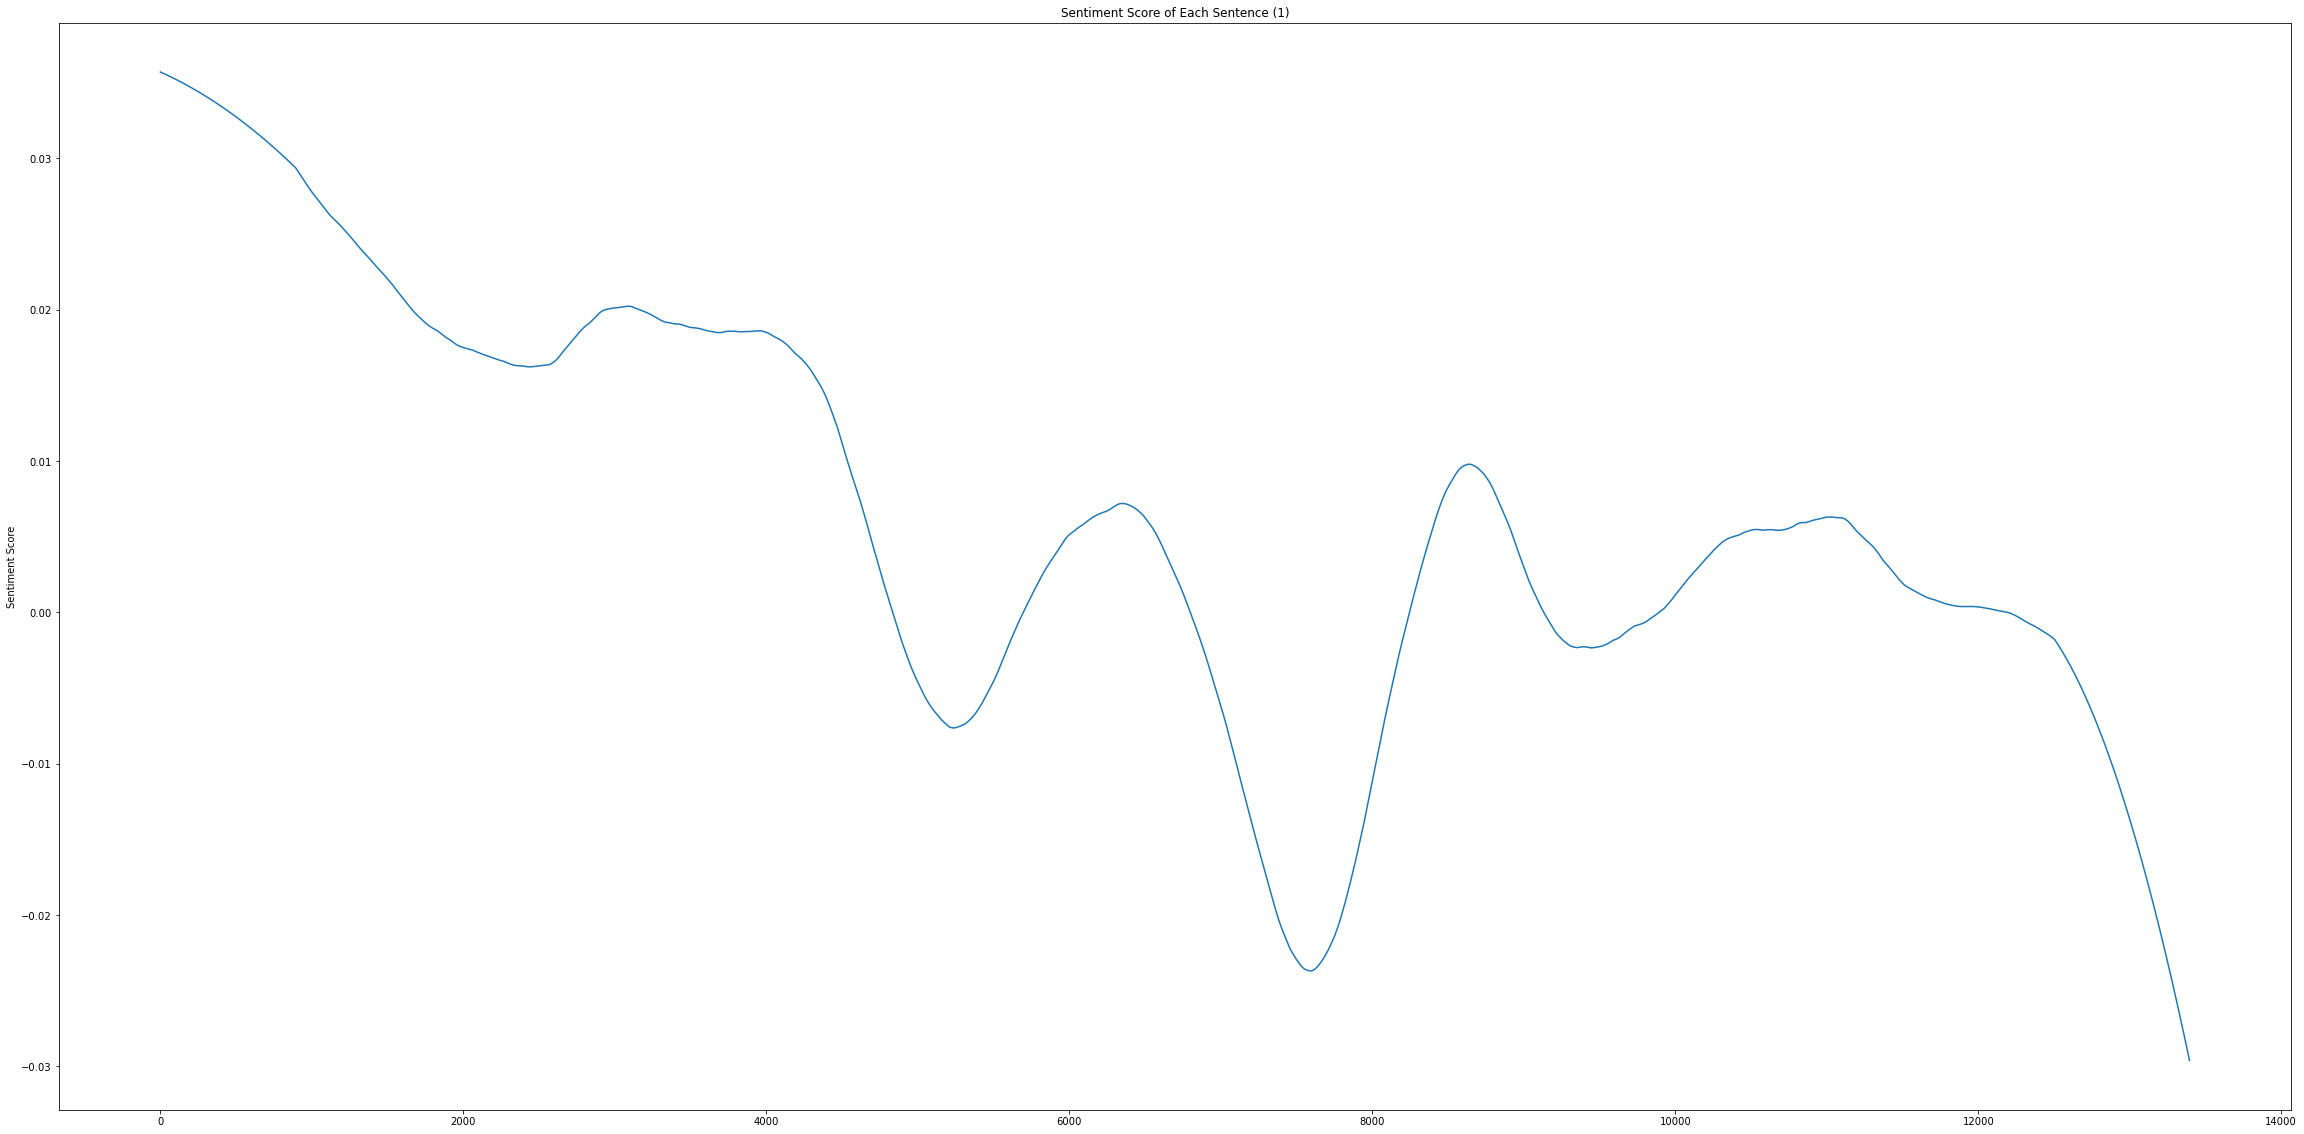

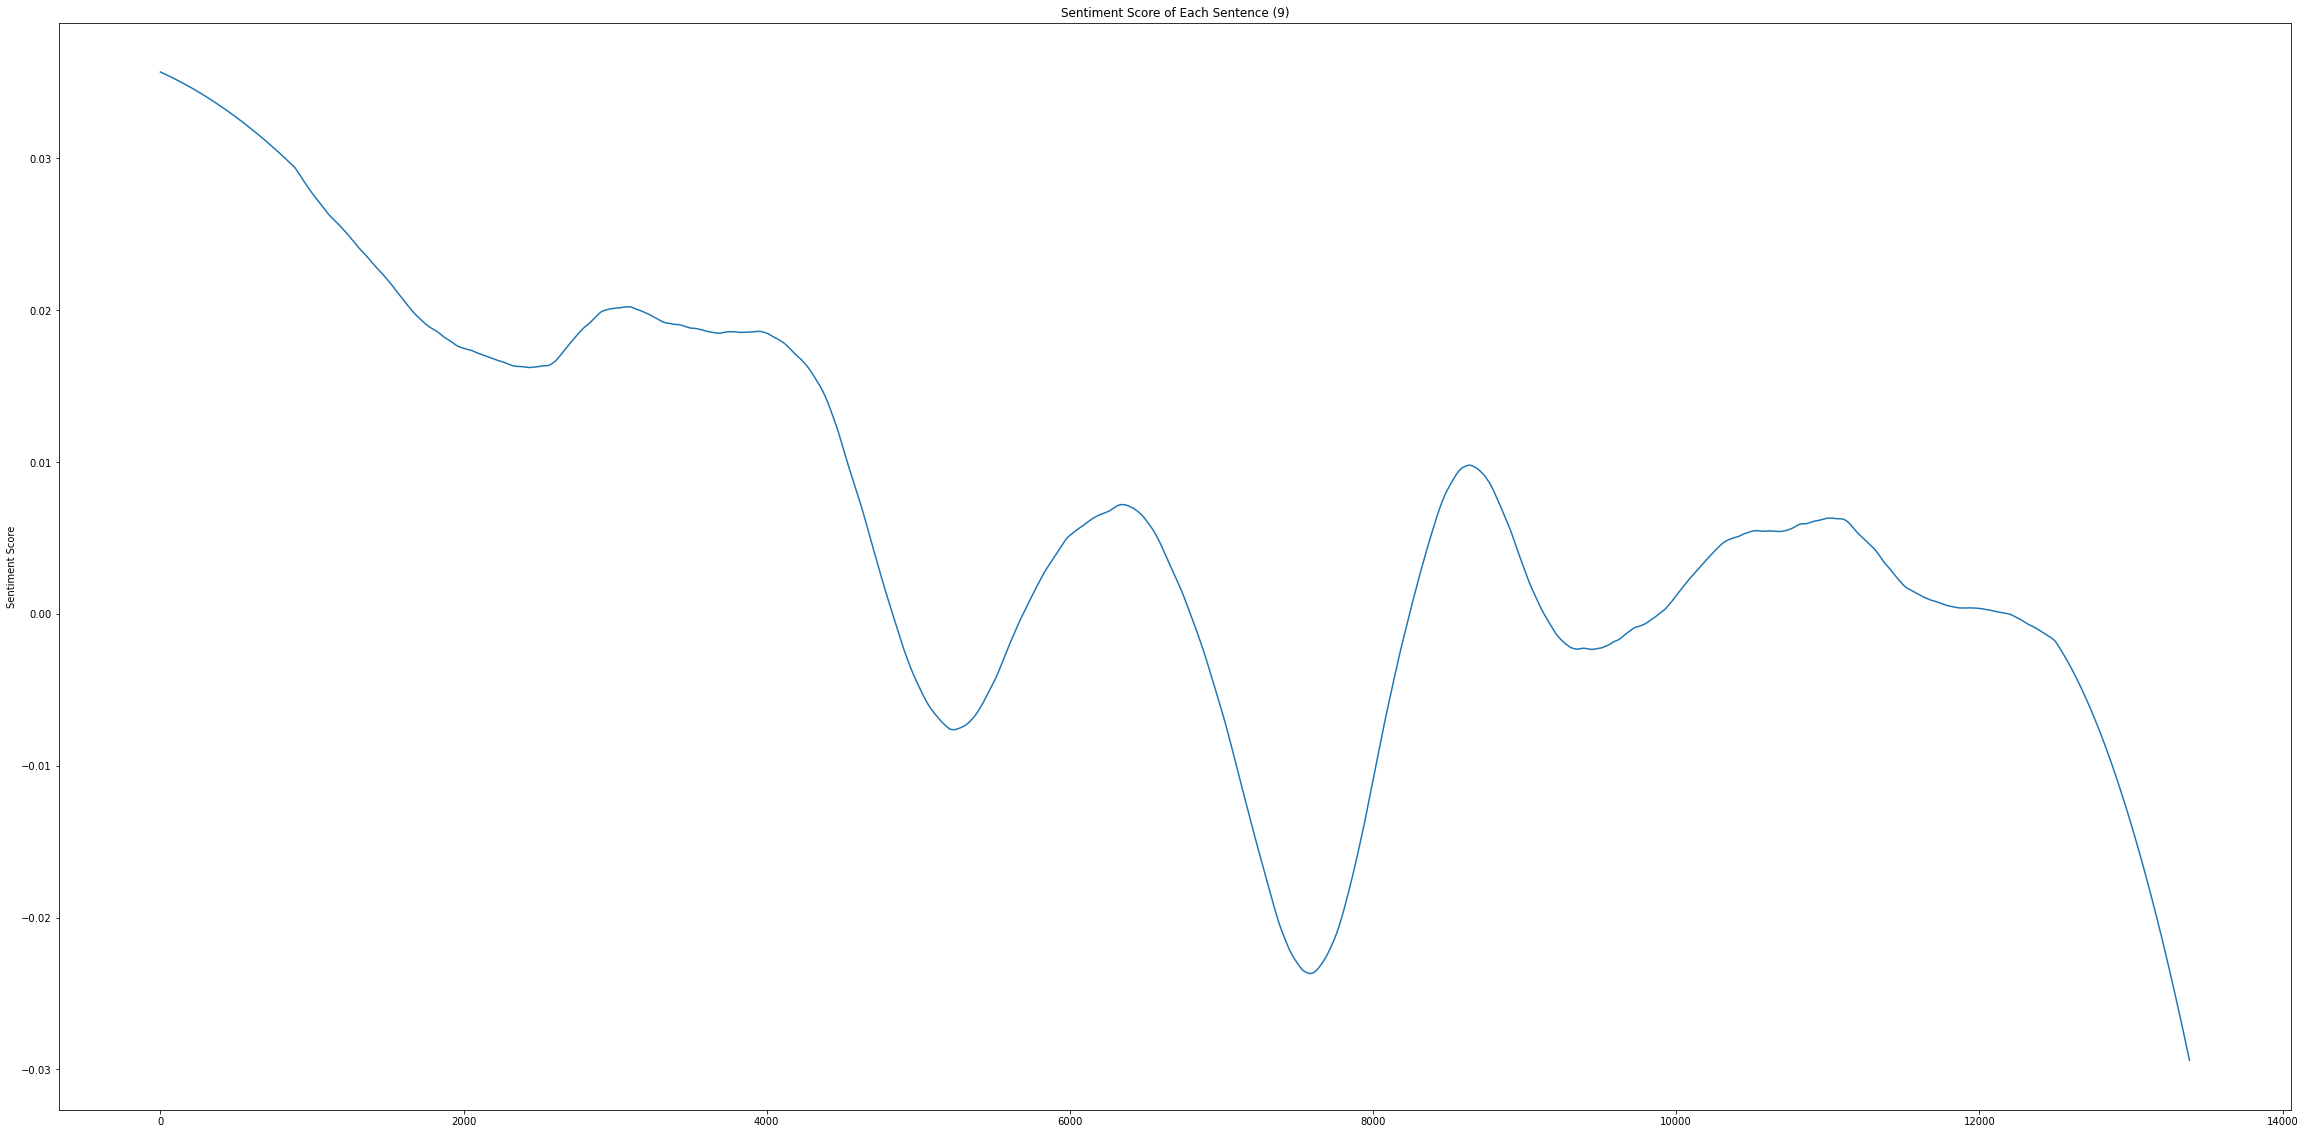

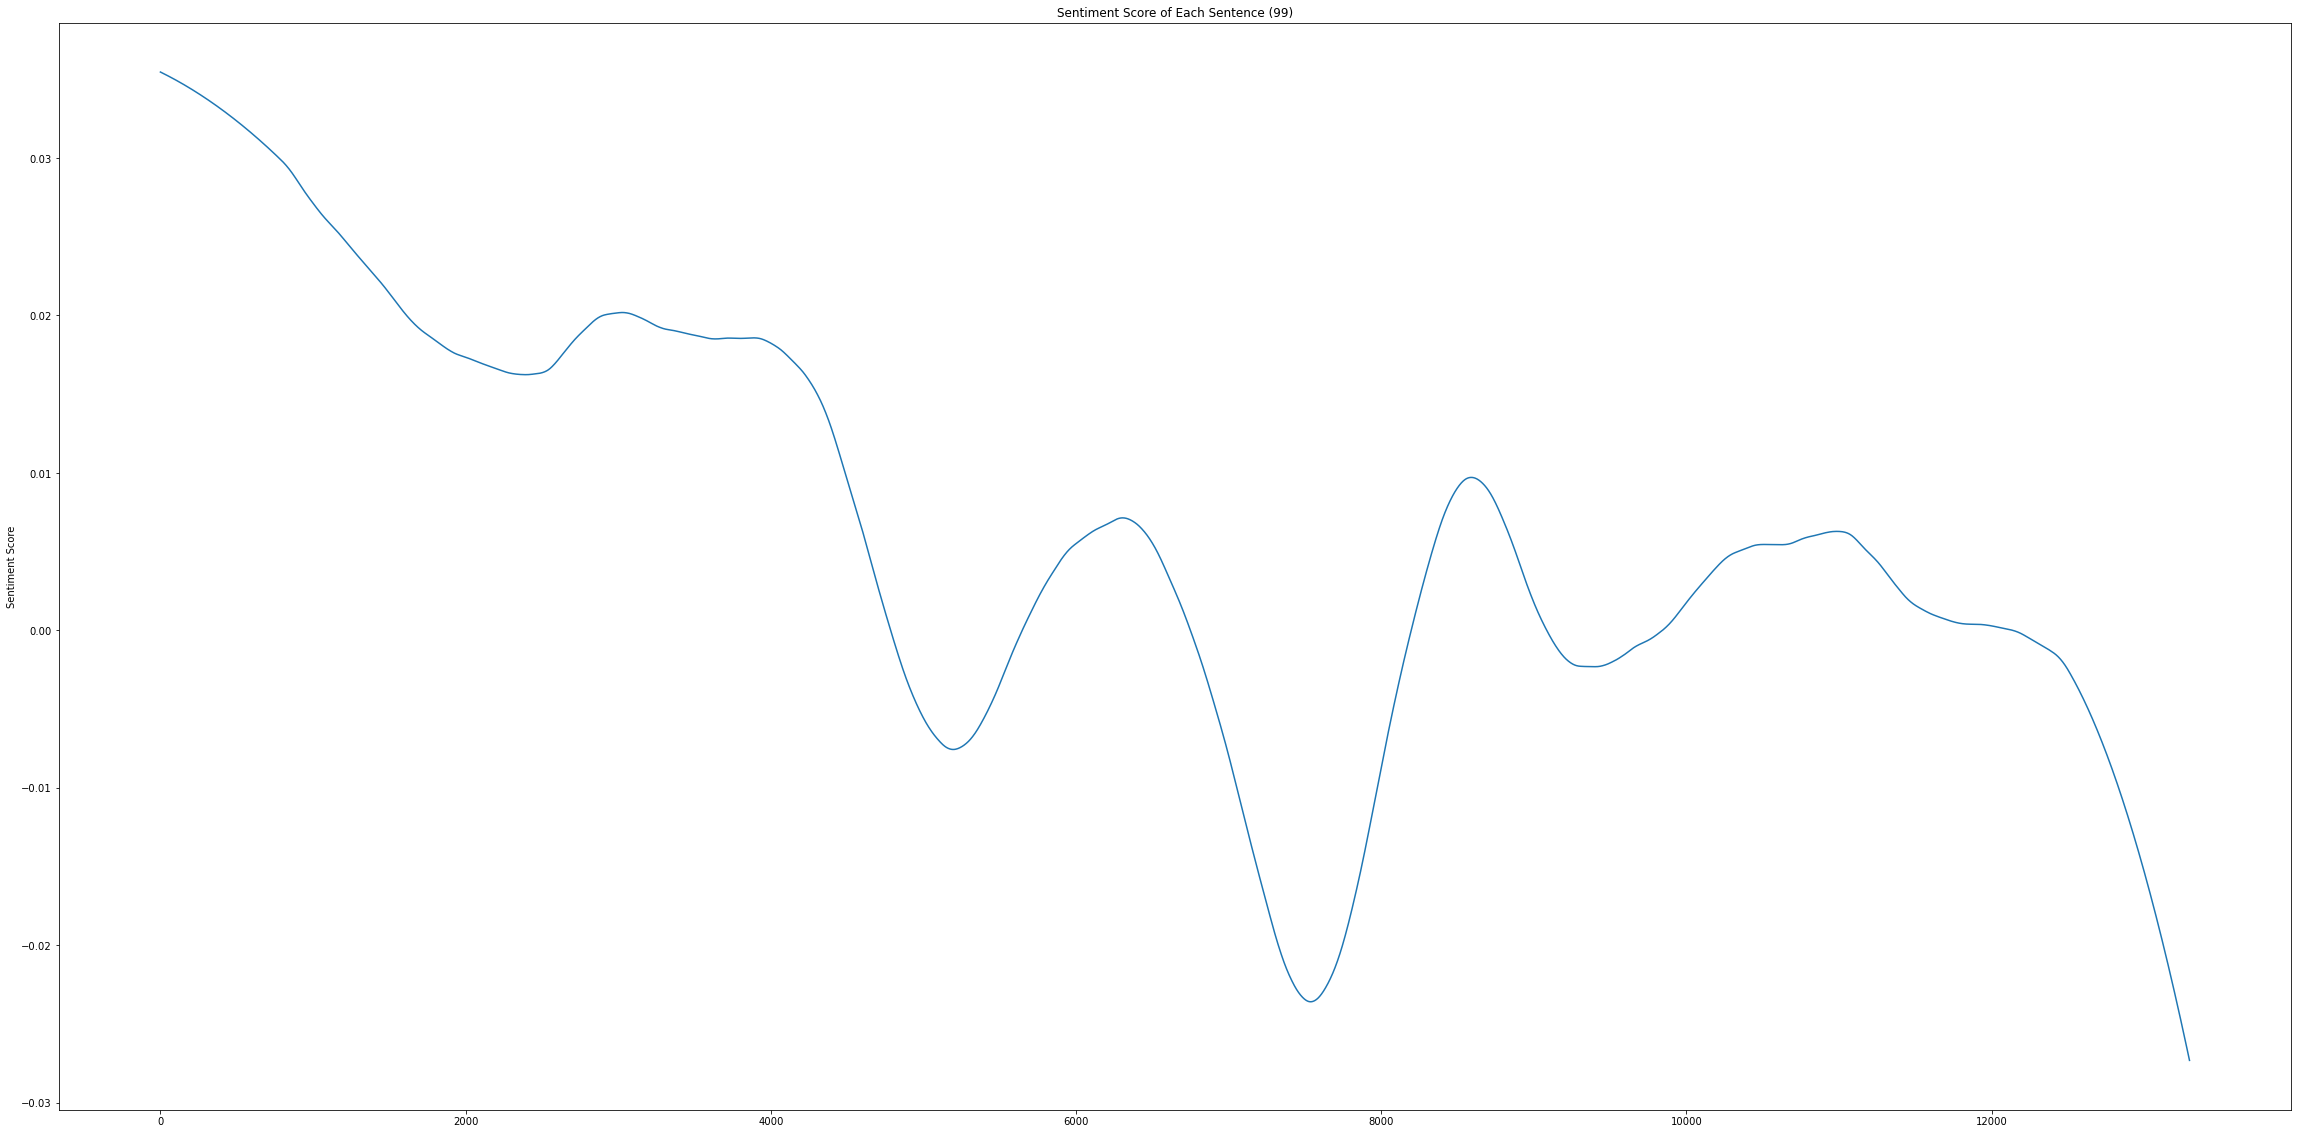

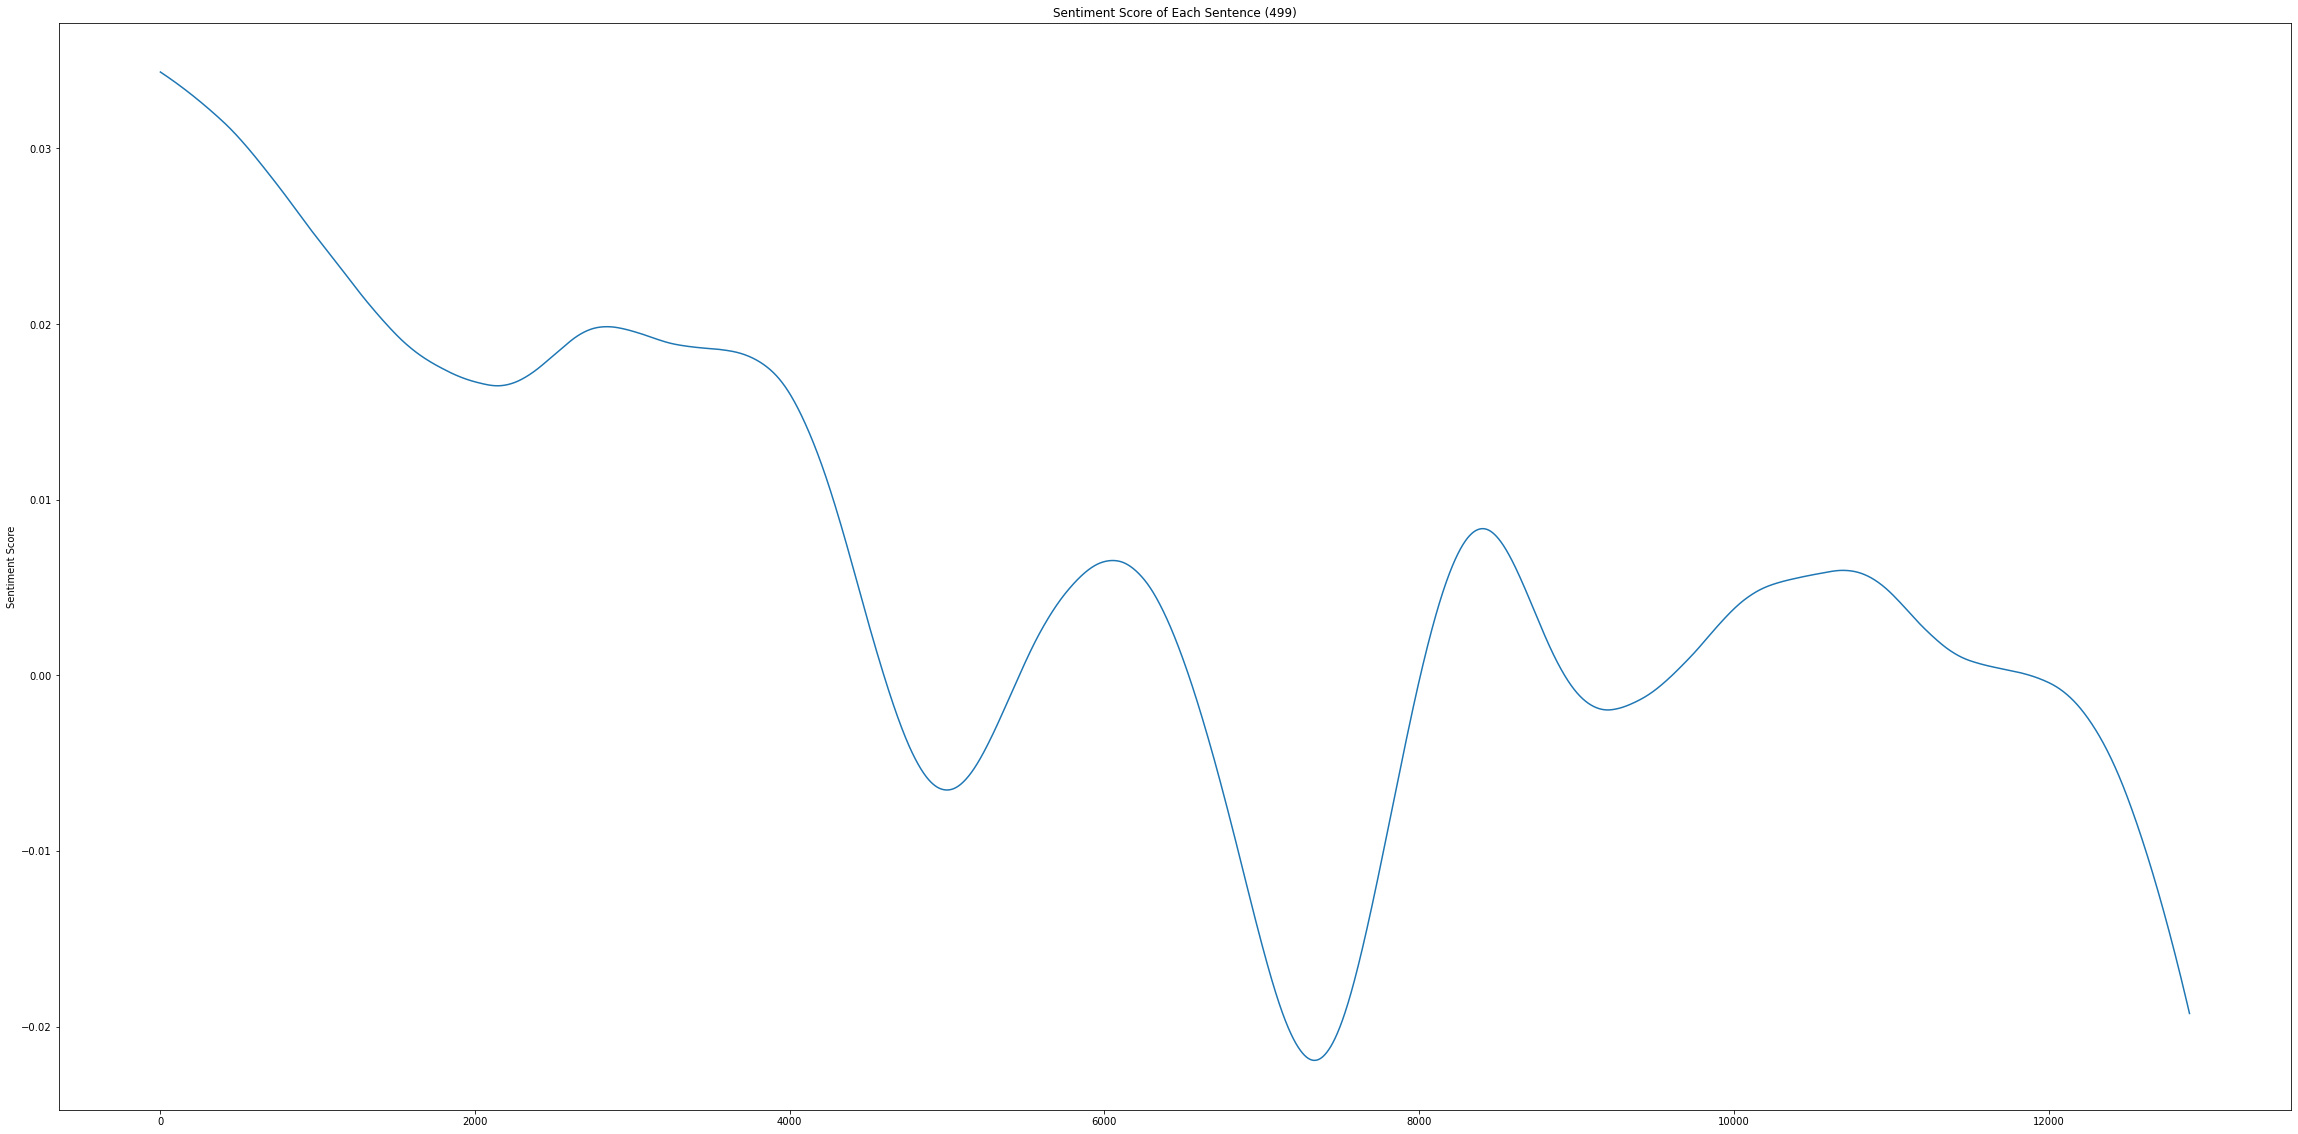

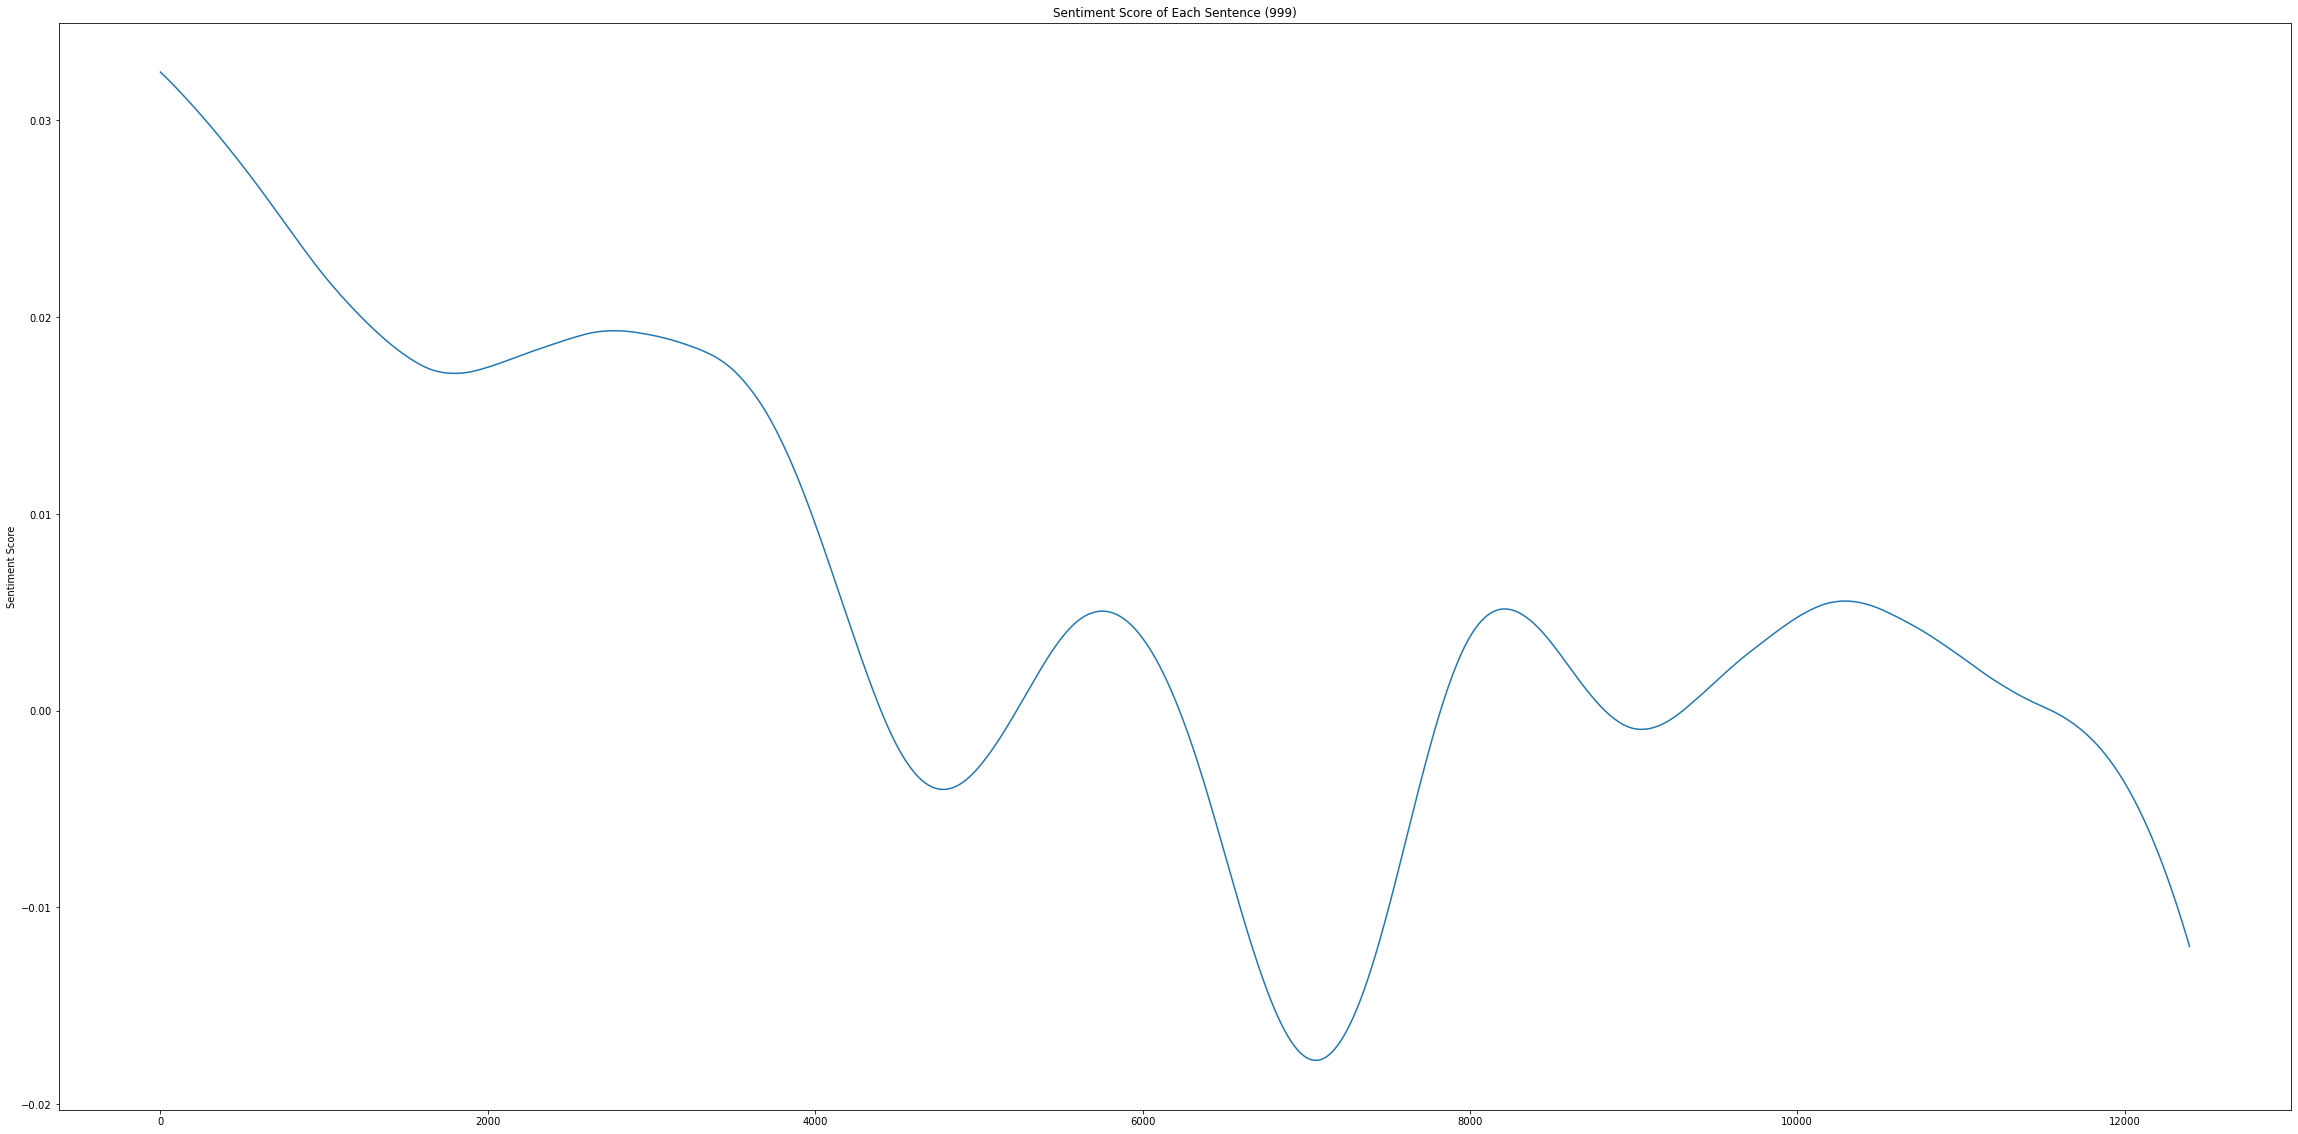

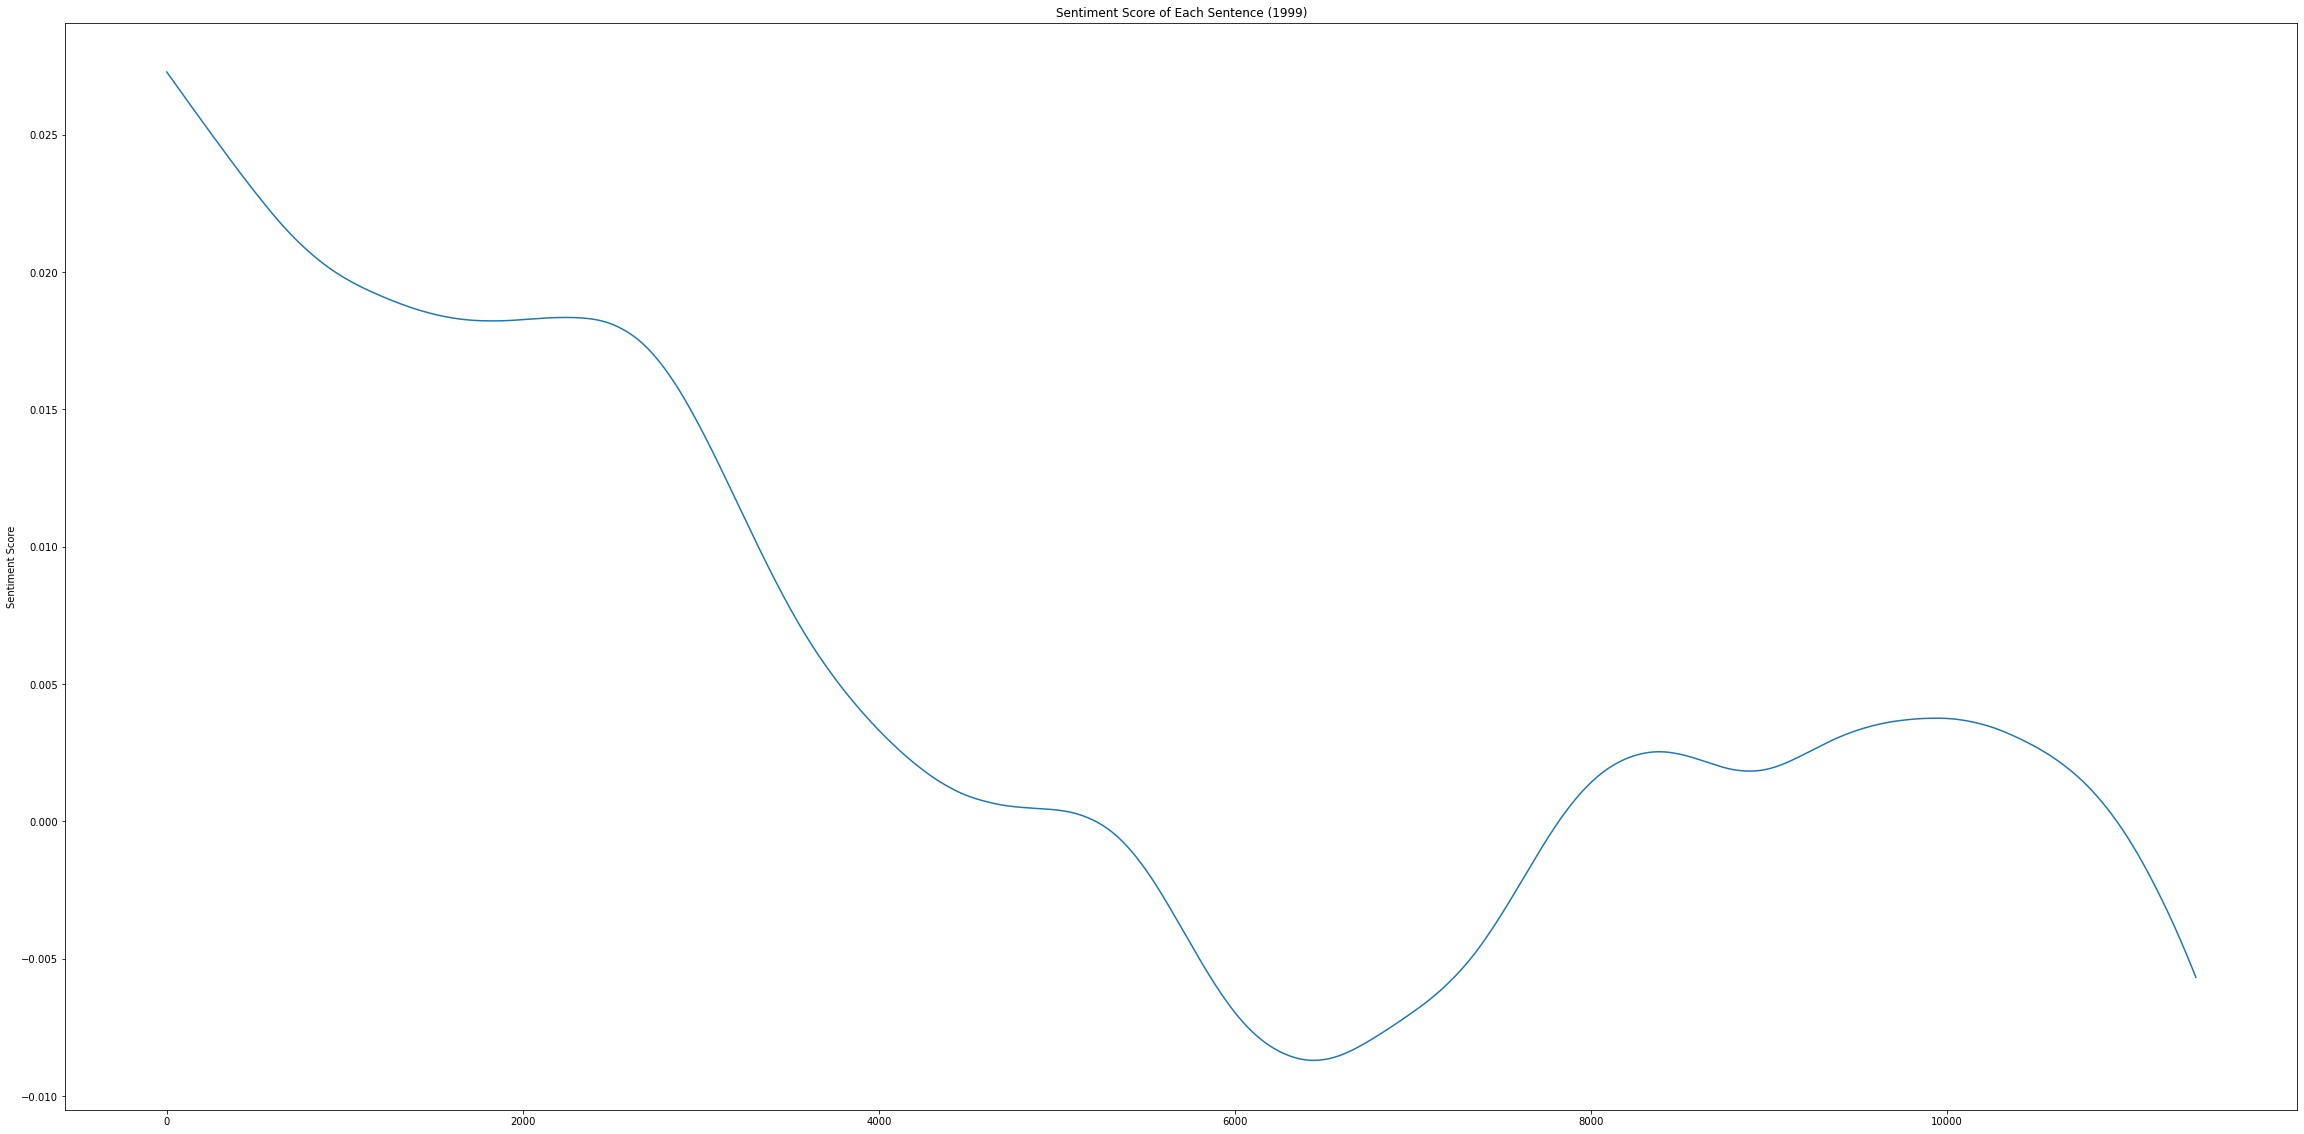

In [ ]:
# 绘制弧线
n_list = [2, 10, 100, 500, 1000, 2000]
for n in n_list:
    l = []
    sc = 0
    for i in trange(1, len(s)):
        sc += s[i-1]
        if i >= n:
            sc -= s[i-n]
            l.append(sc/(n-1))
    plt.figure(figsize=(40, 20))
    plt.plot(l)
    plt.ylabel("Sentiment Score")
    plt.title("Sentiment Score of Each Sentence ({})".format(n-1))
    # plt.show()
    # 用于保存情感弧
    # plt.save("Sentiment Score of Each Sentence ({}).png".format(n-1))

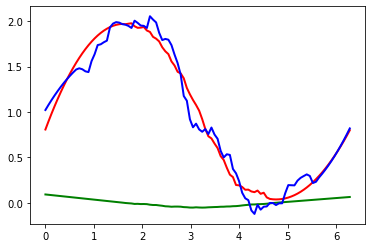

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
# SG算法
# x = np.linspace(0,2*np.pi,100)
# y = np.sin(x) + np.random.random(100) * 0.2
# yhat = savgol_filter(y, 51, 3) # window size 51, polynomial order 3

# plt.plot(x,y)
# plt.plot(x,yhat, color='red')
# plt.show()


# 移动平均框(普通卷积法) + SG对比
x = np.linspace(0,2*np.pi,100)
y = np.sin(x) + np.random.random(100) * 2

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
# print(len(savgol_filter(y, 51, 2,delta=2)))
plt.plot(x,savgol_filter(y, 51, 2), 'r-', lw=2)
plt.plot(x,savgol_filter(y, 51, 2,deriv=1,delta=1), 'g-', lw=2)
# plt.plot(x,savgol_filter(y, 51, 4), 'brown', lw=2)
plt.plot(x,savgol_filter(y, 21, 2), 'b-', lw=2)# window size 51, polynomial order 3
plt.show()


100%|██████████| 13396/13396 [00:00<00:00, 1248902.98it/s]


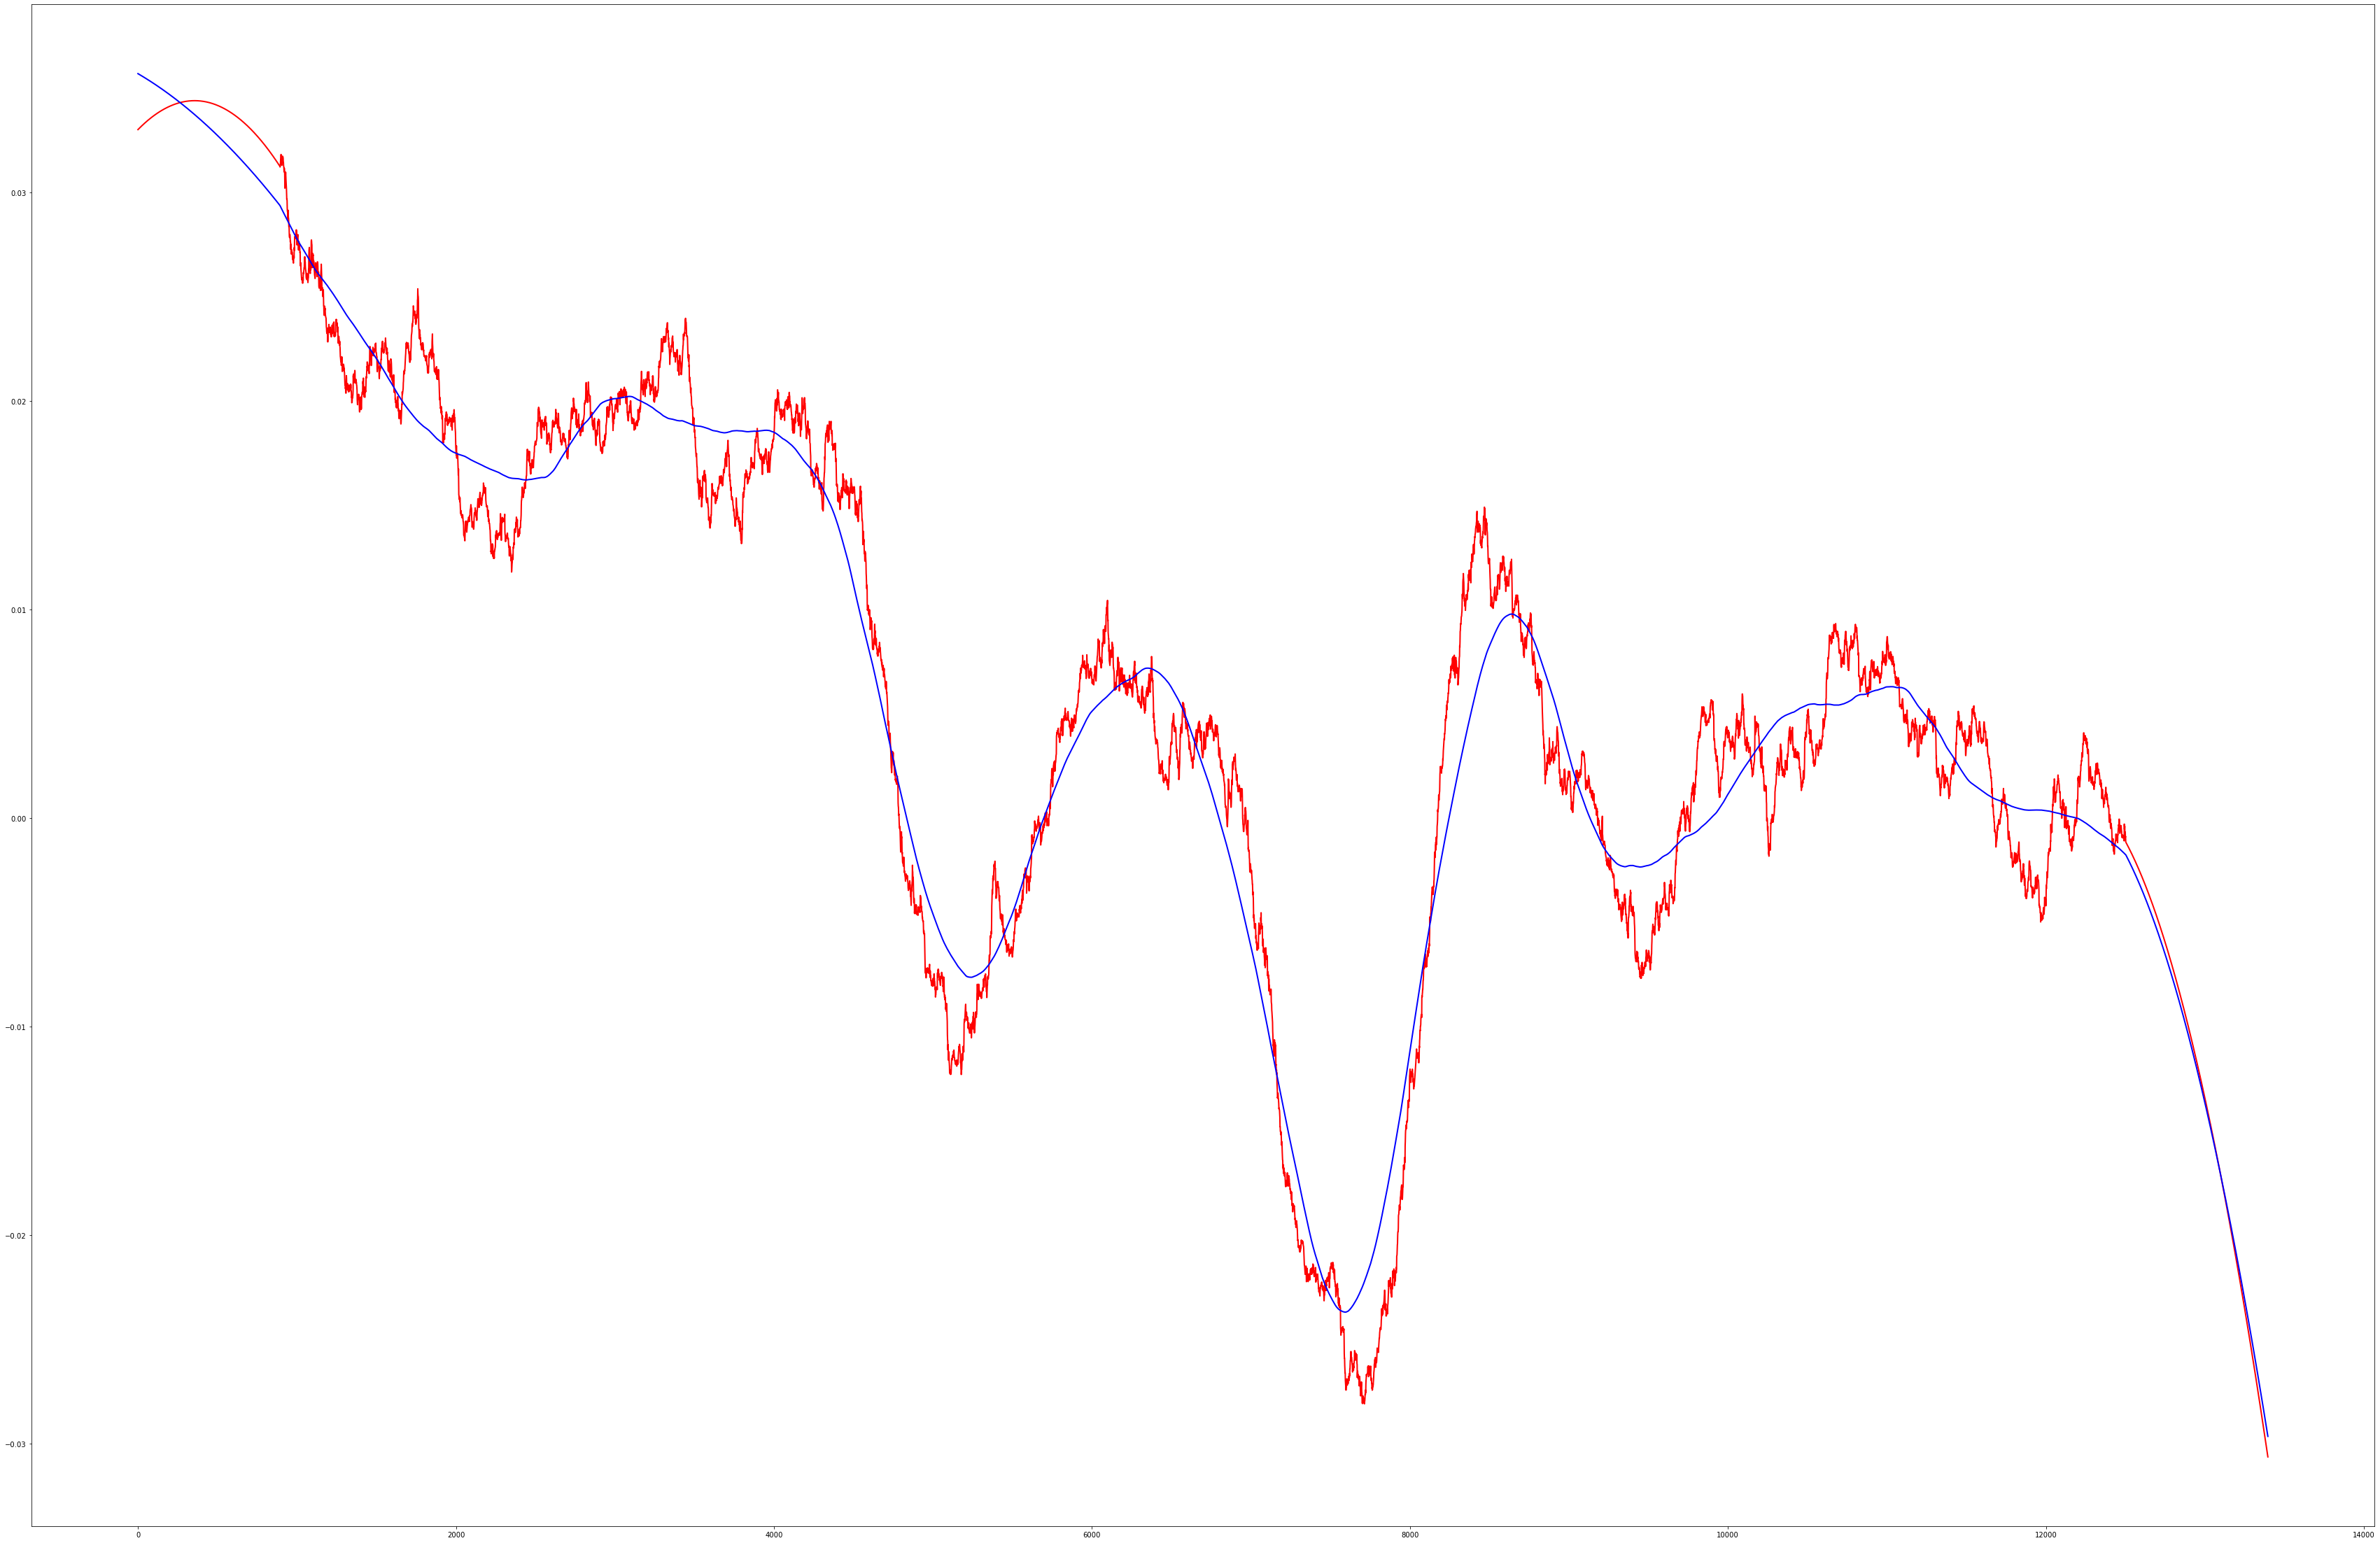

In [ ]:
from scipy.signal import savgol_filter
# file_path='../晋江2003~2021文包/2003-30本/《妲己之死》蒋胜男.txt'
file_path='../晋江2003~2021文包/2018-50本/[现言]第二十八年春.txt'
s,slen=get_sentiment_score(file_path)
window_length = slen//5*2+1
# plt.plot(s, 'b-')
getarc(file_path)
plt.figure(figsize=(60,40))
s=savgol_filter(s,  slen//15*2+1, 2)
plt.plot(s, 'r-', lw=2)
s=savgol_filter(s,  slen//15*2+1, 2)
plt.plot(s, 'b-', lw=2)
plt.show()

In [ ]:
step=2
points=2
idx = [step*i for i in range(points)]
l = [1,2,3,4,5]
# sc = 0
# for i in range(1, len(s)):
#     sc += s[i-1]
#     if i >= n:
#         sc -= s[i-n]
#         l.append(sc/(n-1))
print(idx)
l = np.array(l)
l = l[idx]
print(l)

[0, 2]
[1 3]
